In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nibabel as nib
import seaborn as sns
import pingouin as pg

from nilearn import plotting
from nilearn.image import new_img_like

In [2]:
import rsatoolbox
from rsatoolbox.inference import eval_fixed
from rsatoolbox.model import ModelFixed, Model
from rsatoolbox.rdm import RDMs
from rsatoolbox.vis import show_rdm, show_rdm_panel

from glob import glob

In [3]:
project_dir = os.path.join('/bgfs/bchandrasekaran/krs228/data/', 'FLT/')
fmriprep_dir = os.path.join(project_dir, 'data_denoised/derivatives/',
                            'denoised_fmriprep-22.1.1/')

bidsroot = os.path.join(project_dir, 'data_denoised')
deriv_dir = os.path.join(bidsroot, 'derivatives')

fwhm_sub = 0
model_dir = os.path.join(deriv_dir, 'nilearn', f'level-1_fwhm-{fwhm_sub:.02f}',)

task_list = ['tonecat']
space_label = 'MNI152NLin2009cAsym'

In [4]:
statmap = 'tstat' # 'beta'

In [5]:
model_desc = 'stimulus_per_run_LSS'

In [6]:
model_dir

'/bgfs/bchandrasekaran/krs228/data/FLT/data_denoised/derivatives/nilearn/level-1_fwhm-0.00'

## Make categorical models

In [7]:
pattern_descriptors = {'tone': ['T1', 'T1', 'T1', 'T1', 
                                'T2', 'T2', 'T2', 'T2', 
                                'T3', 'T3', 'T3', 'T3', 
                                'T4', 'T4', 'T4', 'T4', ],
                       'talker': ['M1', 'M2', 'F1', 'F2',
                                  'M1', 'M2', 'F1', 'F2',
                                  'M1', 'M2', 'F1', 'F2',
                                  'M1', 'M2', 'F1', 'F2', ],
                      }
                                  

### Categorical RDMs

In [8]:
# make categorical RDMs
tone_rdm = np.array([[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,],
                     [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,],
                     [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,],
                     [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,],
                     [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,],
                     [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,],
                     [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,],
                     [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,],
                     [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,],
                     [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,],
                     [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,],
                     [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,],
                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,],
                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,],
                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,],
                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,], ])

talker_rdm = np.array([[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ],
                       [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, ],
                       [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, ],
                       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, ],
                       [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ],
                       [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, ],
                       [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, ],
                       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, ],
                       [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ],
                       [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, ],
                       [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, ],
                       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, ],
                       [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ],
                       [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, ],
                       [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, ],
                       [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, ], ])

rdms_array = np.array([tone_rdm, talker_rdm])

In [9]:
cat_rdms = RDMs(rdms_array,
                  rdm_descriptors={'categorical_model':['tone', 'talker'],},
                  pattern_descriptors=pattern_descriptors,
                  dissimilarity_measure='Euclidean'
                 )

In [10]:
tone_rdms = cat_rdms.subset('categorical_model','tone')

talker_rdms = cat_rdms.subset('categorical_model','talker')

#### Convert from RDM to Model

In [11]:
tone_model = ModelFixed('Tone', cat_rdms.subset('categorical_model', 'tone'))
talker_model = ModelFixed('Talker', cat_rdms.subset('categorical_model', 'talker'))
cat_models = [tone_model, talker_model]

## Set up participants

In [12]:
participants_fpath = os.path.join(bidsroot, 'participants.tsv')
participants_df = pd.read_csv(participants_fpath, sep='\t')

# subjects to ignore (not fully processed, etc.)
ignore_subs = ['sub-FLT27', # always leave out FLT27 – did not participate
               'sub-FLT07', # bad QA 11/14/23 
               # 'sub-FLT02', # incorrect button press coding for run00
              ]
participants_df.drop(participants_df[participants_df.participant_id.isin(ignore_subs)].index,
                     inplace=True)

# re-sort by participant ID
participants_df.sort_values(by=['participant_id'], 
                            ignore_index=True, 
                            inplace=True)

In [13]:
participants_df

participant_id  age sex         group  FFR_id
0       sub-FLT02   21   F  non-Mandarin  1002.0
1       sub-FLT03   25   F      Mandarin  2002.0
2       sub-FLT04   21   F  non-Mandarin  1003.0
3       sub-FLT05   26   M      Mandarin  3010.0
4       sub-FLT06   21   F  non-Mandarin  3001.0
5       sub-FLT08   23   F      Mandarin  2005.0
6       sub-FLT09   30   F  non-Mandarin  3002.0
7       sub-FLT10   23   F      Mandarin  2006.0
8       sub-FLT11   20   F  non-Mandarin  1005.0
9       sub-FLT12   20   F  non-Mandarin  3004.0
10      sub-FLT13   23   F  non-Mandarin  3005.0
11      sub-FLT14   23   M  non-Mandarin  3006.0
12      sub-FLT15   22   M      Mandarin  2010.0
13      sub-FLT17   29   F      Mandarin     NaN
14      sub-FLT18   24   M      Mandarin  2016.0
15      sub-FLT19   24   M      Mandarin  2018.0
16      sub-FLT20   26   F  non-Mandarin  3008.0
17      sub-FLT21   21   M      Mandarin  2011.0
18      sub-FLT22   41   F      Mandarin  2017.0
19      sub-FLT23   26   F      Mandarin  2013.0
20      sub-FLT24   20   M      Mandarin  2015.0
21      sub-FLT25   19   F  non-Mandarin  1013.0
22      sub-FLT26   23   M      Mandarin     NaN
23      sub-FLT28   23   F  non-Mandarin     NaN
24      sub-FLT30   25   M  non-Mandarin     NaN

In [14]:
# create group-specific lists of subject IDs
sub_group_dict = {'Mandarin': list(participants_df.participant_id[participants_df.group=='Mandarin']),
                  'non-Mandarin': list(participants_df.participant_id[participants_df.group=='non-Mandarin'])}

In [15]:
sub_group_dict

{'Mandarin': ['sub-FLT03',
  'sub-FLT05',
  'sub-FLT08',
  'sub-FLT10',
  'sub-FLT15',
  'sub-FLT17',
  'sub-FLT18',
  'sub-FLT19',
  'sub-FLT21',
  'sub-FLT22',
  'sub-FLT23',
  'sub-FLT24',
  'sub-FLT26'],
 'non-Mandarin': ['sub-FLT02',
  'sub-FLT04',
  'sub-FLT06',
  'sub-FLT09',
  'sub-FLT11',
  'sub-FLT12',
  'sub-FLT13',
  'sub-FLT14',
  'sub-FLT20',
  'sub-FLT25',
  'sub-FLT28',
  'sub-FLT30']}

In [16]:
participant_list = participants_df.participant_id
participant_list = [p.split('-')[1] for p in participant_list]
group_assignment = participants_df.group

# Run with auditory cortical ROIs

## Define network ROIs

In [17]:
## define ROIs
network_name = 'auditory' # 'tian_subcortical_S3' # auditory

if network_name == 'auditory':
    roi_list_ordered = [
                #'L-IC', 'L-MGN', 
                'L-HG', 'L-PT',  'L-PP', 'L-STGp', 'L-STGa', 'L-ParsOp', 'L-ParsTri',
                #'R-IC', 'R-MGN', 
                'R-HG', 'R-PT',  'R-PP', 'R-STGp', 'R-STGa', 'R-ParsOp', 'R-ParsTri', 
               ]
elif network_name == 'aud-striatal':
    roi_list_ordered = ['L-Caud', 'L-Put', 'L-IC', 'L-MGN',
                'L-HG', 'L-PP', 'L-PT', 'L-STGa', 'L-STGp', 
                'L-ParsOp', 'L-ParsTri',
                'R-Caud', 'R-Put','R-IC', 'R-MGN',
                'R-HG', 'R-PP', 'R-PT', 'R-STGa', 'R-STGp', 
                'R-ParsOp', 'R-ParsTri',
               ]
elif network_name == 'tian_subcortical_S3':
    roi_list_ordered = [
        'CAU-DA-lh', 'CAU-DA-rh', 
        'CAU-VA-lh', 'CAU-VA-rh', 
        'pCAU-lh', 'pCAU-rh', 
        'PUT-DA-lh', 'PUT-DA-rh', 
        'PUT-DP-lh', 'PUT-DP-rh', 
        'PUT-VA-lh', 'PUT-VA-rh', 
        'PUT-VP-lh', 'PUT-VP-rh',
        #'aGP-lh', 'pGP-lh', 
        #'NAc-core-lh',  'NAc-core-rh', 
        #'NAc-shell-lh', 'NAc-shell-rh', 
         #'aGP-rh', 'pGP-rh',         
               ]
    


## Load run-specific subject-specific RDMs

In [18]:
# from `rsa_roi.py`-generated outputs
group_rdm_list = []
for sx, sub_id in enumerate(participant_list):
    print(sub_id)
    group_id = group_assignment[sx]

    out_dir = os.path.join(model_dir, 'rsa_roi', network_name)
    sub_fpath = os.path.join(out_dir,
                         f'sub-{sub_id}_{network_name}_{model_desc}_rdms.hdf5')
    sub_rdm = rsatoolbox.rdm.rdms.load_rdm(sub_fpath)
    
    # add the group descriptor to the subject's RDM
    sub_rdm.rdm_descriptors['group'] = [group_id for x in sub_rdm.rdm_descriptors['index']]
    group_rdm_list.append(sub_rdm)
group_rdms = rsatoolbox.rdm.rdms.concat(group_rdm_list)

FLT02
FLT03
FLT04
FLT05
FLT06
FLT08
FLT09
FLT10
FLT11
FLT12
FLT13
FLT14
FLT15
FLT17
FLT18
FLT19
FLT20
FLT21
FLT22
FLT23
FLT24
FLT25
FLT26
FLT28
FLT30


In [19]:
rdm_subset = group_rdms.subset('group',value='non-Mandarin')
results_grr = rsatoolbox.inference.eval_fixed(cat_models, 
                                              rdm_subset,
                                              method='corr')

In [20]:
print(results_grr)

Results for running fixed evaluation for corr on 2 models:

Model  |   Eval ± SEM   | p (against 0) | p (against NC) |
----------------------------------------------------------
Tone   |  0.031 ± 0.002 |      < 0.001  |       < 0.001  |
Talker |  0.000 ± 0.002 |        0.449  |       < 0.001  |

p-values are based on uncorrected t-tests


(<Figure size 900x720 with 2 Axes>, <Axes: >, <Axes: >)

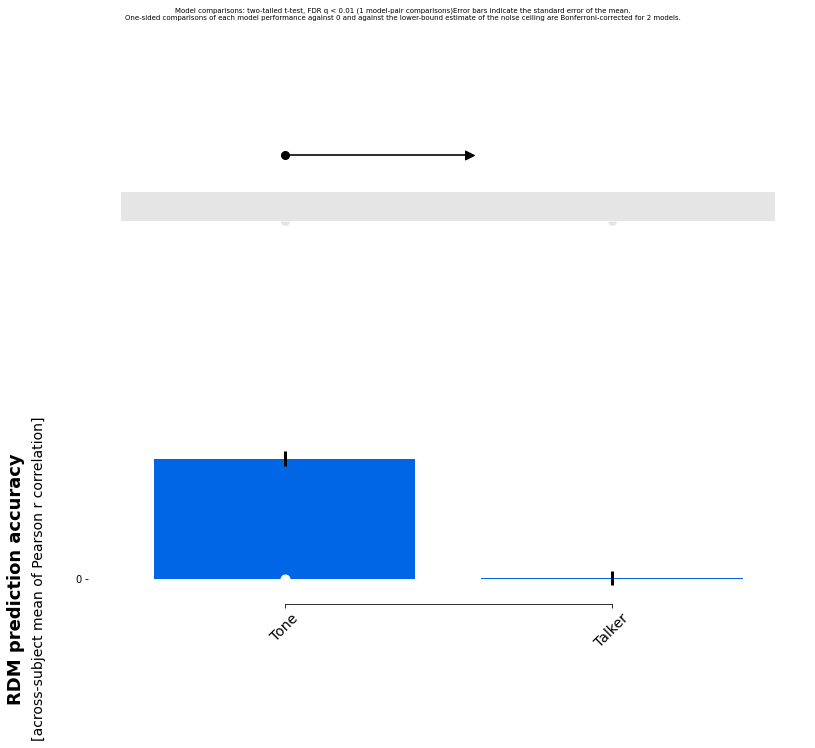

In [21]:
rsatoolbox.vis.plot_model_comparison(results_grr)

### Per "stage" (runcombo), per subject

In [22]:
runcombo_dict = {'early': ['run00', 'run01'], 
                 'middle': ['run02', 'run03'], 
                 'final': ['run04','run05']}

### Participant-specific across-model comparisons

In [23]:
group_dict = {}

for group_id in np.unique(group_rdms.rdm_descriptors['group']):

    for full_sub_id in sub_group_dict[group_id]:
        sub_id = full_sub_id[4:]

        sub_rdm_subset = group_rdms.subset('participant', value=sub_id)
        sub_dict = {}

        for runcombo in runcombo_dict:
            # initialize results list
            runcombo_roi_res_dict = {}
            
            for ROI in roi_list_ordered:
                print(f'{sub_id} runcombo-{runcombo} ROI-{ROI}')
                runs = runcombo_dict[runcombo]

                rdm_subset = sub_rdm_subset.subset('run',value=runs).subset('ROI',value=ROI)
                results_grr = rsatoolbox.inference.eval_fixed(cat_models,
                                                              rdm_subset,  
                                                              method='corr',
                                                             )
                runcombo_roi_res_dict[ROI] = results_grr.get_means()#[0]

            sub_dict[runcombo] = runcombo_roi_res_dict

        group_dict[sub_id] = sub_dict

FLT03 runcombo-early ROI-L-HG
FLT03 runcombo-early ROI-L-PT
FLT03 runcombo-early ROI-L-PP
FLT03 runcombo-early ROI-L-STGp
FLT03 runcombo-early ROI-L-STGa
FLT03 runcombo-early ROI-L-ParsOp
FLT03 runcombo-early ROI-L-ParsTri
FLT03 runcombo-early ROI-R-HG
FLT03 runcombo-early ROI-R-PT
FLT03 runcombo-early ROI-R-PP
FLT03 runcombo-early ROI-R-STGp
FLT03 runcombo-early ROI-R-STGa
FLT03 runcombo-early ROI-R-ParsOp
FLT03 runcombo-early ROI-R-ParsTri
FLT03 runcombo-middle ROI-L-HG
FLT03 runcombo-middle ROI-L-PT
FLT03 runcombo-middle ROI-L-PP
FLT03 runcombo-middle ROI-L-STGp
FLT03 runcombo-middle ROI-L-STGa
FLT03 runcombo-middle ROI-L-ParsOp
FLT03 runcombo-middle ROI-L-ParsTri
FLT03 runcombo-middle ROI-R-HG
FLT03 runcombo-middle ROI-R-PT
FLT03 runcombo-middle ROI-R-PP
FLT03 runcombo-middle ROI-R-STGp
FLT03 runcombo-middle ROI-R-STGa
FLT03 runcombo-middle ROI-R-ParsOp
FLT03 runcombo-middle ROI-R-ParsTri
FLT03 runcombo-final ROI-L-HG
FLT03 runcombo-final ROI-L-PT
FLT03 runcombo-final ROI-L-PP
FLT0

#### Make dataframe

In [24]:
group_df_list = []
for group_id in ['non-Mandarin']: #np.unique(group_rdms.rdm_descriptors['group']):
    print(group_id)
    sub_df_list = []
    
    for full_sub_id in sub_group_dict[group_id]:
        try:
            sub_id = full_sub_id[4:]

            sub_df = pd.DataFrame.from_dict(group_dict[sub_id])
            sub_df['sub_id'] = sub_id
            sub_df_list.append(sub_df)
        except KeyError:
            print(f'not available for {full_sub_id}')

    group_df = pd.concat(sub_df_list)
    group_df.reset_index(inplace=True)
    long_group_df = group_df.melt(value_vars=['early','middle','final'], 
                                  id_vars=['index', 'sub_id'], 
                                  value_name='corr', 
                                  var_name='learning_stage', 
                                  ignore_index=False)
    long_group_df['participant_group'] = group_id
    long_group_df.rename(columns={"index": "ROI"}, inplace=True)
    long_group_df.rename(columns={"sub_id": "participant_id"}, inplace=True)
    
    group_df_list.append(long_group_df)

long_df = pd.concat(group_df_list)

non-Mandarin


In [25]:
# get model names for the models in the RSA operation
model_names = [x.name for x in results_grr.models]
print(model_names)

['Tone', 'Talker']


In [26]:
# split the results arrays into single-element columns by model
long_df[model_names] = long_df['corr'].to_list()
long_df.drop('corr', axis='columns', inplace=True) 

In [27]:
long_df.head()

ROI participant_id learning_stage participant_group      Tone    Talker
0    L-HG          FLT02          early      non-Mandarin  0.030261 -0.016876
1    L-PT          FLT02          early      non-Mandarin  0.010440 -0.000730
2    L-PP          FLT02          early      non-Mandarin  0.001837  0.009433
3  L-STGp          FLT02          early      non-Mandarin  0.039202 -0.011880
4  L-STGa          FLT02          early      non-Mandarin -0.011086  0.002193

In [28]:
# reshape the dataframe again
model_long_df = long_df.melt(value_vars=model_names, 
                             id_vars=['ROI', 'learning_stage', 'participant_id', 'participant_group'], 
                             value_name='similarity', 
                             var_name='model', 
                             ignore_index=False)
model_long_df.reset_index(inplace=True)

# get rid of "middle" stage
#model_long_df.drop(model_long_df[model_long_df.learning_stage=='middle'].index, inplace=True)

In [29]:
model_long_df.head()

index     ROI learning_stage participant_id participant_group model  \
0      0    L-HG          early          FLT02      non-Mandarin  Tone   
1      1    L-PT          early          FLT02      non-Mandarin  Tone   
2      2    L-PP          early          FLT02      non-Mandarin  Tone   
3      3  L-STGp          early          FLT02      non-Mandarin  Tone   
4      4  L-STGa          early          FLT02      non-Mandarin  Tone   

   similarity  
0    0.030261  
1    0.010440  
2    0.001837  
3    0.039202  
4   -0.011086

#### Move hemisphere to separate column

In [30]:
laterality_df = model_long_df.copy()
laterality_df['hemisphere'] = laterality_df['ROI'].str[:1]
laterality_df['ROI_hemi'] = laterality_df['ROI']
laterality_df['ROI'] = laterality_df['ROI'].str[2:]

In [31]:
laterality_df.head()

index   ROI learning_stage participant_id participant_group model  \
0      0    HG          early          FLT02      non-Mandarin  Tone   
1      1    PT          early          FLT02      non-Mandarin  Tone   
2      2    PP          early          FLT02      non-Mandarin  Tone   
3      3  STGp          early          FLT02      non-Mandarin  Tone   
4      4  STGa          early          FLT02      non-Mandarin  Tone   

   similarity hemisphere ROI_hemi  
0    0.030261          L     L-HG  
1    0.010440          L     L-PT  
2    0.001837          L     L-PP  
3    0.039202          L   L-STGp  
4   -0.011086          L   L-STGa

#### Make intermediate anatomy grouping

In [32]:
np.unique(laterality_df.ROI)

array(['HG', 'PP', 'PT', 'ParsOp', 'ParsTri', 'STGa', 'STGp'],
      dtype=object)

In [33]:
intermed_df = laterality_df.copy()

# create a new column based on rostral–caudal axis
intermed_df['intermediate'] = ''

intermed_df.loc[laterality_df['ROI']=='HG', 'intermediate'] = 'ACtx'
intermed_df.loc[laterality_df['ROI']=='PP', 'intermediate'] = 'ACtx'
intermed_df.loc[laterality_df['ROI']=='PT', 'intermediate'] = 'ACtx'

intermed_df.loc[laterality_df['ROI']=='STGa', 'intermediate'] = 'STG'
intermed_df.loc[laterality_df['ROI']=='STGp', 'intermediate'] = 'STG'

intermed_df.loc[laterality_df['ROI']=='ParsTri', 'intermediate'] = 'IFG'
intermed_df.loc[laterality_df['ROI']=='ParsOp',  'intermediate'] = 'IFG'

intermed_df.head()

index   ROI learning_stage participant_id participant_group model  \
0      0    HG          early          FLT02      non-Mandarin  Tone   
1      1    PT          early          FLT02      non-Mandarin  Tone   
2      2    PP          early          FLT02      non-Mandarin  Tone   
3      3  STGp          early          FLT02      non-Mandarin  Tone   
4      4  STGa          early          FLT02      non-Mandarin  Tone   

   similarity hemisphere ROI_hemi intermediate  
0    0.030261          L     L-HG         ACtx  
1    0.010440          L     L-PT         ACtx  
2    0.001837          L     L-PP         ACtx  
3    0.039202          L   L-STGp          STG  
4   -0.011086          L   L-STGa          STG

#### Make model difference column

In [34]:
tone_df = intermed_df[intermed_df.model=='Tone']
talker_df = intermed_df[intermed_df.model=='Talker']
diff_series = np.array(tone_df.similarity) - np.array(talker_df.similarity)
difference_df = tone_df.copy()
difference_df.loc[:,('difference_score')] = diff_series
difference_df.drop(columns=['model', 'similarity'], inplace=True)

In [35]:
difference_df

index      ROI learning_stage participant_id participant_group  \
0        0       HG          early          FLT02      non-Mandarin   
1        1       PT          early          FLT02      non-Mandarin   
2        2       PP          early          FLT02      non-Mandarin   
3        3     STGp          early          FLT02      non-Mandarin   
4        4     STGa          early          FLT02      non-Mandarin   
..     ...      ...            ...            ...               ...   
499    163       PP          final          FLT30      non-Mandarin   
500    164     STGp          final          FLT30      non-Mandarin   
501    165     STGa          final          FLT30      non-Mandarin   
502    166   ParsOp          final          FLT30      non-Mandarin   
503    167  ParsTri          final          FLT30      non-Mandarin   

    hemisphere   ROI_hemi intermediate  difference_score  
0            L       L-HG         ACtx          0.047137  
1            L       L-PT         ACtx          0.011170  
2            L       L-PP         ACtx         -0.007596  
3            L     L-STGp          STG          0.051082  
4            L     L-STGa          STG         -0.013279  
..         ...        ...          ...               ...  
499          R       R-PP         ACtx          0.057511  
500          R     R-STGp          STG          0.047796  
501          R     R-STGa          STG         -0.001313  
502          R   R-ParsOp          IFG          0.043503  
503          R  R-ParsTri          IFG         -0.063178  

[504 rows x 9 columns]

### statistics

In [36]:
from scipy import stats

import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_1samp, ttest_rel

#### Model difference ANOVA stats

First, check the Tone vs. Talker contrast

In [37]:
# First, find the difference between models in the main dataframe
pairwise_models = pg.pairwise_tests(data=intermed_df,
                             dv='similarity', 
                             within=['model', ],
                             subject='participant_id',
                             padjust='fdr',
                             return_desc=True) 

# Check available columns
print("Available columns:", pairwise_models.columns)

# Display key columns 
print("\nPost-hoc Pairwise Comparisons:")

pd.set_option('display.max_rows', None)

pairwise_interaction = pairwise_models

# show results
pairwise_interaction[['Contrast', 'Contrast', 'A', 'B', 'T', 'dof', 'p-unc', 'BF10']]
#print(pairwise_interaction)

Available columns: Index(['Contrast', 'A', 'B', 'mean(A)', 'std(A)', 'mean(B)', 'std(B)',
       'Paired', 'Parametric', 'T', 'dof', 'alternative', 'p-unc', 'BF10',
       'hedges'],
      dtype='object')

Post-hoc Pairwise Comparisons:


Contrast Contrast       A     B         T   dof     p-unc   BF10
0    model    model  Talker  Tone -3.521671  11.0  0.004784  10.82

In [38]:
pairwise_models

Contrast       A     B   mean(A)    std(A)   mean(B)    std(B)  Paired  \
0    model  Talker  Tone -0.000843  0.017845  0.039099  0.025871    True   

   Parametric         T   dof alternative     p-unc   BF10    hedges  
0        True -3.521671  11.0   two-sided  0.004784  10.82 -1.735357

Next, run stats with the computed difference scores (Tone - Talker)

In [39]:
# Mixed-Effects ANOVA with Hemisphere, Region, and Interaction
aov = AnovaRM(difference_df, 
              aggregate_func='mean',
              depvar='difference_score', 
              subject='participant_id', 
              within=['learning_stage','ROI', 'hemisphere']).fit()

# Display results
aov.summary()

/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Anova
=============================================================
                              F Value  Num DF  Den DF  Pr > F
-------------------------------------------------------------
learning_stage                 0.4252  2.0000  22.0000 0.6589
ROI                            2.8822  6.0000  66.0000 0.0148
hemisphere                     0.1606  1.0000  11.0000 0.6963
learning_stage:ROI             0.5827 12.0000 132.0000 0.8531
learning_stage:hemisphere      1.0453  2.0000  22.0000 0.3684
ROI:hemisphere                 0.5603  6.0000  66.0000 0.7603
learning_stage:ROI:hemisphere  1.1615 12.0000 132.0000 0.3174
=============================================================

"""

In [39]:

# Pairwise comparisons for region with FDR correction
pairwise_by_learning_stage = pg.pairwise_tests(data=difference_df,
                             dv='difference_score', 
                             within=['ROI'],
                             subject='participant_id',
                             padjust='fdr') 

# Check available columns
print("Available columns:", pairwise_by_learning_stage.columns)

# Display key columns 
print("\nPost-hoc Pairwise Comparisons:")

pd.set_option('display.max_rows', None)

pairwise_interaction = pairwise_by_learning_stage#[pairwise_by_learning_stage.Contrast.str.contains(' * ')].reset_index()
pairwise_interaction = pairwise_interaction[pairwise_interaction['p-unc'] < 0.05].reset_index()

# show results
pairwise_interaction[['Contrast', 'Contrast', 'A', 'B', 'T', 'dof', 'p-unc', 'p-corr', 'BF10']]
#print(pairwise_interaction)

Available columns: Index(['Contrast', 'A', 'B', 'Paired', 'Parametric', 'T', 'dof', 'alternative',
       'p-unc', 'p-corr', 'p-adjust', 'BF10', 'hedges'],
      dtype='object')

Post-hoc Pairwise Comparisons:


Contrast Contrast   A     B         T   dof     p-unc    p-corr    BF10
0      ROI      ROI  HG    PP -2.788628  11.0  0.017630  0.092556   3.749
1      ROI      ROI  HG  STGa -3.170354  11.0  0.008913  0.062391   6.498
2      ROI      ROI  HG  STGp -3.734393  11.0  0.003298  0.040229  14.723
3      ROI      ROI  PT  STGp -3.648419  11.0  0.003831  0.040229  13.002

In [40]:
model_df_collapsed = difference_df.groupby(["participant_id", "ROI"], 
                                       as_index=False).agg({"difference_score": "mean"})

# Collect p-values
p_values = []
t_stats = []
comparisons = []

for region, data in model_df_collapsed.groupby(["ROI"]):
    t_stat, p_val = ttest_1samp(data["difference_score"], 0) # , df
    p_values.append(p_val)
    comparisons.append((region[0], t_stat))
    t_stats.append(t_stat)

# Apply FDR correction
_, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# Print corrected results
for (region, t_stat), p_val_corr in zip(comparisons, p_corrected):
    print(f"{region} {t_stat:.2f}  {p_val_corr:.4f}")


HG 2.42  0.0337
PP 2.97  0.0179
PT 3.05  0.0179
ParsOp 3.13  0.0179
ParsTri 2.75  0.0220
STGa 3.43  0.0179
STGp 4.40  0.0074


In [56]:
print(model_df_collapsed.groupby('ROI',as_index=False).agg({"difference_score": "mean"}))

mean_diff = model_df_collapsed.groupby('ROI',as_index=False).agg({"difference_score": "mean"}).difference_score.mean()
print(f'\nmean difference score: {mean_diff:.05f}')

       ROI  difference_score
0       HG          0.023098
1       PP          0.037623
2       PT          0.032725
3   ParsOp          0.044944
4  ParsTri          0.041251
5     STGa          0.043944
6     STGp          0.056008

mean difference score: 0.03994


In [41]:

roi_df_collapsed = difference_df.groupby(["participant_id", "ROI", 'learning_stage'], 
                                       as_index=False).agg({"difference_score": "mean"})

# Collect p-values
p_values = []
t_stats = []
comparisons = []

for region_stage, data in roi_df_collapsed.groupby(["ROI"]):
    t_stat, p_val = ttest_rel(data[data.learning_stage=='final']['difference_score'], 
                              data[data.learning_stage=='early']['difference_score'])
    p_values.append(p_val)
    comparisons.append((region_stage[0], t_stat))
    t_stats.append(t_stat)

# Apply FDR correction
_, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# Print corrected results
print('final vs. early stage')
for (region, t_stat), p_val_corr in zip(comparisons, p_corrected):
    print(f"{region} {t_stat:.2f} {p_val_corr:.4f}")



final vs. early stage
HG 0.39 0.8840
PP 0.31 0.8840
PT 0.15 0.8840
ParsOp 2.16 0.3786
ParsTri 0.73 0.8840
STGa 0.55 0.8840
STGp 0.43 0.8840


#### model difference plots

/scratch/slurm-5814463/ipykernel_48556/3411223133.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')


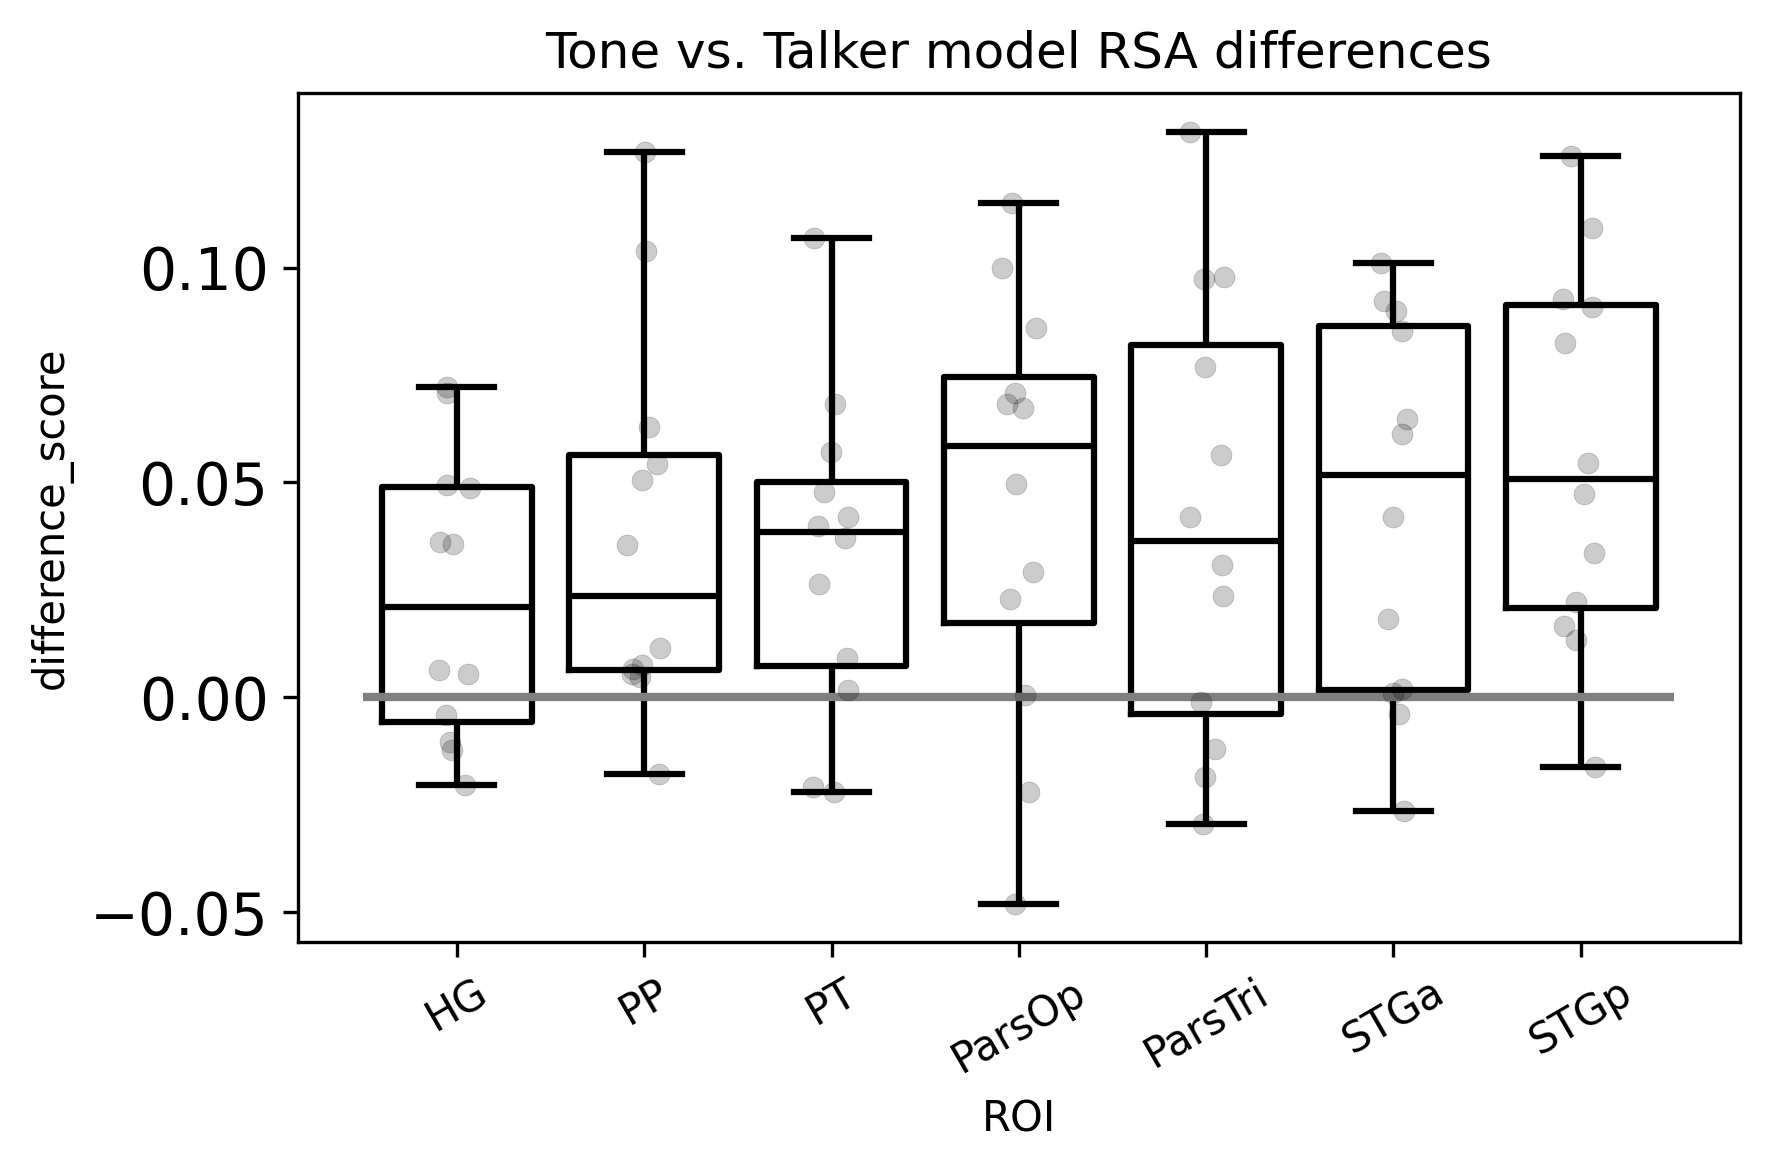

In [42]:
            # Plot model differences rather than individual model scores
            roi_df_collapsed = difference_df.groupby(["participant_id", "ROI"], 
                                                   as_index=False).agg({"difference_score": "mean"})

            fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=300)

            sns.boxplot(data=roi_df_collapsed, 
                          x='ROI', y='difference_score', 
                          color='k',
                          #hue='model', palette='flare',
                          fliersize = 0,            
                          linewidth=1.5,
                          fill=False,
                          #legend=None,
                          ax=ax);
            sns.stripplot(data=roi_df_collapsed, 
                          x='ROI', y='difference_score', 
                          color='k',
                          #hue='model', palette='flare', dodge=True,
                          linewidth=0.2,
                          alpha=.2,
                          #legend=None,
                          ax=ax);


            xmin, xmax = ax.get_xlim()
            ax.hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='-', linewidth=2)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')
            #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
            ax.set_title(f'Tone vs. Talker model RSA differences');
            #ax.set_ylim([-5, 5])

            fig.tight_layout()


/scratch/slurm-5814463/ipykernel_48556/2151910033.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')


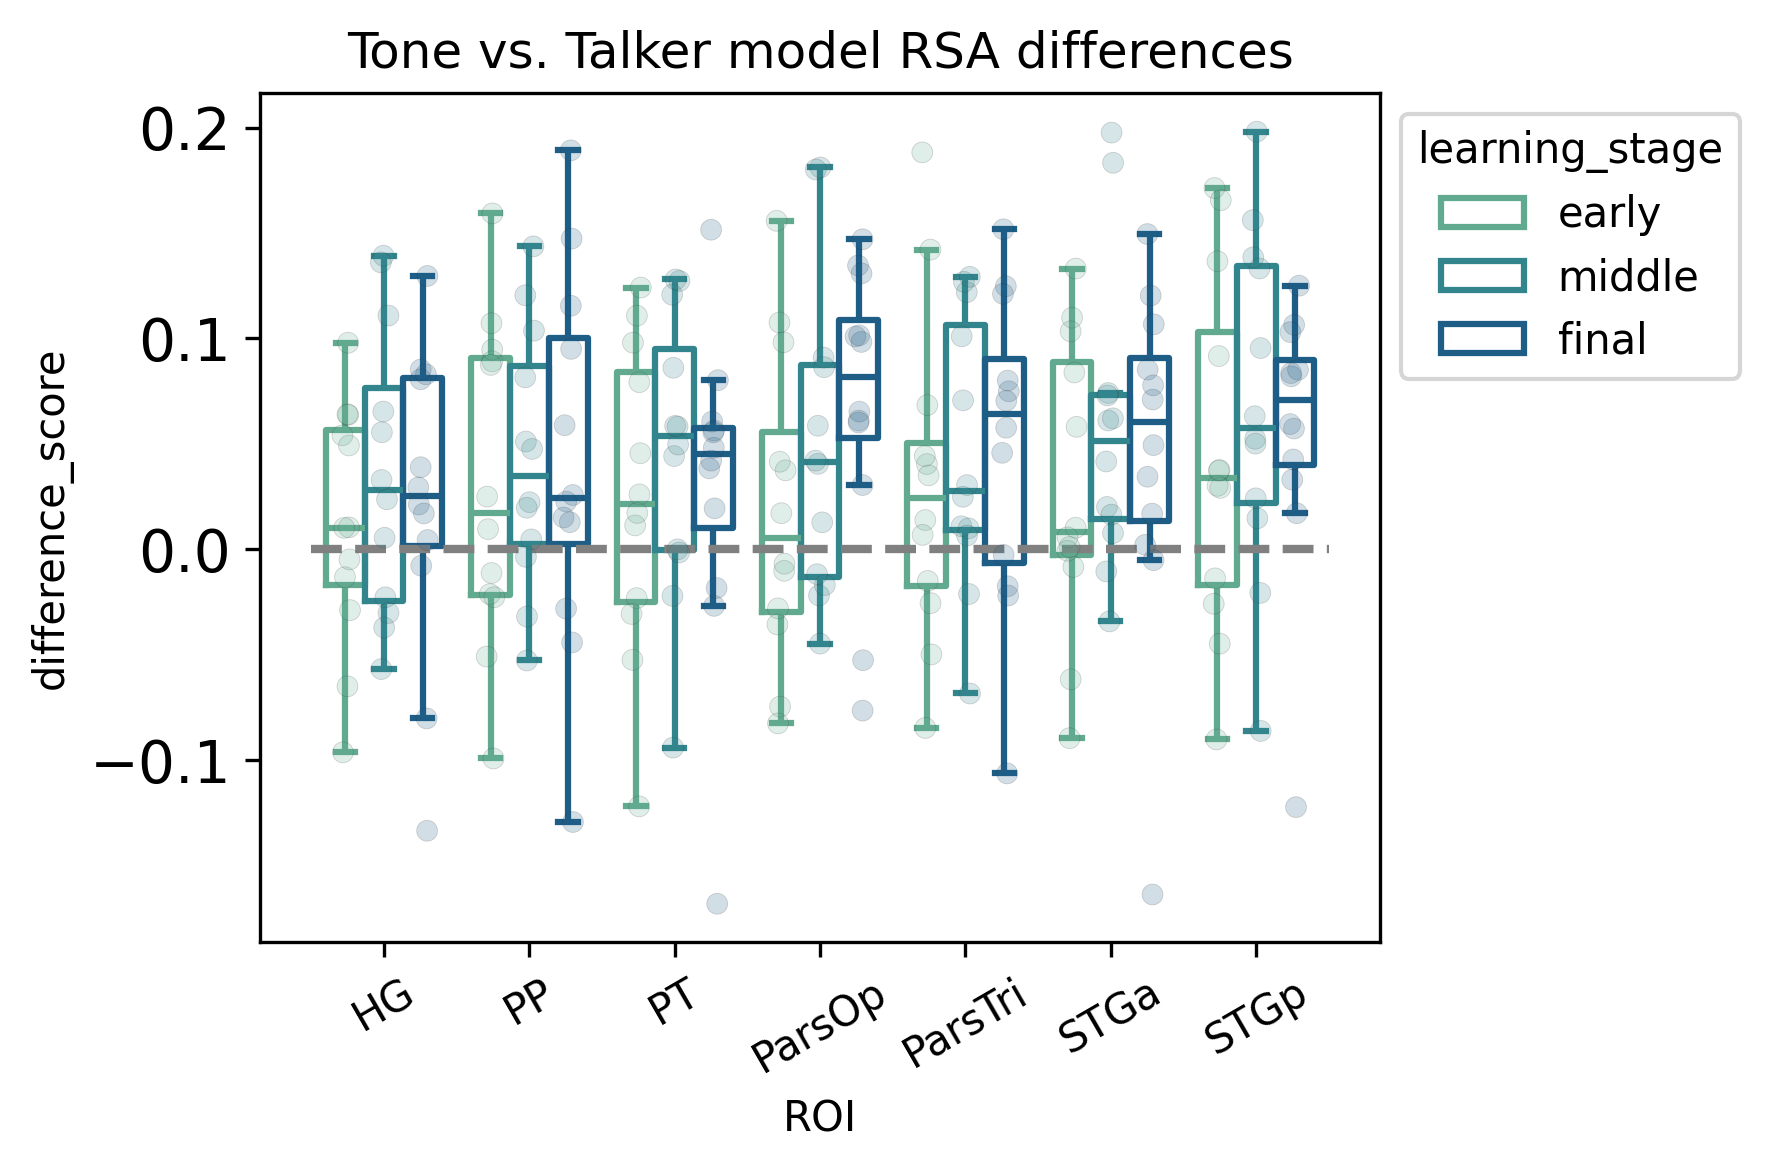

In [43]:
# Plot model differences rather than individual model scores
roi_df_collapsed = difference_df.groupby(["participant_id", "ROI", 'learning_stage'], 
                                       as_index=False).agg({"difference_score": "mean"})

fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=300)

sns.boxplot(data=roi_df_collapsed, 
              x='ROI', y='difference_score', 
              hue='learning_stage', hue_order=['early', 'middle', 'final'],
              palette='crest',  
              fliersize=0,
              linewidth=1.5,
              fill=False,
              #legend=None,
              ax=ax);
sns.stripplot(data=roi_df_collapsed, 
              x='ROI', y='difference_score', 
              hue='learning_stage', hue_order=['early', 'middle', 'final'],
              palette='crest',
              dodge=True,
              linewidth=0.2,
              alpha=.2,
              legend=None,
              ax=ax);


xmin, xmax = ax.get_xlim()
ax.hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='--', linewidth=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title(f'Tone vs. Talker model RSA differences');
#ax.set_ylim([-5, 5])

fig.tight_layout()


#### Model difference ANOVA stats per intermediate grouping

In [44]:
# Mixed-Effects ANOVA with Hemisphere, Region, and Interaction
aov = AnovaRM(difference_df, 
              aggregate_func='mean',
              depvar='difference_score', 
              subject='participant_id', 
              within=['learning_stage','intermediate', 'hemisphere']).fit()

# Display results
aov.summary()

/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/statsmodels/stats/anova.py:508: FutureWarning: The provided callable <function mean at 0x7fd4b0117700> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  self.data = (self.data
/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Anova
====================================================================
                                       F Value Num DF  Den DF Pr > F
--------------------------------------------------------------------
learning_stage                          0.4750 2.0000 22.0000 0.6281
intermediate                            3.2077 2.0000 22.0000 0.0599
hemisphere                              0.2320 1.0000 11.0000 0.6395
learning_stage:intermediate             0.5214 4.0000 44.0000 0.7204
learning_stage:hemisphere               1.1811 2.0000 22.0000 0.3257
intermediate:hemisphere                 0.3033 2.0000 22.0000 0.7414
learning_stage:intermediate:hemisphere  1.3146 4.0000 44.0000 0.2794
====================================================================

"""

In [45]:
# Pairwise comparisons for region with FDR correction
pairwise_by_learning_stage = pg.pairwise_tests(data=difference_df,
                             dv='difference_score', 
                             within=['learning_stage', 'hemisphere', ],
                             subject='participant_id',
                             padjust='fdr') 

# Check available columns
print("Available columns:", pairwise_by_learning_stage.columns)

# Display key columns 
print("\nPost-hoc Pairwise Comparisons:")

pd.set_option('display.max_rows', None)

pairwise_interaction = pairwise_by_learning_stage[pairwise_by_learning_stage.Contrast.str.contains(' * ')].reset_index()
#pairwise_interaction = pairwise_interaction[pairwise_interaction['p-unc'] < 0.05].reset_index()

# show results
pairwise_interaction[['Contrast', 'learning_stage', 'A', 'B', 'T', 'dof', 'p-unc', 'p-corr', 'BF10']]
#print(pairwise_interaction)

Available columns: Index(['Contrast', 'learning_stage', 'A', 'B', 'Paired', 'Parametric', 'T',
       'dof', 'alternative', 'p-unc', 'p-corr', 'p-adjust', 'BF10', 'hedges'],
      dtype='object')

Post-hoc Pairwise Comparisons:


Contrast learning_stage  A  B         T   dof     p-unc  \
0  learning_stage * hemisphere          early  L  R  0.141413  11.0  0.890100   
1  learning_stage * hemisphere          final  L  R -0.388337  11.0  0.705178   
2  learning_stage * hemisphere         middle  L  R  1.043121  11.0  0.319275   

   p-corr   BF10  
0  0.8901   0.29  
1  0.8901  0.307  
2  0.8901  0.452

In [46]:
# Pairwise comparisons for region with FDR correction
pairwise_by_learning_stage = pg.pairwise_tests(data=difference_df,
                             dv='difference_score', 
                             within=['hemisphere', 'learning_stage', ],
                             subject='participant_id',
                             padjust='fdr') 

# Check available columns
print("Available columns:", pairwise_by_learning_stage.columns)

# Display key columns 
print("\nPost-hoc Pairwise Comparisons:")

pd.set_option('display.max_rows', None)

pairwise_interaction = pairwise_by_learning_stage[pairwise_by_learning_stage.Contrast.str.contains(' * ')].reset_index()
#pairwise_interaction = pairwise_interaction[pairwise_interaction['p-unc'] < 0.05].reset_index()

# show results
pairwise_interaction[['Contrast', 'hemisphere',  'A', 'B', 'T', 'dof', 'p-unc', 'p-corr', 'BF10']]
#print(pairwise_interaction)

Available columns: Index(['Contrast', 'hemisphere', 'A', 'B', 'Paired', 'Parametric', 'T', 'dof',
       'alternative', 'p-unc', 'p-corr', 'p-adjust', 'BF10', 'hedges'],
      dtype='object')

Post-hoc Pairwise Comparisons:


Contrast hemisphere      A       B         T   dof  \
0  hemisphere * learning_stage          L  early   final -0.555304  11.0   
1  hemisphere * learning_stage          L  early  middle -1.165408  11.0   
2  hemisphere * learning_stage          L  final  middle -0.472403  11.0   
3  hemisphere * learning_stage          R  early   final -0.764317  11.0   
4  hemisphere * learning_stage          R  early  middle -0.909707  11.0   
5  hemisphere * learning_stage          R  final  middle  0.092176  11.0   

      p-unc    p-corr   BF10  
0  0.589801  0.775047  0.328  
1  0.268503  0.775047  0.503  
2  0.645873  0.775047  0.317  
3  0.460760  0.775047  0.369  
4  0.382478  0.775047  0.407  
5  0.928216  0.928216  0.288

In [45]:

# Pairwise comparisons for region with FDR correction
pairwise_by_learning_stage = pg.pairwise_tests(data=difference_df,
                             dv='difference_score', 
                             within=['intermediate'],
                             subject='participant_id',
                             padjust='fdr') 

# Check available columns
print("Available columns:", pairwise_by_learning_stage.columns)

# Display key columns 
print("\nPost-hoc Pairwise Comparisons:")

pd.set_option('display.max_rows', None)

pairwise_interaction = pairwise_by_learning_stage#[pairwise_by_learning_stage.Contrast.str.contains(' * ')].reset_index()
#pairwise_interaction = pairwise_interaction[pairwise_interaction['p-unc'] < 0.05].reset_index()

# show results
pairwise_interaction[['Contrast', 'Contrast', 'A', 'B', 'T', 'dof', 'p-unc', 'BF10']]
#print(pairwise_interaction)

Available columns: Index(['Contrast', 'A', 'B', 'Paired', 'Parametric', 'T', 'dof', 'alternative',
       'p-unc', 'p-corr', 'p-adjust', 'BF10', 'hedges'],
      dtype='object')

Post-hoc Pairwise Comparisons:


Contrast      Contrast     A    B         T   dof     p-unc   BF10
0  intermediate  intermediate  ACtx  IFG -1.264628  11.0  0.232141  0.552
1  intermediate  intermediate  ACtx  STG -3.066070  11.0  0.010735  5.587
2  intermediate  intermediate   IFG  STG -1.051609  11.0  0.315532  0.455

In [46]:
model_df_collapsed = difference_df.groupby(["participant_id", "intermediate"], 
                                       as_index=False).agg({"difference_score": "mean"})

# Collect p-values
p_values = []
t_stats = []
comparisons = []

for region, data in model_df_collapsed.groupby(["intermediate"]):
    t_stat, p_val = ttest_1samp(data["difference_score"], 0) # , df
    p_values.append(p_val)
    comparisons.append((region[0], t_stat))
    t_stats.append(t_stat)

# Apply FDR correction
_, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# Print corrected results
for (region, t_stat), p_val_corr in zip(comparisons, p_corrected):
    print(f"Region: {region}, t-stat: {t_stat:.2f} -> Corrected p= {p_val_corr:.4f}")


Region: ACtx, t-stat: 3.01 -> Corrected p= 0.0119
Region: IFG, t-stat: 3.01 -> Corrected p= 0.0119
Region: STG, t-stat: 4.06 -> Corrected p= 0.0056


In [47]:

roi_df_collapsed = difference_df.groupby(["participant_id", "intermediate", 'learning_stage'], 
                                       as_index=False).agg({"difference_score": "mean"})

# Collect p-values
p_values = []
t_stats = []
comparisons = []

for region_stage, data in roi_df_collapsed.groupby(["intermediate"]):
    t_stat, p_val = ttest_rel(data[data.learning_stage=='final']['difference_score'], 
                              data[data.learning_stage=='early']['difference_score'])
    p_values.append(p_val)
    comparisons.append((region_stage[0], t_stat))
    t_stats.append(t_stat)

# Apply FDR correction
_, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# Print corrected results
for (region, t_stat), p_val_corr in zip(comparisons, p_corrected):
    print(f"Region: {region} , final vs. early stage, t = {t_stat:.2f} ; corrected p = {p_val_corr:.4f}")



Region: ACtx , final vs. early stage, t = 0.29 ; corrected p = 0.7753
Region: IFG , final vs. early stage, t = 1.55 ; corrected p = 0.4515
Region: STG , final vs. early stage, t = 0.51 ; corrected p = 0.7753


In [56]:

roi_df_collapsed = difference_df.groupby(["participant_id",'learning_stage'], 
                                       as_index=False).agg({"difference_score": "mean"})

# Collect p-values
p_values = []
t_stats = []
comparisons = []

t_stat, p_val = ttest_rel(roi_df_collapsed[roi_df_collapsed.learning_stage=='final']['difference_score'], 
                          roi_df_collapsed[roi_df_collapsed.learning_stage=='early']['difference_score'])
p_values.append(p_val)
comparisons.append(t_stat)
t_stats.append(t_stat)

print(f"All cortex , final vs. early stage, t = {t_stat:.2f} ;  p = {p_val:.4f}")

All cortex , final vs. early stage, t = 0.68 ;  p = 0.5117


In [59]:
# just checking - what about if each data point was included separately?
roi_df_collapsed = difference_df.groupby(["participant_id",'ROI','hemisphere','learning_stage'], 
                                       as_index=False).agg({"difference_score": "mean"})

# Collect p-values
p_values = []
t_stats = []
comparisons = []

t_stat, p_val = ttest_rel(roi_df_collapsed[roi_df_collapsed.learning_stage=='final']['difference_score'], 
                          roi_df_collapsed[roi_df_collapsed.learning_stage=='early']['difference_score'])
p_values.append(p_val)
comparisons.append(t_stat)
t_stats.append(t_stat)

print(f"All cortex , final vs. early stage, t = {t_stat:.2f} ;  p = {p_val:.4f}")

All cortex , final vs. early stage, t = 2.23 ;  p = 0.0274


#### model difference plots per intermediate grouping

/scratch/slurm-5814463/ipykernel_48556/701301739.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')


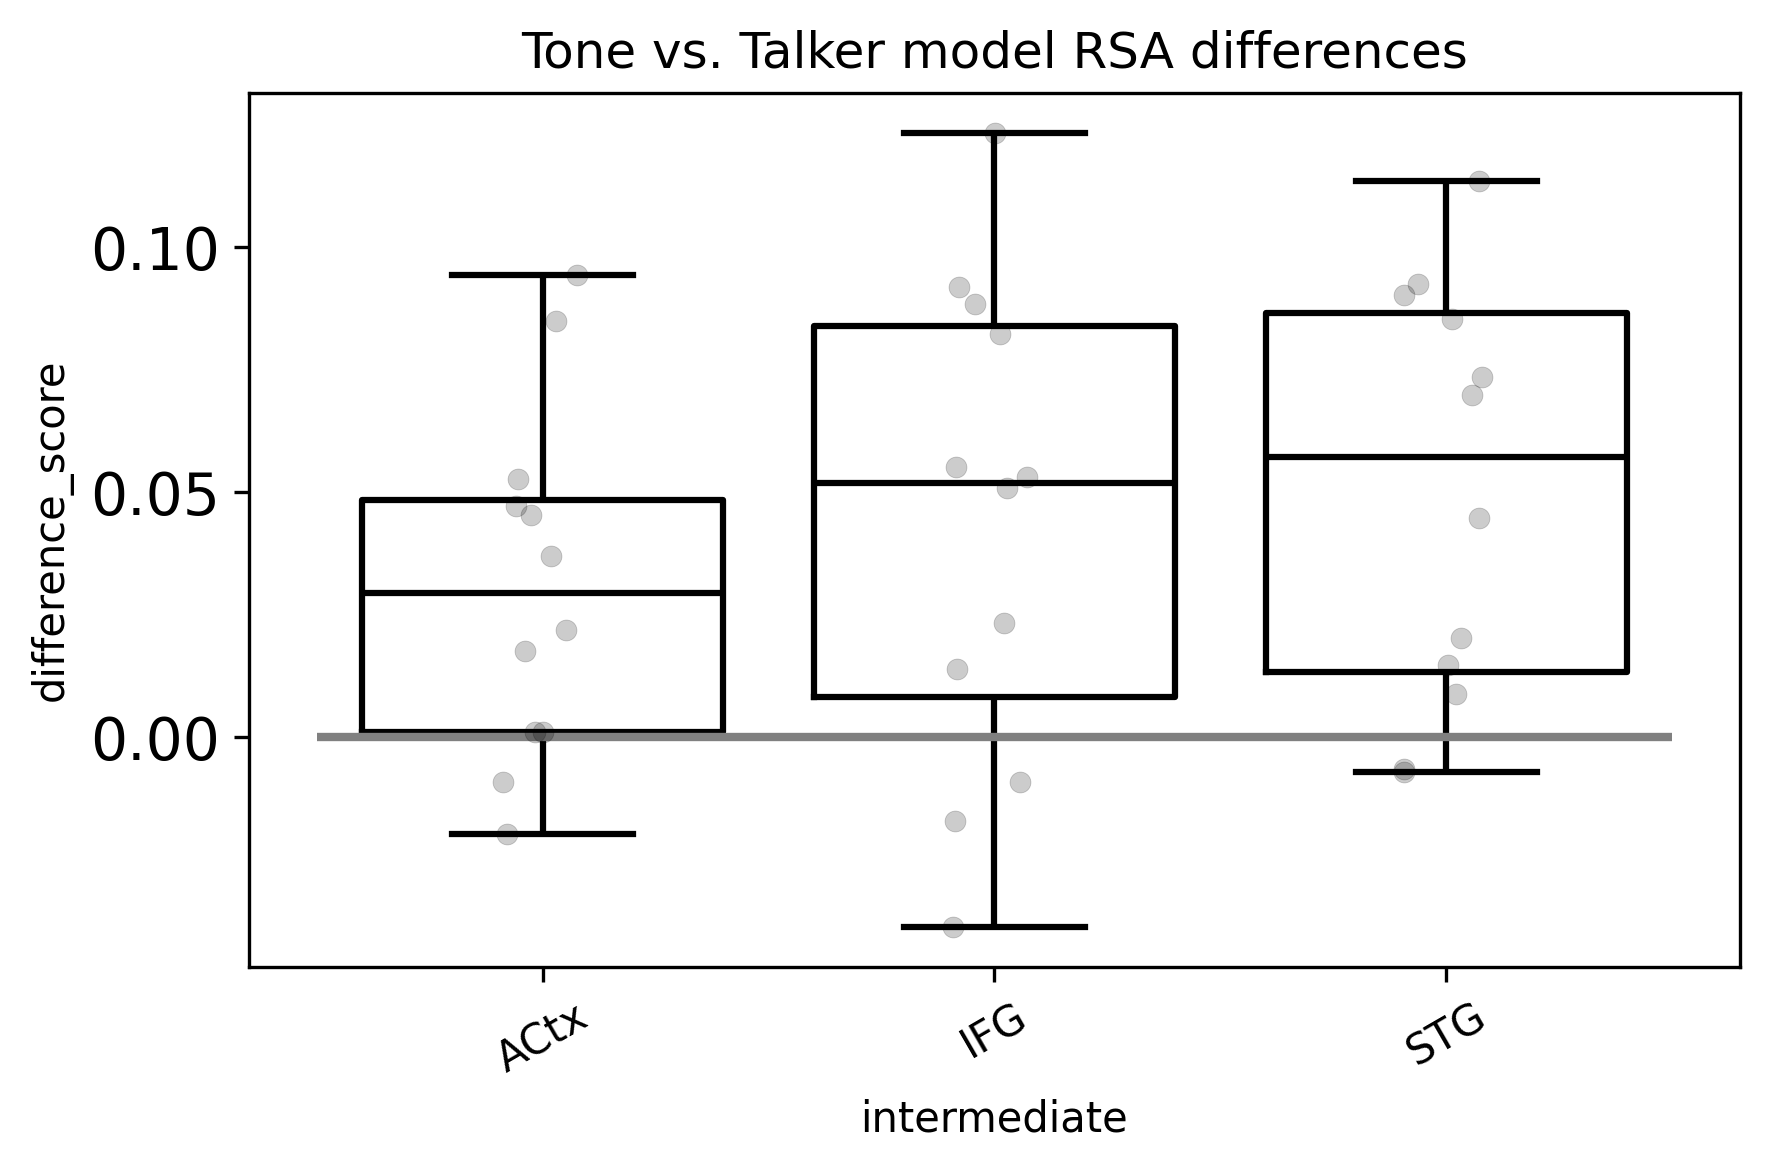

In [48]:
# Plot model differences rather than individual model scores
roi_df_collapsed = difference_df.groupby(["participant_id", "intermediate"], 
                                       as_index=False).agg({"difference_score": "mean"})

fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=300)

sns.boxplot(data=roi_df_collapsed, 
              x='intermediate', y='difference_score', 
              color='k',
              #hue='model', palette='flare',
              fliersize = 0,            
              linewidth=1.5,
              fill=False,
              #legend=None,
              ax=ax);
sns.stripplot(data=roi_df_collapsed, 
              x='intermediate', y='difference_score', 
              color='k',
              #hue='model', palette='flare', dodge=True,
              linewidth=0.2,
              alpha=.2,
              #legend=None,
              ax=ax);


xmin, xmax = ax.get_xlim()
ax.hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='-', linewidth=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title(f'Tone vs. Talker model RSA differences');
#ax.set_ylim([-5, 5])

fig.tight_layout()


/scratch/slurm-5814463/ipykernel_48556/4277118807.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')


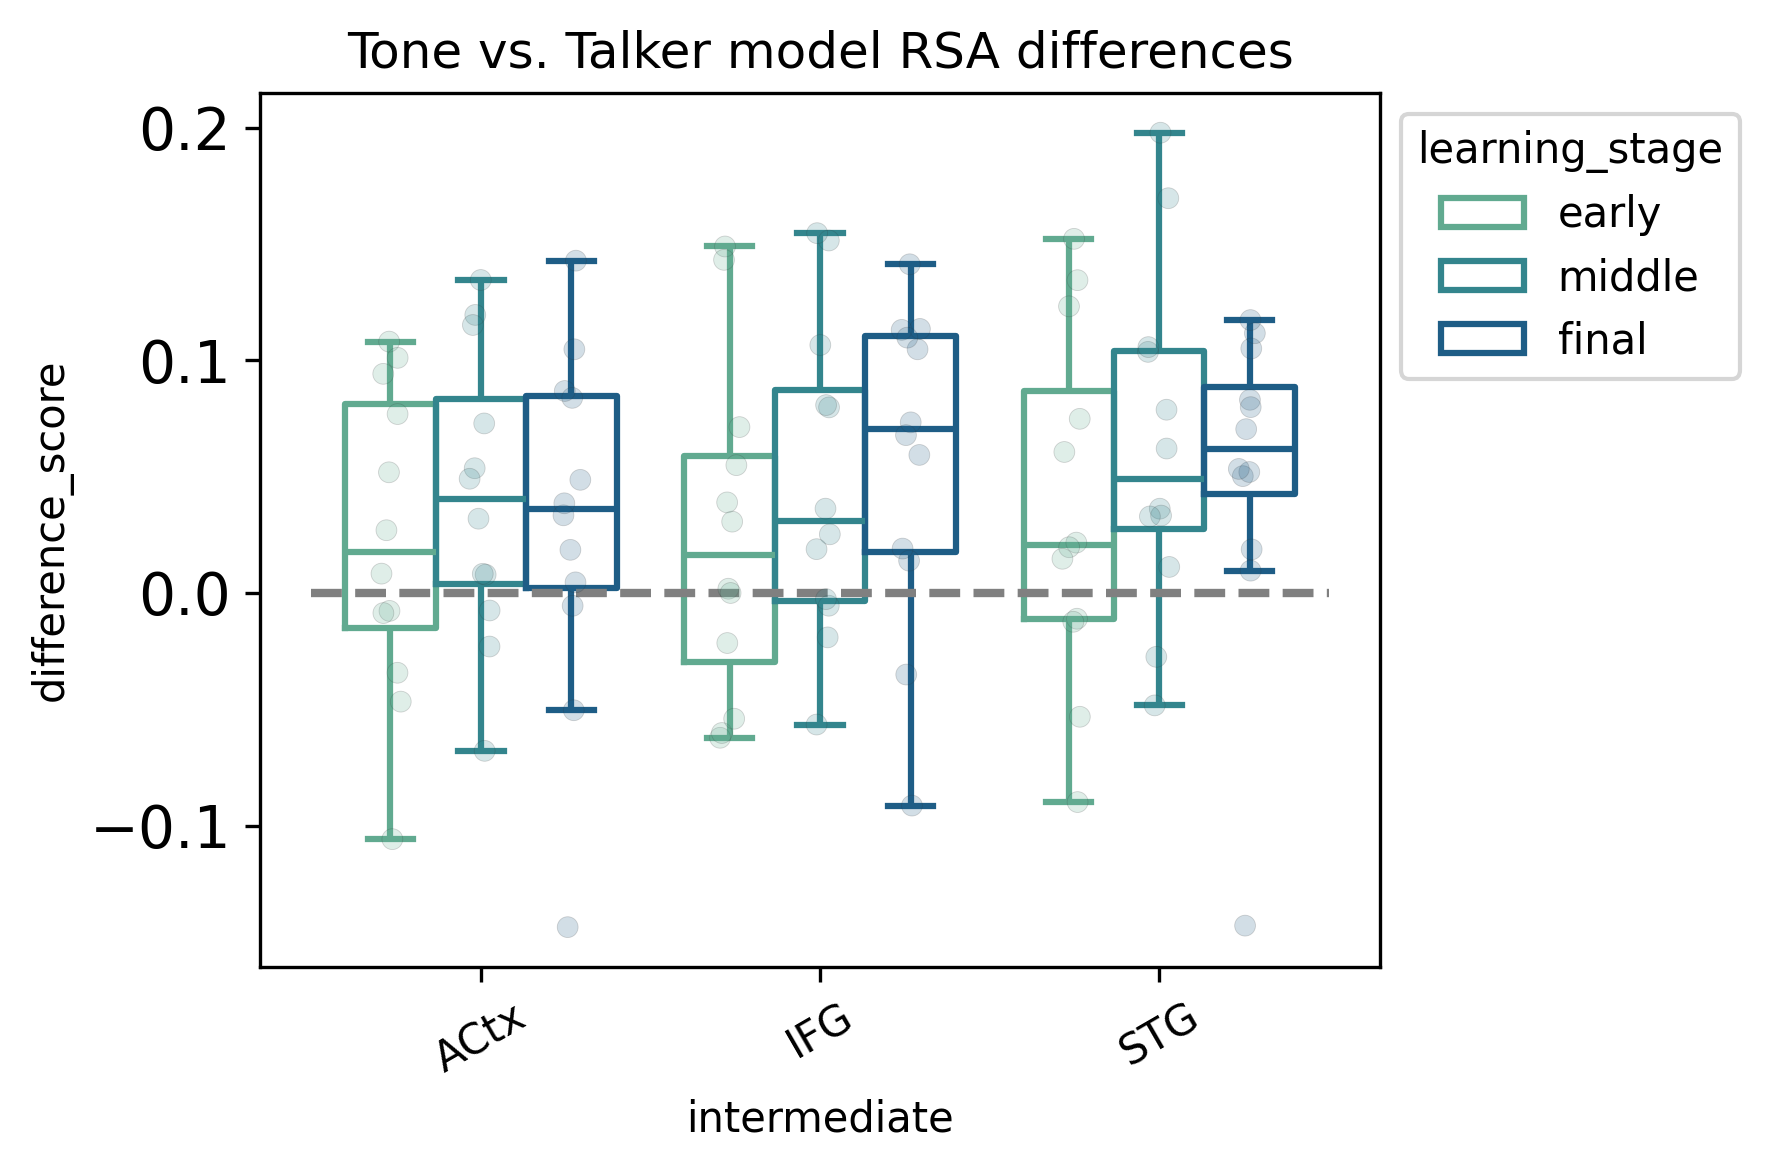

In [49]:
# Plot model differences rather than individual model scores
roi_df_collapsed = difference_df.groupby(["participant_id", "intermediate", 'learning_stage'], 
                                       as_index=False).agg({"difference_score": "mean"})

fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=300)

sns.boxplot(data=roi_df_collapsed, 
              x='intermediate', y='difference_score', 
              hue='learning_stage', hue_order=['early', 'middle', 'final'],
              palette='crest',  
              fliersize=0,
              linewidth=1.5,
              fill=False,
              #legend=None,
              ax=ax);
sns.stripplot(data=roi_df_collapsed, 
              x='intermediate', y='difference_score', 
              hue='learning_stage', hue_order=['early', 'middle', 'final'],
              palette='crest',
              dodge=True,
              linewidth=0.2,
              alpha=.2,
              legend=None,
              ax=ax);


xmin, xmax = ax.get_xlim()
ax.hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='--', linewidth=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title(f'Tone vs. Talker model RSA differences');
#ax.set_ylim([-5, 5])

fig.tight_layout()


#### per-model ANOVA stats

In [37]:
# Mixed-Effects ANOVA with Hemisphere, Region, and Interaction
aov = AnovaRM(intermed_df, 
              aggregate_func='mean',
              depvar='similarity', 
              subject='participant_id', 
              within=['learning_stage','ROI', 'hemisphere', 'model']).fit()

# Display results
aov.summary()

/bgfs/bchandrasekaran/krs228/software/miniconda3/envs/py3/lib/python3.9/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Anova
===================================================================
                                    F Value  Num DF  Den DF  Pr > F
-------------------------------------------------------------------
learning_stage                       0.5155  2.0000  22.0000 0.6043
ROI                                  3.9653  6.0000  66.0000 0.0019
hemisphere                           0.0446  1.0000  11.0000 0.8366
model                               12.4022  1.0000  11.0000 0.0048
learning_stage:ROI                   0.4790 12.0000 132.0000 0.9241
learning_stage:hemisphere            1.1192  2.0000  22.0000 0.3444
ROI:hemisphere                       1.2407  6.0000  66.0000 0.2972
learning_stage:model                 0.4252  2.0000  22.0000 0.6589
ROI:model                            2.8822  6.0000  66.0000 0.0148
hemisphere:model                     0.1606  1.0000  11.0000 0.6963
learning_stage:ROI:hemisphere        1.1475 12.0000 132.0000 0.3279
learning_stage:ROI:model             0.5827 12.0000 132.0000 0.8531
learning_stage:hemisphere:model      1.0453  2.0000  22.0000 0.3684
ROI:hemisphere:model                 0.5603  6.0000  66.0000 0.7603
learning_stage:ROI:hemisphere:model  1.1615 12.0000 132.0000 0.3174
===================================================================

"""

In [38]:
import pingouin as pg

# Pairwise comparisons for region with FDR correction
pairwise_by_learning_stage = pg.pairwise_tests(data=intermed_df,
                             dv='similarity', 
                             within=['ROI','model', ],
                             subject='participant_id',
                             padjust='fdr') 

# Check available columns
print("Available columns:", pairwise_by_learning_stage.columns)

# Display key columns 
print("\nPost-hoc Pairwise Comparisons:")

pd.set_option('display.max_rows', None)

pairwise_interaction = pairwise_by_learning_stage[pairwise_by_learning_stage.Contrast.str.contains(' * ')].reset_index()
pairwise_interaction = pairwise_interaction[pairwise_interaction['p-unc'] < 0.05].reset_index()

# show results
pairwise_interaction[['Contrast', 'ROI', 'A', 'B', 'T', 'dof', 'p-unc', 'p-corr', 'BF10']]
#print(pairwise_interaction)

Available columns: Index(['Contrast', 'ROI', 'A', 'B', 'Paired', 'Parametric', 'T', 'dof',
       'alternative', 'p-unc', 'p-corr', 'p-adjust', 'BF10', 'hedges'],
      dtype='object')

Post-hoc Pairwise Comparisons:


Contrast      ROI       A     B         T   dof     p-unc    p-corr  \
0  ROI * model       HG  Talker  Tone -2.424589  11.0  0.033732  0.033732   
1  ROI * model       PP  Talker  Tone -2.969706  11.0  0.012752  0.017853   
2  ROI * model       PT  Talker  Tone -3.051180  11.0  0.011024  0.017853   
3  ROI * model   ParsOp  Talker  Tone -3.129125  11.0  0.009593  0.017853   
4  ROI * model  ParsTri  Talker  Tone -2.750600  11.0  0.018870  0.022015   
5  ROI * model     STGa  Talker  Tone -3.431212  11.0  0.005611  0.017853   
6  ROI * model     STGp  Talker  Tone -4.404745  11.0  0.001055  0.007384   

     BF10  
0   2.247  
1   4.861  
2   5.468  
3   6.121  
4   3.551  
5   9.489  
6  38.295

In [39]:
import pingouin as pg

# Pairwise comparisons for region with FDR correction
pairwise_by_learning_stage = pg.pairwise_tests(data=intermed_df,
                             dv='similarity', 
                             within=['model', 'ROI'],
                             subject='participant_id',
                             padjust='fdr') 

# Check available columns
print("Available columns:", pairwise_by_learning_stage.columns)

# Display key columns 
print("\nPost-hoc Pairwise Comparisons:")

pd.set_option('display.max_rows', None)

pairwise_interaction = pairwise_by_learning_stage[pairwise_by_learning_stage.Contrast.str.contains(' * ')].reset_index()
pairwise_interaction = pairwise_interaction[pairwise_interaction['p-unc'] < 0.05].reset_index()

# show results
pairwise_interaction[['Contrast', 'model', 'A', 'B', 'T', 'dof', 'p-unc', 'p-corr', 'BF10']]
#print(pairwise_interaction)

Available columns: Index(['Contrast', 'model', 'A', 'B', 'Paired', 'Parametric', 'T', 'dof',
       'alternative', 'p-unc', 'p-corr', 'p-adjust', 'BF10', 'hedges'],
      dtype='object')

Post-hoc Pairwise Comparisons:


Contrast   model       A       B         T   dof     p-unc    p-corr  \
0  model * ROI  Talker      PT    STGp  4.433507  11.0  0.001006  0.033575   
1  model * ROI  Talker  ParsOp    STGa  2.367044  11.0  0.037346  0.156855   
2  model * ROI    Tone      HG      PP -3.469416  11.0  0.005245  0.073435   
3  model * ROI    Tone      HG      PT -3.284792  11.0  0.007272  0.076352   
4  model * ROI    Tone      HG  ParsOp -2.642809  11.0  0.022878  0.120111   
5  model * ROI    Tone      HG    STGa -2.728688  11.0  0.019624  0.120111   
6  model * ROI    Tone      HG    STGp -4.156495  11.0  0.001599  0.033575   
7  model * ROI    Tone      PP    STGp -2.706536  11.0  0.020417  0.120111   
8  model * ROI    Tone      PT    STGp -2.566160  11.0  0.026229  0.122403   
9  model * ROI    Tone    STGa    STGp -2.939903  11.0  0.013450  0.112981   

     BF10  
0   39.87  
1   2.076  
2   10.03  
3   7.671  
4   3.048  
5   3.442  
6  26.969  
7   3.335  
8   2.736  
9   4.657

In [40]:
import pingouin as pg

# Pairwise comparisons for region with FDR correction
pairwise_by_learning_stage = pg.pairwise_tests(data=intermed_df,
                             dv='similarity', 
                             within=['model'],
                             subject='participant_id',
                             padjust='fdr') 

# Check available columns
print("Available columns:", pairwise_by_learning_stage.columns)

# Display key columns 
print("\nPost-hoc Pairwise Comparisons:")

pd.set_option('display.max_rows', None)

pairwise_interaction = pairwise_by_learning_stage#[pairwise_by_learning_stage.Contrast.str.contains(' * ')].reset_index()
#pairwise_interaction = pairwise_interaction[pairwise_interaction['p-unc'] < 0.05].reset_index()

# show results
pairwise_interaction[['Contrast', 'Contrast', 'A', 'B', 'T', 'dof', 'p-unc', 'BF10']]
#print(pairwise_interaction)

Available columns: Index(['Contrast', 'A', 'B', 'Paired', 'Parametric', 'T', 'dof', 'alternative',
       'p-unc', 'BF10', 'hedges'],
      dtype='object')

Post-hoc Pairwise Comparisons:


Contrast Contrast       A     B         T   dof     p-unc   BF10
0    model    model  Talker  Tone -3.521671  11.0  0.004784  10.82

In [41]:
import pingouin as pg

# Pairwise comparisons for region with FDR correction
pairwise_by_learning_stage = pg.pairwise_tests(data=intermed_df,
                             dv='similarity', 
                             within=['ROI'],
                             subject='participant_id',
                             padjust='fdr') 

# Check available columns
print("Available columns:", pairwise_by_learning_stage.columns)

# Display key columns 
print("\nPost-hoc Pairwise Comparisons:")

pd.set_option('display.max_rows', None)

pairwise_interaction = pairwise_by_learning_stage#[pairwise_by_learning_stage.Contrast.str.contains(' * ')].reset_index()
pairwise_interaction = pairwise_interaction[pairwise_interaction['p-unc'] < 0.05].reset_index()

# show results
pairwise_interaction[['Contrast', 'Contrast', 'A', 'B', 'T', 'dof', 'p-unc', 'BF10']]
#print(pairwise_interaction)

Available columns: Index(['Contrast', 'A', 'B', 'Paired', 'Parametric', 'T', 'dof', 'alternative',
       'p-unc', 'p-corr', 'p-adjust', 'BF10', 'hedges'],
      dtype='object')

Post-hoc Pairwise Comparisons:


Contrast Contrast     A        B         T   dof     p-unc    BF10
0      ROI      ROI    HG       PT -4.397053  11.0  0.001068  37.884
1      ROI      ROI    HG   ParsOp -2.939177  11.0  0.013468   4.652
2      ROI      ROI    HG  ParsTri -2.277480  11.0  0.043729   1.838
3      ROI      ROI    HG     STGp -3.886753  11.0  0.002534  18.338
4      ROI      ROI    PP   ParsOp -2.735641  11.0  0.019382   3.476
5      ROI      ROI  STGa     STGp -2.658136  11.0  0.022261   3.114

In [47]:
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_1samp, ttest_rel

In [48]:
# select model
model_id = 'Tone'
print(model_id)
model_df = intermed_df[intermed_df['model']==model_id]
model_df_collapsed = model_df.groupby(["participant_id", "ROI"], 
                                       as_index=False).agg({"similarity": "mean"})

# Collect p-values
p_values = []
t_stats = []
comparisons = []

for region, data in model_df_collapsed.groupby(["ROI"]):
    t_stat, p_val = ttest_1samp(data["similarity"], 0) # , df
    p_values.append(p_val)
    comparisons.append((region[0], t_stat))
    t_stats.append(t_stat)

# Apply FDR correction
_, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# Print corrected results
for (region, t_stat), p_val_corr in zip(comparisons, p_corrected):
    print(f"Region: {region}, t-stat: {t_stat:.2f} -> Corrected p= {p_val_corr:.4f}")


Tone
Region: HG, t-stat: 3.87 -> Corrected p= 0.0026
Region: PP, t-stat: 4.51 -> Corrected p= 0.0015
Region: PT, t-stat: 5.31 -> Corrected p= 0.0009
Region: ParsOp, t-stat: 4.33 -> Corrected p= 0.0017
Region: ParsTri, t-stat: 3.86 -> Corrected p= 0.0026
Region: STGa, t-stat: 4.82 -> Corrected p= 0.0012
Region: STGp, t-stat: 5.60 -> Corrected p= 0.0009


In [49]:
# select model
model_id = 'Talker'
print(model_id)
model_df = intermed_df[intermed_df['model']==model_id]
model_df_collapsed = model_df.groupby(["participant_id", "ROI"], 
                                       as_index=False).agg({"similarity": "mean"})

# Collect p-values
p_values = []
t_stats = []
comparisons = []

for region, data in model_df_collapsed.groupby(["ROI"]):
    t_stat, p_val = ttest_1samp(data["similarity"], 0) # , df
    p_values.append(p_val)
    comparisons.append((region[0], t_stat))
    t_stats.append(t_stat)

# Apply FDR correction
_, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# Print corrected results
for (region, t_stat), p_val_corr in zip(comparisons, p_corrected):
    print(f"Region: {region}, t-stat: {t_stat:.2f} -> Corrected p= {p_val_corr:.4f}")


Talker
Region: HG, t-stat: -0.04 -> Corrected p= 0.9723
Region: PP, t-stat: -0.53 -> Corrected p= 0.9723
Region: PT, t-stat: 0.95 -> Corrected p= 0.9723
Region: ParsOp, t-stat: 0.30 -> Corrected p= 0.9723
Region: ParsTri, t-stat: -0.04 -> Corrected p= 0.9723
Region: STGa, t-stat: -0.74 -> Corrected p= 0.9723
Region: STGp, t-stat: -0.69 -> Corrected p= 0.9723


In [50]:
# Tone vs. Talker
roi_df_collapsed = intermed_df.groupby(["participant_id", 'model', "ROI"], #'learning_stage'], 
                                       as_index=False).agg({"similarity": "mean"})

# Collect p-values
p_values = []
t_stats = []
comparisons = []

for region_stage, data in roi_df_collapsed.groupby(["ROI"]):
    t_stat, p_val = ttest_rel(data[data.model=='Tone']['similarity'], 
                              data[data.model=='Talker']['similarity'])
    p_values.append(p_val)
    comparisons.append((region_stage[0], t_stat))
    t_stats.append(t_stat)

# Apply FDR correction
_, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# Print corrected results
print('Tone vs. Talker')
for (region, t_stat), p_val_corr in zip(comparisons, p_corrected):
    print(f"Region: {region} , t = {t_stat:.2f} ; corrected p = {p_val_corr:.4f}")



Tone vs. Talker
Region: HG , t = 2.42 ; corrected p = 0.0337
Region: PP , t = 2.97 ; corrected p = 0.0179
Region: PT , t = 3.05 ; corrected p = 0.0179
Region: ParsOp , t = 3.13 ; corrected p = 0.0179
Region: ParsTri , t = 2.75 ; corrected p = 0.0220
Region: STGa , t = 3.43 ; corrected p = 0.0179
Region: STGp , t = 4.40 ; corrected p = 0.0074


In [51]:

roi_df_collapsed = intermed_df.groupby(["participant_id", 'model', "ROI", 'learning_stage'], 
                                       as_index=False).agg({"similarity": "mean"})

roi_df_collapsed = roi_df_collapsed[roi_df_collapsed.model=='Tone']

# Collect p-values
p_values = []
t_stats = []
comparisons = []

for region_stage, data in roi_df_collapsed.groupby(["ROI"]):
    t_stat, p_val = ttest_rel(data[data.learning_stage=='final']['similarity'], 
                              data[data.learning_stage=='early']['similarity'])
    p_values.append(p_val)
    comparisons.append((region_stage[0], t_stat))
    t_stats.append(t_stat)

# Apply FDR correction
_, p_corrected, _, _ = multipletests(p_values, method='fdr_bh')

# Print corrected results
for (region, t_stat), p_val_corr in zip(comparisons, p_corrected):
    print(f"Region: {region} , final vs. early stage, t = {t_stat:.2f} ; corrected p = {p_val_corr:.4f}")



Region: HG , final vs. early stage, t = 0.88 ; corrected p = 0.5947
Region: PP , final vs. early stage, t = 0.87 ; corrected p = 0.5947
Region: PT , final vs. early stage, t = 0.70 ; corrected p = 0.5947
Region: ParsOp , final vs. early stage, t = 2.25 ; corrected p = 0.3210
Region: ParsTri , final vs. early stage, t = 1.24 ; corrected p = 0.5947
Region: STGa , final vs. early stage, t = 0.68 ; corrected p = 0.5947
Region: STGp , final vs. early stage, t = 0.41 ; corrected p = 0.6904


#### per-model plots

/scratch/slurm-5635041/ipykernel_34128/59446809.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')


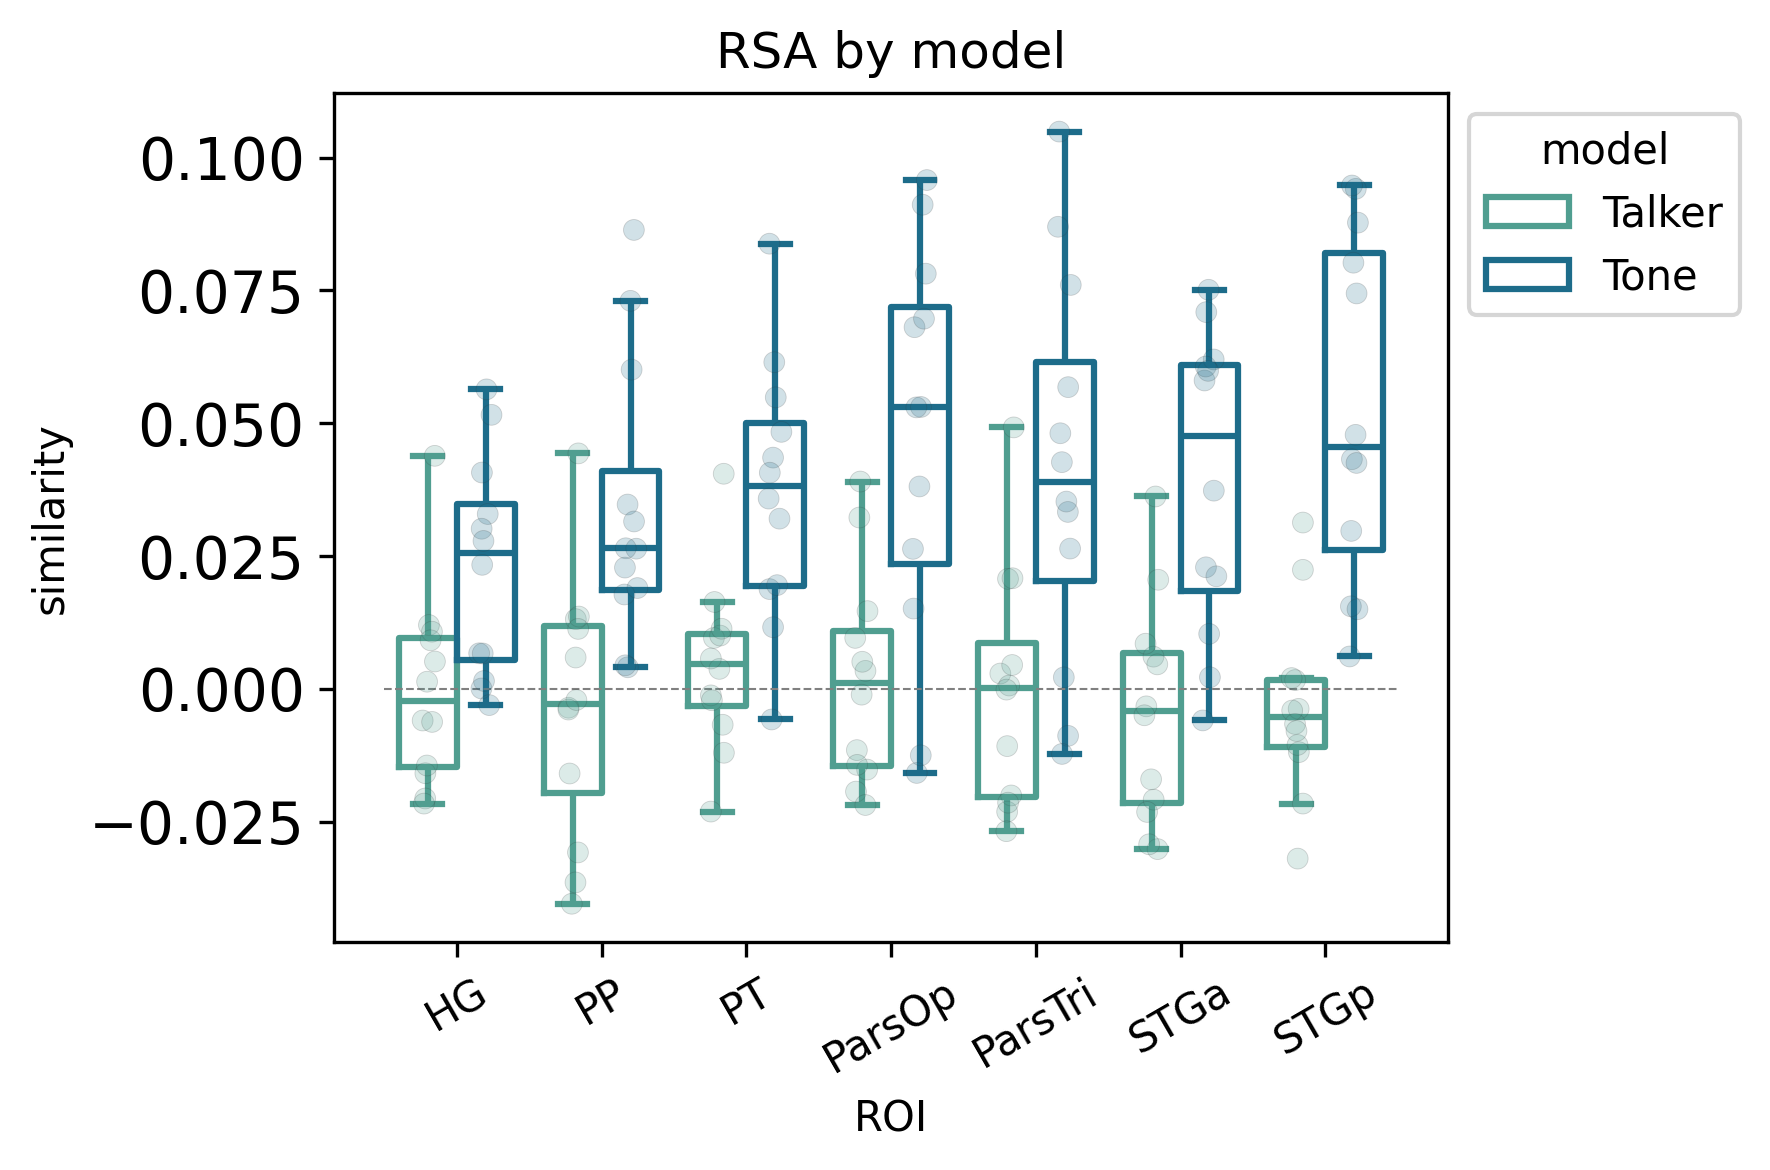

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=300)

roi_df_collapsed = intermed_df.groupby(["participant_id", "ROI", 'model'], 
                                       as_index=False).agg({"similarity": "mean"})

sns.boxplot(data=roi_df_collapsed, 
              x='ROI', y='similarity', 
              hue='model',
              palette='crest',
              fliersize = 0,            
              linewidth=1.5,
              fill=False,
              #legend=None,
              ax=ax);
sns.stripplot(data=roi_df_collapsed, 
              x='ROI', y='similarity', 
              hue='model',
              palette='crest',
              dodge=True,
              linewidth=0.2,
              alpha=.2,
              legend=None,
              ax=ax);


xmin, xmax = ax.get_xlim()
ax.hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='--', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title(f'RSA by model');
#ax.set_ylim([-5, 5])

fig.tight_layout()


/scratch/slurm-5635041/ipykernel_34128/2114364764.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')


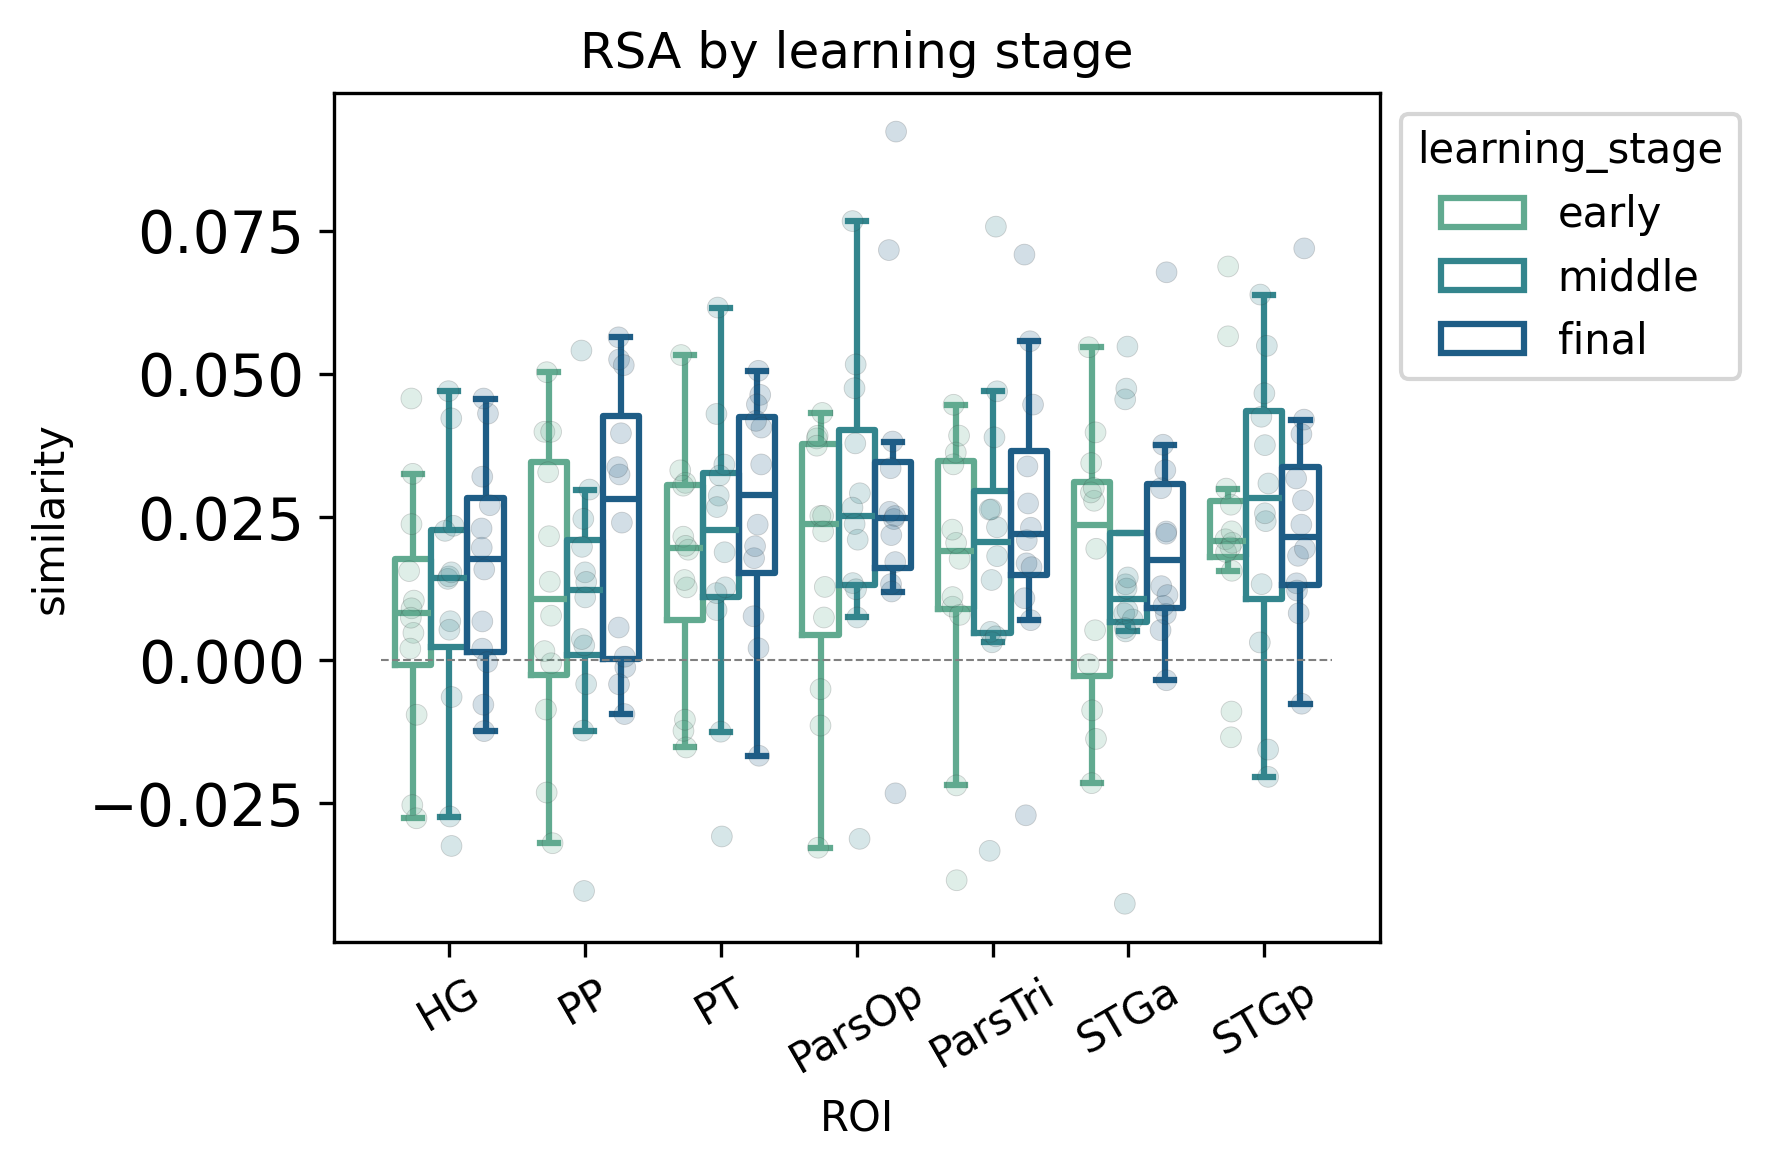

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=300)

roi_df_collapsed = intermed_df.groupby(["participant_id", "ROI", 'learning_stage'], 
                                       as_index=False).agg({"similarity": "mean"})

sns.boxplot(data=roi_df_collapsed, 
              x='ROI', y='similarity', 
              hue='learning_stage', hue_order=['early', 'middle', 'final'],
              palette='crest',
              fliersize = 0,            
              linewidth=1.5,
              fill=False,
              #legend=None,
              ax=ax);
sns.stripplot(data=roi_df_collapsed, 
              x='ROI', y='similarity', 
              hue='learning_stage', hue_order=['early', 'middle', 'final'],
              palette='crest',
              dodge=True,
              linewidth=0.2,
              alpha=.2,
              legend=None,
              ax=ax);


xmin, xmax = ax.get_xlim()
ax.hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='--', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title(f'RSA by learning stage');
#ax.set_ylim([-5, 5])

fig.tight_layout()


## ARCHIVE stats

#### By group, all runs

In [42]:
# Combining hemispheres
print('all runs')
#for group_id in np.unique(group_rdms.rdm_descriptors['group']):
group_id = 'non-Mandarin'

group_long_df = laterality_df.where(laterality_df.participant_group==group_id).dropna()

for model_id in ['Tone']: #model_names:
    print(f'\n{model_id}')
    model_df = group_long_df.where(group_long_df.model==model_id).dropna()

    roi_list = []
    p_vals = []
    t_stats = []

    for roi in np.unique(model_df.ROI): # roi_list_ordered: # np.unique(group_rdms.rdm_descriptors['ROI']):
        #print(roi)
        groi_data = model_df.where(model_df.ROI==roi).dropna()['corr']
        res = stats.ttest_1samp(groi_data, popmean=0)

        p_vals.append(res.pvalue)
        t_stats.append(res.statistic)
        roi_list.append(roi)
        #print(res.pvalue)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(roi_list):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')


all runs

Tone
**t = 3.46 FDR-corr p = 0.0010 uncorr p = 0.0010 region = HG
**t = 5.03 FDR-corr p = 0.0000 uncorr p = 0.0000 region = PP
**t = 6.19 FDR-corr p = 0.0000 uncorr p = 0.0000 region = PT
**t = 6.04 FDR-corr p = 0.0000 uncorr p = 0.0000 region = ParsOp
**t = 5.53 FDR-corr p = 0.0000 uncorr p = 0.0000 region = ParsTri
**t = 5.31 FDR-corr p = 0.0000 uncorr p = 0.0000 region = STGa
**t = 7.57 FDR-corr p = 0.0000 uncorr p = 0.0000 region = STGp


In [43]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
res_df = pd.DataFrame(columns=['Region of interest', 't-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)
res_df['Region of interest'] = roi_list

res_df

Region of interest  t-statistic  p-value
0                 HG        3.465    0.001
1                 PP        5.032    0.000
2                 PT        6.186    0.000
3             ParsOp        6.038    0.000
4            ParsTri        5.526    0.000
5               STGa        5.308    0.000
6               STGp        7.571    0.000

In [44]:
# Combining subdivisions
print('all runs')
group_id = 'non-Mandarin'

group_long_df = laterality_df.where(laterality_df.participant_group==group_id).dropna()

for model_id in model_names:
    print(f'\n{model_id}')
    model_df = group_long_df.where(group_long_df.model==model_id).dropna()

    roi_list = []
    p_vals = []
    t_stats = []

    groi_data = model_df.dropna()['corr']
    res = stats.ttest_1samp(groi_data, popmean=0)

    p_vals.append(res.pvalue)
    t_stats.append(res.statistic)
    roi_list.append(roi)
    #print(res.pvalue)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(roi_list):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.20f}',
              f'uncorr p = {p_vals[rx]:.06f}, all cortical regions')


all runs

Tone
**t = 14.64 FDR-corr p = 0.00000000000000000000 uncorr p = 0.000000, all cortical regions

Talker
  t = 0.42 FDR-corr p = 0.67789706995132725798 uncorr p = 0.677897, all cortical regions


In [45]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
res_df = pd.DataFrame(columns=['t-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)

res_df

t-statistic  p-value
0        0.416    0.678

In [46]:
print('all runs')
#for group_id in np.unique(group_rdms.rdm_descriptors['group']):

group_long_df = model_long_df.where(model_long_df.participant_group==group_id)

for model_id in model_names:
    print(f'\n{model_id}')
    model_df = group_long_df.where(group_long_df.model==model_id)

    roi_list = []
    p_vals = []
    t_stats = []

    for roi in roi_list_ordered: #np.unique(group_rdms.rdm_descriptors['ROI']):
        if 'GP' not in roi:
            groi_data = model_df.where(model_df.ROI==roi).dropna()['corr']
            res = stats.ttest_1samp(groi_data, popmean=0)

            p_vals.append(res.pvalue)
            t_stats.append(res.statistic)
            roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(roi_list):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')


all runs

Tone
**t = 2.75 FDR-corr p = 0.0109 uncorr p = 0.0101 region = L-HG
**t = 4.05 FDR-corr p = 0.0007 uncorr p = 0.0003 region = L-PT
**t = 3.53 FDR-corr p = 0.0019 uncorr p = 0.0014 region = L-PP
**t = 5.39 FDR-corr p = 0.0001 uncorr p = 0.0000 region = L-STGp
**t = 3.35 FDR-corr p = 0.0026 uncorr p = 0.0023 region = L-STGa
**t = 4.58 FDR-corr p = 0.0003 uncorr p = 0.0001 region = L-ParsOp
**t = 4.40 FDR-corr p = 0.0004 uncorr p = 0.0001 region = L-ParsTri
**t = 2.13 FDR-corr p = 0.0419 uncorr p = 0.0419 region = R-HG
**t = 4.66 FDR-corr p = 0.0003 uncorr p = 0.0001 region = R-PT
**t = 3.60 FDR-corr p = 0.0018 uncorr p = 0.0012 region = R-PP
**t = 5.25 FDR-corr p = 0.0001 uncorr p = 0.0000 region = R-STGp
**t = 4.19 FDR-corr p = 0.0006 uncorr p = 0.0002 region = R-STGa
**t = 3.98 FDR-corr p = 0.0007 uncorr p = 0.0004 region = R-ParsOp
**t = 3.40 FDR-corr p = 0.0025 uncorr p = 0.0020 region = R-ParsTri

Talker
  t = -0.04 FDR-corr p = 0.9652 uncorr p = 0.9652 region = L-HG
  t =

In [47]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
res_df = pd.DataFrame(columns=['Region of interest', 't-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)
res_df['Region of interest'] = roi_list

res_df

Region of interest  t-statistic  p-value
0                L-HG       -0.044    0.965
1                L-PT        0.700    0.965
2                L-PP       -0.179    0.965
3              L-STGp       -0.092    0.965
4              L-STGa       -0.799    0.965
5            L-ParsOp        0.434    0.965
6           L-ParsTri        0.186    0.965
7                R-HG        0.189    0.965
8                R-PT        0.579    0.965
9                R-PP       -0.046    0.965
10             R-STGp       -0.429    0.965
11             R-STGa        0.301    0.965
12           R-ParsOp        0.490    0.965
13          R-ParsTri        0.169    0.965

#### By group, separate stages

In [48]:
group_id = 'non-Mandarin'
group_long_df = model_long_df.where(model_long_df.participant_group==group_id)

for model_id in model_names:
    print(f'\n{model_id}')
    for runcombo in ['early','middle', 'final']:
        rc_df = group_long_df.where(group_long_df.stage==runcombo).where(group_long_df.model==model_id)
        print(f'\n{runcombo} runs')

        roi_list = []
        p_vals = []
        t_stats = []

        for roi in roi_list_ordered: #np.unique(group_rdms.rdm_descriptors['ROI']):
            if 'GP' not in roi:
                groi_data = rc_df.where(rc_df.ROI==roi).dropna()['corr']
                res = stats.ttest_1samp(groi_data, popmean=0)

                p_vals.append(res.pvalue)
                t_stats.append(res.statistic)
                roi_list.append(roi)
        p_vals_adj = stats.false_discovery_control(p_vals)

        for rx, roi in enumerate(roi_list):
            if p_vals_adj[rx] < 0.05:
                ast = '**'
            elif p_vals[rx] < 0.05:
                ast = ' *'
            else:
                ast = '  '
            print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



Tone

early runs
  t = 0.92 FDR-corr p = 0.4130 uncorr p = 0.3835 region = L-HG
  t = 1.13 FDR-corr p = 0.3367 uncorr p = 0.2858 region = L-PT
  t = 1.45 FDR-corr p = 0.3027 uncorr p = 0.1820 region = L-PP
  t = 2.19 FDR-corr p = 0.3027 uncorr p = 0.0563 region = L-STGp
  t = 1.40 FDR-corr p = 0.3027 uncorr p = 0.1946 region = L-STGa
  t = 1.44 FDR-corr p = 0.3027 uncorr p = 0.1846 region = L-ParsOp
  t = 1.95 FDR-corr p = 0.3027 uncorr p = 0.0828 region = L-ParsTri
  t = -0.62 FDR-corr p = 0.5479 uncorr p = 0.5479 region = R-HG
  t = 1.55 FDR-corr p = 0.3027 uncorr p = 0.1561 region = R-PT
  t = 1.13 FDR-corr p = 0.3367 uncorr p = 0.2886 region = R-PP
  t = 1.79 FDR-corr p = 0.3027 uncorr p = 0.1072 region = R-STGp
  t = 1.91 FDR-corr p = 0.3027 uncorr p = 0.0888 region = R-STGa
  t = 1.69 FDR-corr p = 0.3027 uncorr p = 0.1246 region = R-ParsOp
  t = 1.22 FDR-corr p = 0.3367 uncorr p = 0.2519 region = R-ParsTri

middle runs
  t = 2.22 FDR-corr p = 0.0828 uncorr p = 0.0533 region = L-

In [49]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
res_df = pd.DataFrame(columns=['Region of interest', 't-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)
res_df['Region of interest'] = np.unique(roi_df_long.region)

res_df

NameError: name 'roi_df_long' is not defined

In [50]:
group_id = 'non-Mandarin'
group_long_df = laterality_df.where(laterality_df.participant_group==group_id)

for model_id in model_names:
    print(f'\n{model_id}')
    for runcombo in ['early','middle','final']:
        rc_df = group_long_df.where(group_long_df.stage==runcombo).where(group_long_df.model==model_id).dropna()
        print(f'\n{runcombo} runs')

        roi_list = []
        p_vals = []
        t_stats = []

        for roi in np.unique(rc_df.ROI): # roi_list_ordered: #np.unique(group_rdms.rdm_descriptors['ROI']):
            groi_data = rc_df.where(rc_df.ROI==roi).dropna()['corr']
            res = stats.ttest_1samp(groi_data, popmean=0)

            p_vals.append(res.pvalue)
            t_stats.append(res.statistic)
            roi_list.append(roi)
        p_vals_adj = stats.false_discovery_control(p_vals)

        for rx, roi in enumerate(roi_list):
            if p_vals_adj[rx] < 0.05:
                ast = '**'
            elif p_vals[rx] < 0.05:
                ast = ' *'
            else:
                ast = '  '
            print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



Tone

early runs
  t = 0.23 FDR-corr p = 0.8218 uncorr p = 0.8218 region = HG
  t = 1.78 FDR-corr p = 0.1054 uncorr p = 0.0903 region = PP
  t = 1.92 FDR-corr p = 0.0988 uncorr p = 0.0705 region = PT
 *t = 2.26 FDR-corr p = 0.0630 uncorr p = 0.0360 region = ParsOp
 *t = 2.31 FDR-corr p = 0.0630 uncorr p = 0.0325 region = ParsTri
 *t = 2.29 FDR-corr p = 0.0630 uncorr p = 0.0333 region = STGa
 *t = 2.88 FDR-corr p = 0.0630 uncorr p = 0.0095 region = STGp

middle runs
**t = 2.77 FDR-corr p = 0.0123 uncorr p = 0.0123 region = HG
**t = 4.21 FDR-corr p = 0.0011 uncorr p = 0.0005 region = PP
**t = 4.72 FDR-corr p = 0.0005 uncorr p = 0.0002 region = PT
**t = 4.09 FDR-corr p = 0.0011 uncorr p = 0.0006 region = ParsOp
**t = 3.37 FDR-corr p = 0.0038 uncorr p = 0.0033 region = ParsTri
**t = 3.50 FDR-corr p = 0.0034 uncorr p = 0.0024 region = STGa
**t = 5.97 FDR-corr p = 0.0001 uncorr p = 0.0000 region = STGp

final runs
**t = 2.94 FDR-corr p = 0.0085 uncorr p = 0.0085 region = HG
**t = 3.11 FDR-c

In [51]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
res_df = pd.DataFrame(columns=['Region of interest', 't-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)
res_df['Region of interest'] = np.unique(rc_df.ROI)

res_df

Region of interest  t-statistic  p-value
0                 HG        0.771    0.928
1                 PP        0.734    0.928
2                 PT        1.421    0.928
3             ParsOp       -0.343    0.928
4            ParsTri        0.001    0.999
5               STGa        0.263    0.928
6               STGp       -0.395    0.928

In [79]:
# Combining subdivisions, early vs. late runs
group_id = 'non-Mandarin'
print(f'\nearly vs. 0 ')

group_long_df = laterality_df.where(laterality_df.participant_group==group_id)

for model_id in model_names:
    print(f'\n{model_id}')
    roi_list = []
    p_vals = []
    t_stats = []

    early_df = group_long_df.where(group_long_df.stage=='early').where(group_long_df.model==model_id).dropna()

    early_data = early_df['corr']

    res = stats.ttest_1samp(early_data, popmean=0)

    p_vals.append(res.pvalue)
    t_stats.append(res.statistic)
    roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(roi_list):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f}, all cortical regions')



early vs. 0 

Tone
**t = 5.35 FDR-corr p = 0.0000 uncorr p = 0.0000, all cortical regions

Talker
  t = 0.73 FDR-corr p = 0.4667 uncorr p = 0.4667, all cortical regions


In [80]:
# Combining subdivisions, early vs. late runs
group_id = 'non-Mandarin'
print(f'\nfinal vs. 0 ')

group_long_df = laterality_df.where(laterality_df.participant_group==group_id)

for model_id in model_names:
    print(f'\n{model_id}')
    roi_list = []
    p_vals = []
    t_stats = []

    final_df = group_long_df.where(group_long_df.stage=='final').where(group_long_df.model==model_id).dropna()

    final_data = final_df['corr']

    res = stats.ttest_1samp(final_data, popmean=0)

    p_vals.append(res.pvalue)
    t_stats.append(res.statistic)
    roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(roi_list):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f}, all cortical regions')



final vs. 0 

Tone
**t = 9.94 FDR-corr p = 0.0000 uncorr p = 0.0000, all cortical regions

Talker
  t = 1.15 FDR-corr p = 0.2528 uncorr p = 0.2528, all cortical regions


#### By group, early vs. late stages

In [52]:
# Combining subdivisions, early vs. late runs
group_id = 'non-Mandarin'
print(f'\nearly vs. late runs')

group_long_df = laterality_df.where(laterality_df.participant_group==group_id)

for model_id in model_names:
    print(f'\n{model_id}')
    roi_list = []
    p_vals = []
    t_stats = []

    early_df = group_long_df.where(group_long_df.stage=='early').where(group_long_df.model==model_id).dropna()
    final_df = group_long_df.where(group_long_df.stage=='final').where(group_long_df.model==model_id).dropna()


    early_data = early_df['corr']
    final_data = final_df['corr']

    res = stats.ttest_rel(final_data, early_data)

    p_vals.append(res.pvalue)
    t_stats.append(res.statistic)
    roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(roi_list):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f}, all cortical regions')



early vs. late runs

Tone
**t = 3.84 FDR-corr p = 0.0002 uncorr p = 0.0002, all cortical regions

Talker
  t = 0.39 FDR-corr p = 0.7005 uncorr p = 0.7005, all cortical regions


In [53]:
# Combining subdivisions, early vs. middle runs
group_id = 'non-Mandarin'
print(f'\nearly vs. middle runs')

group_long_df = laterality_df.where(laterality_df.participant_group==group_id)

for model_id in model_names:
    print(f'\n{model_id}')
    roi_list = []
    p_vals = []
    t_stats = []

    early_df = group_long_df.where(group_long_df.stage=='early').where(group_long_df.model==model_id).dropna()
    final_df = group_long_df.where(group_long_df.stage=='middle').where(group_long_df.model==model_id).dropna()


    early_data = early_df['corr']
    final_data = final_df['corr']

    res = stats.ttest_rel(final_data, early_data)

    p_vals.append(res.pvalue)
    t_stats.append(res.statistic)
    roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(roi_list):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f}, all cortical regions')



early vs. middle runs

Tone
**t = 4.37 FDR-corr p = 0.0000 uncorr p = 0.0000, all cortical regions

Talker
  t = -1.17 FDR-corr p = 0.2441 uncorr p = 0.2441, all cortical regions


In [54]:
# Combining subdivisions, early vs. middle runs
group_id = 'non-Mandarin'
print(f'\nmiddle vs. final runs')

group_long_df = laterality_df.where(laterality_df.participant_group==group_id)

for model_id in model_names:
    print(f'\n{model_id}')
    roi_list = []
    p_vals = []
    t_stats = []

    early_df = group_long_df.where(group_long_df.stage=='middle').where(group_long_df.model==model_id).dropna()
    final_df = group_long_df.where(group_long_df.stage=='final').where(group_long_df.model==model_id).dropna()


    early_data = early_df['corr']
    final_data = final_df['corr']

    res = stats.ttest_rel(final_data, early_data)

    p_vals.append(res.pvalue)
    t_stats.append(res.statistic)
    roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(roi_list):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f}, all cortical regions')



middle vs. final runs

Tone
  t = 0.27 FDR-corr p = 0.7872 uncorr p = 0.7872, all cortical regions

Talker
  t = 1.24 FDR-corr p = 0.2166 uncorr p = 0.2166, all cortical regions


In [55]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
res_df = pd.DataFrame(columns=['Region of interest', 't-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)
res_df['Region of interest'] = np.unique(roi_df_long.region)

res_df

NameError: name 'roi_df_long' is not defined

In [56]:
# early vs. late runs
print(f'\nearly vs. late runs')

group_long_df = laterality_df.where(laterality_df.participant_group==group_id).dropna()

for model_id in model_names:
    print(f'\n{model_id}')
    roi_list = []
    p_vals = []
    t_stats = []

    early_df = group_long_df.where(group_long_df.stage=='early').where(group_long_df.model==model_id).dropna()
    final_df = group_long_df.where(group_long_df.stage=='final').where(group_long_df.model==model_id).dropna()


    for roi in np.unique(group_long_df.ROI):
        early_data = early_df.where(early_df.ROI==roi).dropna()['corr']
        final_data = final_df.where(final_df.ROI==roi).dropna()['corr']

        res = stats.ttest_rel(final_data, early_data)

        p_vals.append(res.pvalue)
        t_stats.append(res.statistic)
        roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(np.unique(group_long_df.ROI)):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



early vs. late runs

Tone
  t = 1.67 FDR-corr p = 0.2617 uncorr p = 0.1122 region = HG
  t = 1.05 FDR-corr p = 0.3562 uncorr p = 0.3053 region = PP
  t = 1.89 FDR-corr p = 0.2583 uncorr p = 0.0738 region = PT
 *t = 2.37 FDR-corr p = 0.1997 uncorr p = 0.0285 region = ParsOp
  t = 1.17 FDR-corr p = 0.3562 uncorr p = 0.2577 region = ParsTri
  t = 0.90 FDR-corr p = 0.3817 uncorr p = 0.3817 region = STGa
  t = 1.15 FDR-corr p = 0.3562 uncorr p = 0.2642 region = STGp

Talker
  t = 0.38 FDR-corr p = 0.8584 uncorr p = 0.7050 region = HG
  t = 0.67 FDR-corr p = 0.8584 uncorr p = 0.5124 region = PP
  t = 0.70 FDR-corr p = 0.8584 uncorr p = 0.4903 region = PT
  t = -0.72 FDR-corr p = 0.8584 uncorr p = 0.4823 region = ParsOp
  t = 0.34 FDR-corr p = 0.8584 uncorr p = 0.7358 region = ParsTri
  t = -0.13 FDR-corr p = 0.8985 uncorr p = 0.8985 region = STGa
  t = -0.88 FDR-corr p = 0.8584 uncorr p = 0.3901 region = STGp


In [57]:
# early vs. middle runs
print(f'\nearly vs. middle runs')

group_long_df = laterality_df.where(laterality_df.participant_group==group_id).dropna()

for model_id in model_names:
    print(f'\n{model_id}')
    roi_list = []
    p_vals = []
    t_stats = []

    early_df = group_long_df.where(group_long_df.stage=='early').where(group_long_df.model==model_id).dropna()
    final_df = group_long_df.where(group_long_df.stage=='middle').where(group_long_df.model==model_id).dropna()


    for roi in np.unique(group_long_df.ROI):
        early_data = early_df.where(early_df.ROI==roi).dropna()['corr']
        final_data = final_df.where(final_df.ROI==roi).dropna()['corr']

        res = stats.ttest_rel(final_data, early_data)

        p_vals.append(res.pvalue)
        t_stats.append(res.statistic)
        roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(np.unique(group_long_df.ROI)):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



early vs. middle runs

Tone
 *t = 2.24 FDR-corr p = 0.0874 uncorr p = 0.0375 region = HG
  t = 1.18 FDR-corr p = 0.2934 uncorr p = 0.2515 region = PP
 *t = 2.24 FDR-corr p = 0.0874 uncorr p = 0.0375 region = PT
  t = 1.41 FDR-corr p = 0.2438 uncorr p = 0.1742 region = ParsOp
  t = 0.43 FDR-corr p = 0.6717 uncorr p = 0.6717 region = ParsTri
  t = 1.58 FDR-corr p = 0.2304 uncorr p = 0.1317 region = STGa
 *t = 2.99 FDR-corr p = 0.0522 uncorr p = 0.0075 region = STGp

Talker
  t = -1.03 FDR-corr p = 0.6613 uncorr p = 0.3156 region = HG
  t = -0.58 FDR-corr p = 0.6613 uncorr p = 0.5668 region = PP
  t = -0.62 FDR-corr p = 0.6613 uncorr p = 0.5442 region = PT
  t = 0.39 FDR-corr p = 0.6990 uncorr p = 0.6990 region = ParsOp
  t = 0.77 FDR-corr p = 0.6613 uncorr p = 0.4505 region = ParsTri
  t = -1.09 FDR-corr p = 0.6613 uncorr p = 0.2900 region = STGa
  t = -0.81 FDR-corr p = 0.6613 uncorr p = 0.4303 region = STGp


In [58]:
# middle vs. late runs
print(f'\nmiddle vs. late runs')

group_long_df = laterality_df.where(laterality_df.participant_group==group_id).dropna()

for model_id in model_names:
    print(f'\n{model_id}')
    roi_list = []
    p_vals = []
    t_stats = []

    early_df = group_long_df.where(group_long_df.stage=='middle').where(group_long_df.model==model_id).dropna()
    final_df = group_long_df.where(group_long_df.stage=='final').where(group_long_df.model==model_id).dropna()


    for roi in np.unique(group_long_df.ROI):
        early_data = early_df.where(early_df.ROI==roi).dropna()['corr']
        final_data = final_df.where(final_df.ROI==roi).dropna()['corr']

        res = stats.ttest_rel(final_data, early_data)

        p_vals.append(res.pvalue)
        t_stats.append(res.statistic)
        roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(np.unique(group_long_df.ROI)):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



middle vs. late runs

Tone
  t = -0.34 FDR-corr p = 0.9165 uncorr p = 0.7403 region = HG
  t = 0.25 FDR-corr p = 0.9165 uncorr p = 0.8071 region = PP
  t = 0.11 FDR-corr p = 0.9165 uncorr p = 0.9165 region = PT
  t = 1.12 FDR-corr p = 0.9165 uncorr p = 0.2771 region = ParsOp
  t = 0.89 FDR-corr p = 0.9165 uncorr p = 0.3850 region = ParsTri
  t = -0.51 FDR-corr p = 0.9165 uncorr p = 0.6138 region = STGa
  t = -0.80 FDR-corr p = 0.9165 uncorr p = 0.4312 region = STGp

Talker
  t = 0.98 FDR-corr p = 0.5899 uncorr p = 0.3391 region = HG
  t = 0.97 FDR-corr p = 0.5899 uncorr p = 0.3458 region = PP
  t = 0.92 FDR-corr p = 0.5899 uncorr p = 0.3702 region = PT
  t = -0.82 FDR-corr p = 0.5899 uncorr p = 0.4213 region = ParsOp
  t = -0.53 FDR-corr p = 0.7060 uncorr p = 0.6052 region = ParsTri
  t = 0.84 FDR-corr p = 0.5899 uncorr p = 0.4088 region = STGa
  t = 0.29 FDR-corr p = 0.7726 uncorr p = 0.7726 region = STGp


In [59]:
# early vs. late runs
print(f'\nearly vs. late runs')

group_long_df = intermed_df.where(laterality_df.participant_group==group_id).dropna()

for model_id in model_names:
    print(f'\n{model_id}')
    roi_list = []
    p_vals = []
    t_stats = []

    early_df = group_long_df.where(group_long_df.stage=='early').where(group_long_df.model==model_id).dropna()
    final_df = group_long_df.where(group_long_df.stage=='final').where(group_long_df.model==model_id).dropna()


    for roi in np.unique(group_long_df.intermediate):
        early_data = early_df.where(early_df.intermediate==roi).dropna()['corr']
        final_data = final_df.where(final_df.intermediate==roi).dropna()['corr']

        res = stats.ttest_rel(final_data, early_data)

        p_vals.append(res.pvalue)
        t_stats.append(res.statistic)
        roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(roi_list):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



early vs. late runs

Tone
**t = 2.66 FDR-corr p = 0.0255 uncorr p = 0.0100 region = ACtx
**t = 2.49 FDR-corr p = 0.0255 uncorr p = 0.0170 region = IFG
  t = 1.46 FDR-corr p = 0.1524 uncorr p = 0.1524 region = STG

Talker
  t = 1.04 FDR-corr p = 0.7729 uncorr p = 0.3026 region = ACtx
  t = -0.23 FDR-corr p = 0.8192 uncorr p = 0.8192 region = IFG
  t = -0.66 FDR-corr p = 0.7729 uncorr p = 0.5153 region = STG


In [60]:
# early vs. middle runs
print(f'\nearly vs. middle runs')

group_long_df = intermed_df.where(laterality_df.participant_group==group_id).dropna()

for model_id in model_names:
    print(f'\n{model_id}')
    roi_list = []
    p_vals = []
    t_stats = []

    early_df = group_long_df.where(group_long_df.stage=='early').where(group_long_df.model==model_id).dropna()
    final_df = group_long_df.where(group_long_df.stage=='middle').where(group_long_df.model==model_id).dropna()


    for roi in np.unique(group_long_df.intermediate):
        early_data = early_df.where(early_df.intermediate==roi).dropna()['corr']
        final_data = final_df.where(final_df.intermediate==roi).dropna()['corr']

        res = stats.ttest_rel(final_data, early_data)

        p_vals.append(res.pvalue)
        t_stats.append(res.statistic)
        roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(roi_list):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



early vs. middle runs

Tone
**t = 3.31 FDR-corr p = 0.0048 uncorr p = 0.0016 region = ACtx
  t = 1.24 FDR-corr p = 0.2225 uncorr p = 0.2225 region = IFG
**t = 3.00 FDR-corr p = 0.0071 uncorr p = 0.0047 region = STG

Talker
  t = -1.27 FDR-corr p = 0.3161 uncorr p = 0.2108 region = ACtx
  t = 0.81 FDR-corr p = 0.4224 uncorr p = 0.4224 region = IFG
  t = -1.34 FDR-corr p = 0.3161 uncorr p = 0.1866 region = STG


In [61]:
# middle vs. late runs
print(f'\nmiddle vs. late runs')

group_long_df = intermed_df.where(laterality_df.participant_group==group_id).dropna()

for model_id in model_names:
    print(f'\n{model_id}')
    roi_list = []
    p_vals = []
    t_stats = []

    early_df = group_long_df.where(group_long_df.stage=='middle').where(group_long_df.model==model_id).dropna()
    final_df = group_long_df.where(group_long_df.stage=='final').where(group_long_df.model==model_id).dropna()


    for roi in np.unique(group_long_df.intermediate):
        early_data = early_df.where(early_df.intermediate==roi).dropna()['corr']
        final_data = final_df.where(final_df.intermediate==roi).dropna()['corr']

        res = stats.ttest_rel(final_data, early_data)

        p_vals.append(res.pvalue)
        t_stats.append(res.statistic)
        roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(roi_list):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



middle vs. late runs

Tone
  t = -0.01 FDR-corr p = 0.9893 uncorr p = 0.9893 region = ACtx
  t = 1.45 FDR-corr p = 0.4685 uncorr p = 0.1562 region = IFG
  t = -0.92 FDR-corr p = 0.5439 uncorr p = 0.3626 region = STG

Talker
  t = 1.68 FDR-corr p = 0.2959 uncorr p = 0.0986 region = ACtx
  t = -0.97 FDR-corr p = 0.4256 uncorr p = 0.3359 region = IFG
  t = 0.81 FDR-corr p = 0.4256 uncorr p = 0.4256 region = STG


In [62]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(model_id)
res_df = pd.DataFrame(columns=['Region of interest', 't-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)
res_df['Region of interest'] = roi_list

res_df

Talker


Region of interest  t-statistic  p-value
0               ACtx        1.678    0.296
1                IFG       -0.974    0.426
2                STG        0.805    0.426

In [63]:
# early vs. late runs
print(f'\nearly vs. late runs')

group_long_df = model_long_df.where(model_long_df.participant_group==group_id)

for model_id in model_names:
    print(f'\n{model_id}')
    roi_list = []
    p_vals = []
    t_stats = []

    early_df = group_long_df.where(group_long_df.stage=='early').where(group_long_df.model==model_id)
    final_df = group_long_df.where(group_long_df.stage=='final').where(group_long_df.model==model_id)


    for roi in roi_list_ordered: #np.unique(group_rdms.rdm_descriptors['ROI']):
        early_data = early_df.where(early_df.ROI==roi).dropna()['corr']
        final_data = final_df.where(final_df.ROI==roi).dropna()['corr']

        res = stats.ttest_rel(final_data, early_data)

        p_vals.append(res.pvalue)
        t_stats.append(res.statistic)
        roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(roi_list):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



early vs. late runs

Tone
  t = 0.31 FDR-corr p = 0.8263 uncorr p = 0.7673 region = L-HG
  t = 1.25 FDR-corr p = 0.5660 uncorr p = 0.2426 region = L-PT
  t = 0.84 FDR-corr p = 0.6846 uncorr p = 0.4251 region = L-PP
  t = 0.84 FDR-corr p = 0.6846 uncorr p = 0.4222 region = L-STGp
  t = 0.70 FDR-corr p = 0.6846 uncorr p = 0.5026 region = L-STGa
  t = 1.44 FDR-corr p = 0.5660 uncorr p = 0.1844 region = L-ParsOp
  t = -0.04 FDR-corr p = 0.9699 uncorr p = 0.9699 region = L-ParsTri
  t = 2.11 FDR-corr p = 0.4704 uncorr p = 0.0643 region = R-HG
  t = 1.35 FDR-corr p = 0.5660 uncorr p = 0.2087 region = R-PT
  t = 0.64 FDR-corr p = 0.6846 uncorr p = 0.5379 region = R-PP
  t = 0.76 FDR-corr p = 0.6846 uncorr p = 0.4655 region = R-STGp
  t = 0.56 FDR-corr p = 0.6908 uncorr p = 0.5921 region = R-STGa
  t = 1.83 FDR-corr p = 0.4704 uncorr p = 0.1008 region = R-ParsOp
  t = 1.84 FDR-corr p = 0.4704 uncorr p = 0.0988 region = R-ParsTri

Talker
  t = 0.40 FDR-corr p = 0.9876 uncorr p = 0.6995 region 

In [64]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
res_df = pd.DataFrame(columns=['Region of interest', 't-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)
res_df['Region of interest'] = np.unique(roi_df_long.region)

res_df

NameError: name 'roi_df_long' is not defined

#### Tone vs. Talker - all runs

In [65]:
# Combining subdivisions, Tone vs. Talker models
print(f'\nTone vs. Talker models – all runs')

group_long_df = laterality_df.where(laterality_df.participant_group==group_id).dropna()

#for model_id in model_names:
#    print(f'\n{model_id}')
roi_list = []
p_vals = []
t_stats = []

tone_df = group_long_df.where(group_long_df.model=='Tone').dropna()
talker_df = group_long_df.where(group_long_df.model=='Talker').dropna()


for roi in np.unique(group_long_df.ROI): # roi_list_ordered: #np.unique(group_rdms.rdm_descriptors['ROI']):
    tone_data = tone_df.where(tone_df.ROI==roi).dropna()['corr'].dropna()
    talker_data = talker_df.where(talker_df.ROI==roi).dropna()['corr'].dropna()

    res = stats.ttest_rel(tone_data, talker_data)

    p_vals.append(res.pvalue)
    t_stats.append(res.statistic)
    roi_list.append(roi)
p_vals_adj = stats.false_discovery_control(p_vals)

for rx, roi in enumerate(roi_list):
    if p_vals_adj[rx] < 0.05:
        ast = '**'
    elif p_vals[rx] < 0.05:
        ast = ' *'
    else:
        ast = '  '
    print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



Tone vs. Talker models – all runs
  t = 1.77 FDR-corr p = 0.0815 uncorr p = 0.0815 region = HG
**t = 2.72 FDR-corr p = 0.0119 uncorr p = 0.0085 region = PP
**t = 2.60 FDR-corr p = 0.0138 uncorr p = 0.0118 region = PT
**t = 3.94 FDR-corr p = 0.0008 uncorr p = 0.0002 region = ParsOp
**t = 3.75 FDR-corr p = 0.0010 uncorr p = 0.0004 region = ParsTri
**t = 3.52 FDR-corr p = 0.0015 uncorr p = 0.0008 region = STGa
**t = 4.80 FDR-corr p = 0.0001 uncorr p = 0.0000 region = STGp


In [66]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
res_df = pd.DataFrame(columns=['Region of interest', 't-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)
res_df['Region of interest'] = roi_list

res_df

Region of interest  t-statistic  p-value
0                 HG        1.773    0.081
1                 PP        2.723    0.012
2                 PT        2.597    0.014
3             ParsOp        3.940    0.001
4            ParsTri        3.747    0.001
5               STGa        3.520    0.001
6               STGp        4.802    0.000

In [67]:
# Tone vs. Talker models
print(f'\nTone vs. Talker models – all runs')

group_long_df = model_long_df.where(model_long_df.participant_group==group_id)

#for model_id in model_names:
#    print(f'\n{model_id}')
roi_list = []
p_vals = []
t_stats = []

tone_df = group_long_df.where(group_long_df.model=='Tone')
talker_df = group_long_df.where(group_long_df.model=='Talker')


for roi in roi_list_ordered: #np.unique(group_rdms.rdm_descriptors['ROI']):
    tone_data = tone_df.where(tone_df.ROI==roi).dropna()['corr']
    talker_data = talker_df.where(talker_df.ROI==roi).dropna()['corr']

    res = stats.ttest_rel(tone_data, talker_data)

    p_vals.append(res.pvalue)
    t_stats.append(res.statistic)
    roi_list.append(roi)
p_vals_adj = stats.false_discovery_control(p_vals)

for rx, roi in enumerate(roi_list):
    if p_vals_adj[rx] < 0.05:
        ast = '**'
    elif p_vals[rx] < 0.05:
        ast = ' *'
    else:
        ast = '  '
    print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



Tone vs. Talker models – all runs
  t = 1.50 FDR-corr p = 0.1566 uncorr p = 0.1454 region = L-HG
  t = 1.64 FDR-corr p = 0.1308 uncorr p = 0.1121 region = L-PT
  t = 1.91 FDR-corr p = 0.0849 uncorr p = 0.0667 region = L-PP
**t = 3.41 FDR-corr p = 0.0144 uncorr p = 0.0019 region = L-STGp
**t = 2.67 FDR-corr p = 0.0331 uncorr p = 0.0122 region = L-STGa
**t = 2.97 FDR-corr p = 0.0208 uncorr p = 0.0059 region = L-ParsOp
**t = 3.23 FDR-corr p = 0.0144 uncorr p = 0.0031 region = L-ParsTri
  t = 1.01 FDR-corr p = 0.3227 uncorr p = 0.3227 region = R-HG
  t = 2.03 FDR-corr p = 0.0803 uncorr p = 0.0516 region = R-PT
  t = 1.93 FDR-corr p = 0.0849 uncorr p = 0.0630 region = R-PP
**t = 3.32 FDR-corr p = 0.0144 uncorr p = 0.0024 region = R-STGp
 *t = 2.26 FDR-corr p = 0.0625 uncorr p = 0.0313 region = R-STGa
**t = 2.61 FDR-corr p = 0.0331 uncorr p = 0.0142 region = R-ParsOp
 *t = 2.16 FDR-corr p = 0.0691 uncorr p = 0.0395 region = R-ParsTri


In [68]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
res_df = pd.DataFrame(columns=['Region of interest', 't-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)
res_df['Region of interest'] = np.unique(roi_df_long.region)

res_df

NameError: name 'roi_df_long' is not defined

In [69]:
# Combining subdivisions, Tone vs. Talker models
print(f'\nTone vs. Talker models – all runs')

group_long_df = laterality_df.where(laterality_df.participant_group==group_id)

#for model_id in model_names:
#    print(f'\n{model_id}')
roi_list = []
p_vals = []
t_stats = []

tone_df = group_long_df.where(group_long_df.model=='Tone')
talker_df = group_long_df.where(group_long_df.model=='Talker')

tone_data = tone_df.dropna()['corr']
talker_data = talker_df.dropna()['corr']

print(f'\nTone vs. Talker models – all runs')
res = stats.ttest_rel(tone_data, talker_data)

p_vals.append(res.pvalue)
t_stats.append(res.statistic)
roi_list.append(roi)
p_vals_adj = stats.false_discovery_control(p_vals)

for rx, roi in enumerate(roi_list):
    if p_vals_adj[rx] < 0.05:
        ast = '**'
    elif p_vals[rx] < 0.05:
        ast = ' *'
    else:
        ast = '  '
    print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f}, all cortical regions')

'''
#behav_df = group_long_df.where(group_long_df.model=='Behavior Model')
#behav_data = behav_df.dropna()['corr']

print(f'\nBehavior vs. Talker models – all runs')
res = stats.ttest_rel(behav_data, talker_data)

roi_list = []
p_vals = []
t_stats = []

p_vals.append(res.pvalue)
t_stats.append(res.statistic)
roi_list.append(roi)
p_vals_adj = stats.false_discovery_control(p_vals)

for rx, roi in enumerate(roi_list):
    if p_vals_adj[rx] < 0.05:
        ast = '**'
    elif p_vals[rx] < 0.05:
        ast = ' *'
    else:
        ast = '  '
    print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f}, all cortical regions')
'''


Tone vs. Talker models – all runs

Tone vs. Talker models – all runs
**t = 8.76 FDR-corr p = 0.0000 uncorr p = 0.0000, all cortical regions


"\n#behav_df = group_long_df.where(group_long_df.model=='Behavior Model')\n#behav_data = behav_df.dropna()['corr']\n\nprint(f'\nBehavior vs. Talker models – all runs')\nres = stats.ttest_rel(behav_data, talker_data)\n\nroi_list = []\np_vals = []\nt_stats = []\n\np_vals.append(res.pvalue)\nt_stats.append(res.statistic)\nroi_list.append(roi)\np_vals_adj = stats.false_discovery_control(p_vals)\n\nfor rx, roi in enumerate(roi_list):\n    if p_vals_adj[rx] < 0.05:\n        ast = '**'\n    elif p_vals[rx] < 0.05:\n        ast = ' *'\n    else:\n        ast = '  '\n    print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f}, all cortical regions')\n"

In [70]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
res_df = pd.DataFrame(columns=['Region of interest', 't-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)
res_df['Region of interest'] = np.unique(roi_df_long.region)

res_df

NameError: name 'roi_df_long' is not defined

#### Tone vs. Talker – final runs

In [71]:
# Tone vs. Talker models
print(f'\nTone vs. Talker models – final stage')

group_long_df = model_long_df.where(model_long_df.participant_group==group_id)

#for model_id in model_names:
#    print(f'\n{model_id}')
roi_list = []
p_vals = []
t_stats = []

tone_df = group_long_df.where(group_long_df.stage=='final').where(group_long_df.model=='Tone')
talker_df = group_long_df.where(group_long_df.stage=='final').where(group_long_df.model=='Talker')


for roi in roi_list_ordered: #np.unique(group_rdms.rdm_descriptors['ROI']):
    tone_data = tone_df.where(tone_df.ROI==roi).dropna()['corr']
    talker_data = talker_df.where(talker_df.ROI==roi).dropna()['corr']

    res = stats.ttest_rel(tone_data, talker_data)

    p_vals.append(res.pvalue)
    t_stats.append(res.statistic)
    roi_list.append(roi)
p_vals_adj = stats.false_discovery_control(p_vals)

for rx, roi in enumerate(roi_list):
    if p_vals_adj[rx] < 0.05:
        ast = '**'
    elif p_vals[rx] < 0.05:
        ast = ' *'
    else:
        ast = '  '
    print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



Tone vs. Talker models – final stage
  t = 0.32 FDR-corr p = 0.7589 uncorr p = 0.7589 region = L-HG
  t = 0.71 FDR-corr p = 0.5768 uncorr p = 0.4944 region = L-PT
  t = 1.36 FDR-corr p = 0.3639 uncorr p = 0.2079 region = L-PP
  t = 2.14 FDR-corr p = 0.1701 uncorr p = 0.0607 region = L-STGp
  t = 1.43 FDR-corr p = 0.3639 uncorr p = 0.1862 region = L-STGa
 *t = 2.65 FDR-corr p = 0.1515 uncorr p = 0.0263 region = L-ParsOp
 *t = 2.35 FDR-corr p = 0.1515 uncorr p = 0.0433 region = L-ParsTri
  t = 0.80 FDR-corr p = 0.5687 uncorr p = 0.4468 region = R-HG
  t = 1.09 FDR-corr p = 0.4741 uncorr p = 0.3048 region = R-PT
  t = 0.52 FDR-corr p = 0.6608 uncorr p = 0.6136 region = R-PP
 *t = 2.42 FDR-corr p = 0.1515 uncorr p = 0.0388 region = R-STGp
  t = 1.01 FDR-corr p = 0.4764 uncorr p = 0.3403 region = R-STGa
 *t = 2.42 FDR-corr p = 0.1515 uncorr p = 0.0387 region = R-ParsOp
  t = 1.76 FDR-corr p = 0.2618 uncorr p = 0.1122 region = R-ParsTri


In [72]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
res_df = pd.DataFrame(columns=['Region of interest', 't-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)
res_df['Region of interest'] = np.unique(roi_df_long.region)

res_df

NameError: name 'roi_df_long' is not defined

In [77]:
# Tone vs. Talker models
print(f'\nTone vs. Talker models – early stage')

group_long_df = laterality_df.where(laterality_df.participant_group==group_id)

#for model_id in model_names:
#    print(f'\n{model_id}')
roi_list = []
p_vals = []
t_stats = []

tone_df = group_long_df.where(group_long_df.stage=='early').where(group_long_df.model=='Tone')
talker_df = group_long_df.where(group_long_df.stage=='early').where(group_long_df.model=='Talker')


for roi in np.unique(laterality_df['ROI']):
    tone_data = tone_df.where(tone_df.ROI==roi).dropna()['corr']
    talker_data = talker_df.where(talker_df.ROI==roi).dropna()['corr']

    res = stats.ttest_rel(tone_data, talker_data)

    p_vals.append(res.pvalue)
    t_stats.append(res.statistic)
    roi_list.append(roi)
p_vals_adj = stats.false_discovery_control(p_vals)

for rx, roi in enumerate(roi_list):
    if p_vals_adj[rx] < 0.05:
        ast = '**'
    elif p_vals[rx] < 0.05:
        ast = ' *'
    else:
        ast = '  '
    print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



Tone vs. Talker models – early stage
  t = -0.16 FDR-corr p = 0.8775 uncorr p = 0.8775 region = HG
  t = 0.97 FDR-corr p = 0.4798 uncorr p = 0.3427 region = PP
  t = 0.61 FDR-corr p = 0.6375 uncorr p = 0.5465 region = PT
  t = 1.25 FDR-corr p = 0.4798 uncorr p = 0.2257 region = ParsOp
  t = 1.70 FDR-corr p = 0.4798 uncorr p = 0.1052 region = ParsTri
  t = 1.13 FDR-corr p = 0.4798 uncorr p = 0.2743 region = STGa
  t = 1.54 FDR-corr p = 0.4798 uncorr p = 0.1412 region = STGp


In [73]:
# Tone vs. Talker models
print(f'\nTone vs. Talker models – final stage')

group_long_df = laterality_df.where(laterality_df.participant_group==group_id)

#for model_id in model_names:
#    print(f'\n{model_id}')
roi_list = []
p_vals = []
t_stats = []

tone_df = group_long_df.where(group_long_df.stage=='final').where(group_long_df.model=='Tone')
talker_df = group_long_df.where(group_long_df.stage=='final').where(group_long_df.model=='Talker')


for roi in np.unique(laterality_df['ROI']):
    tone_data = tone_df.where(tone_df.ROI==roi).dropna()['corr']
    talker_data = talker_df.where(talker_df.ROI==roi).dropna()['corr']

    res = stats.ttest_rel(tone_data, talker_data)

    p_vals.append(res.pvalue)
    t_stats.append(res.statistic)
    roi_list.append(roi)
p_vals_adj = stats.false_discovery_control(p_vals)

for rx, roi in enumerate(roi_list):
    if p_vals_adj[rx] < 0.05:
        ast = '**'
    elif p_vals[rx] < 0.05:
        ast = ' *'
    else:
        ast = '  '
    print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



Tone vs. Talker models – final stage
  t = 0.83 FDR-corr p = 0.4177 uncorr p = 0.4177 region = HG
  t = 1.21 FDR-corr p = 0.2830 uncorr p = 0.2425 region = PP
  t = 1.31 FDR-corr p = 0.2830 uncorr p = 0.2061 region = PT
**t = 3.60 FDR-corr p = 0.0132 uncorr p = 0.0019 region = ParsOp
**t = 2.73 FDR-corr p = 0.0312 uncorr p = 0.0134 region = ParsTri
  t = 1.73 FDR-corr p = 0.1749 uncorr p = 0.1000 region = STGa
**t = 3.29 FDR-corr p = 0.0135 uncorr p = 0.0038 region = STGp


In [74]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
res_df = pd.DataFrame(columns=['Region of interest', 't-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)
res_df['Region of interest'] = np.unique(roi_df_long.region)

res_df

NameError: name 'roi_df_long' is not defined

In [75]:
# early vs. late runs
print(f'\nearly vs. late runs')

group_long_df = laterality_df.where(laterality_df.participant_group==group_id).dropna()

for model_id in model_names:
    print(f'\n{model_id}')
    roi_list = []
    p_vals = []
    t_stats = []

    early_df = group_long_df.where(group_long_df.stage=='early').where(group_long_df.model==model_id).dropna()
    final_df = group_long_df.where(group_long_df.stage=='final').where(group_long_df.model==model_id).dropna()


    for roi in np.unique(group_long_df.ROI): # roi_list_ordered: #np.unique(group_rdms.rdm_descriptors['ROI']):
        early_data = early_df.where(early_df.ROI==roi).dropna()['corr']
        final_data = final_df.where(final_df.ROI==roi).dropna()['corr']

        res = stats.ttest_rel(final_data, early_data)

        p_vals.append(res.pvalue)
        t_stats.append(res.statistic)
        roi_list.append(roi)
    p_vals_adj = stats.false_discovery_control(p_vals)

    for rx, roi in enumerate(roi_list):
        if p_vals_adj[rx] < 0.05:
            ast = '**'
        elif p_vals[rx] < 0.05:
            ast = ' *'
        else:
            ast = '  '
        print(f'{ast}t = {t_stats[rx]:.02f} FDR-corr p = {p_vals_adj[rx]:.04f} uncorr p = {p_vals[rx]:.04f} region = {roi}')



early vs. late runs

Tone
  t = 1.67 FDR-corr p = 0.2617 uncorr p = 0.1122 region = HG
  t = 1.05 FDR-corr p = 0.3562 uncorr p = 0.3053 region = PP
  t = 1.89 FDR-corr p = 0.2583 uncorr p = 0.0738 region = PT
 *t = 2.37 FDR-corr p = 0.1997 uncorr p = 0.0285 region = ParsOp
  t = 1.17 FDR-corr p = 0.3562 uncorr p = 0.2577 region = ParsTri
  t = 0.90 FDR-corr p = 0.3817 uncorr p = 0.3817 region = STGa
  t = 1.15 FDR-corr p = 0.3562 uncorr p = 0.2642 region = STGp

Talker
  t = 0.38 FDR-corr p = 0.8584 uncorr p = 0.7050 region = HG
  t = 0.67 FDR-corr p = 0.8584 uncorr p = 0.5124 region = PP
  t = 0.70 FDR-corr p = 0.8584 uncorr p = 0.4903 region = PT
  t = -0.72 FDR-corr p = 0.8584 uncorr p = 0.4823 region = ParsOp
  t = 0.34 FDR-corr p = 0.8584 uncorr p = 0.7358 region = ParsTri
  t = -0.13 FDR-corr p = 0.8985 uncorr p = 0.8985 region = STGa
  t = -0.88 FDR-corr p = 0.8584 uncorr p = 0.3901 region = STGp


In [76]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
res_df = pd.DataFrame(columns=['Region of interest', 't-statistic', 'p-value'])
res_df['t-statistic'] = t_stats
res_df['p-value'] = p_vals_adj
#res_df['p-value (FDR-corrected)'].map('{:,.2f}'.format)
res_df['Region of interest'] = np.unique(roi_df_long.region)

res_df

NameError: name 'roi_df_long' is not defined

### plots

#### By group, all runs

/scratch/slurm-3440091/ipykernel_50316/727507008.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');


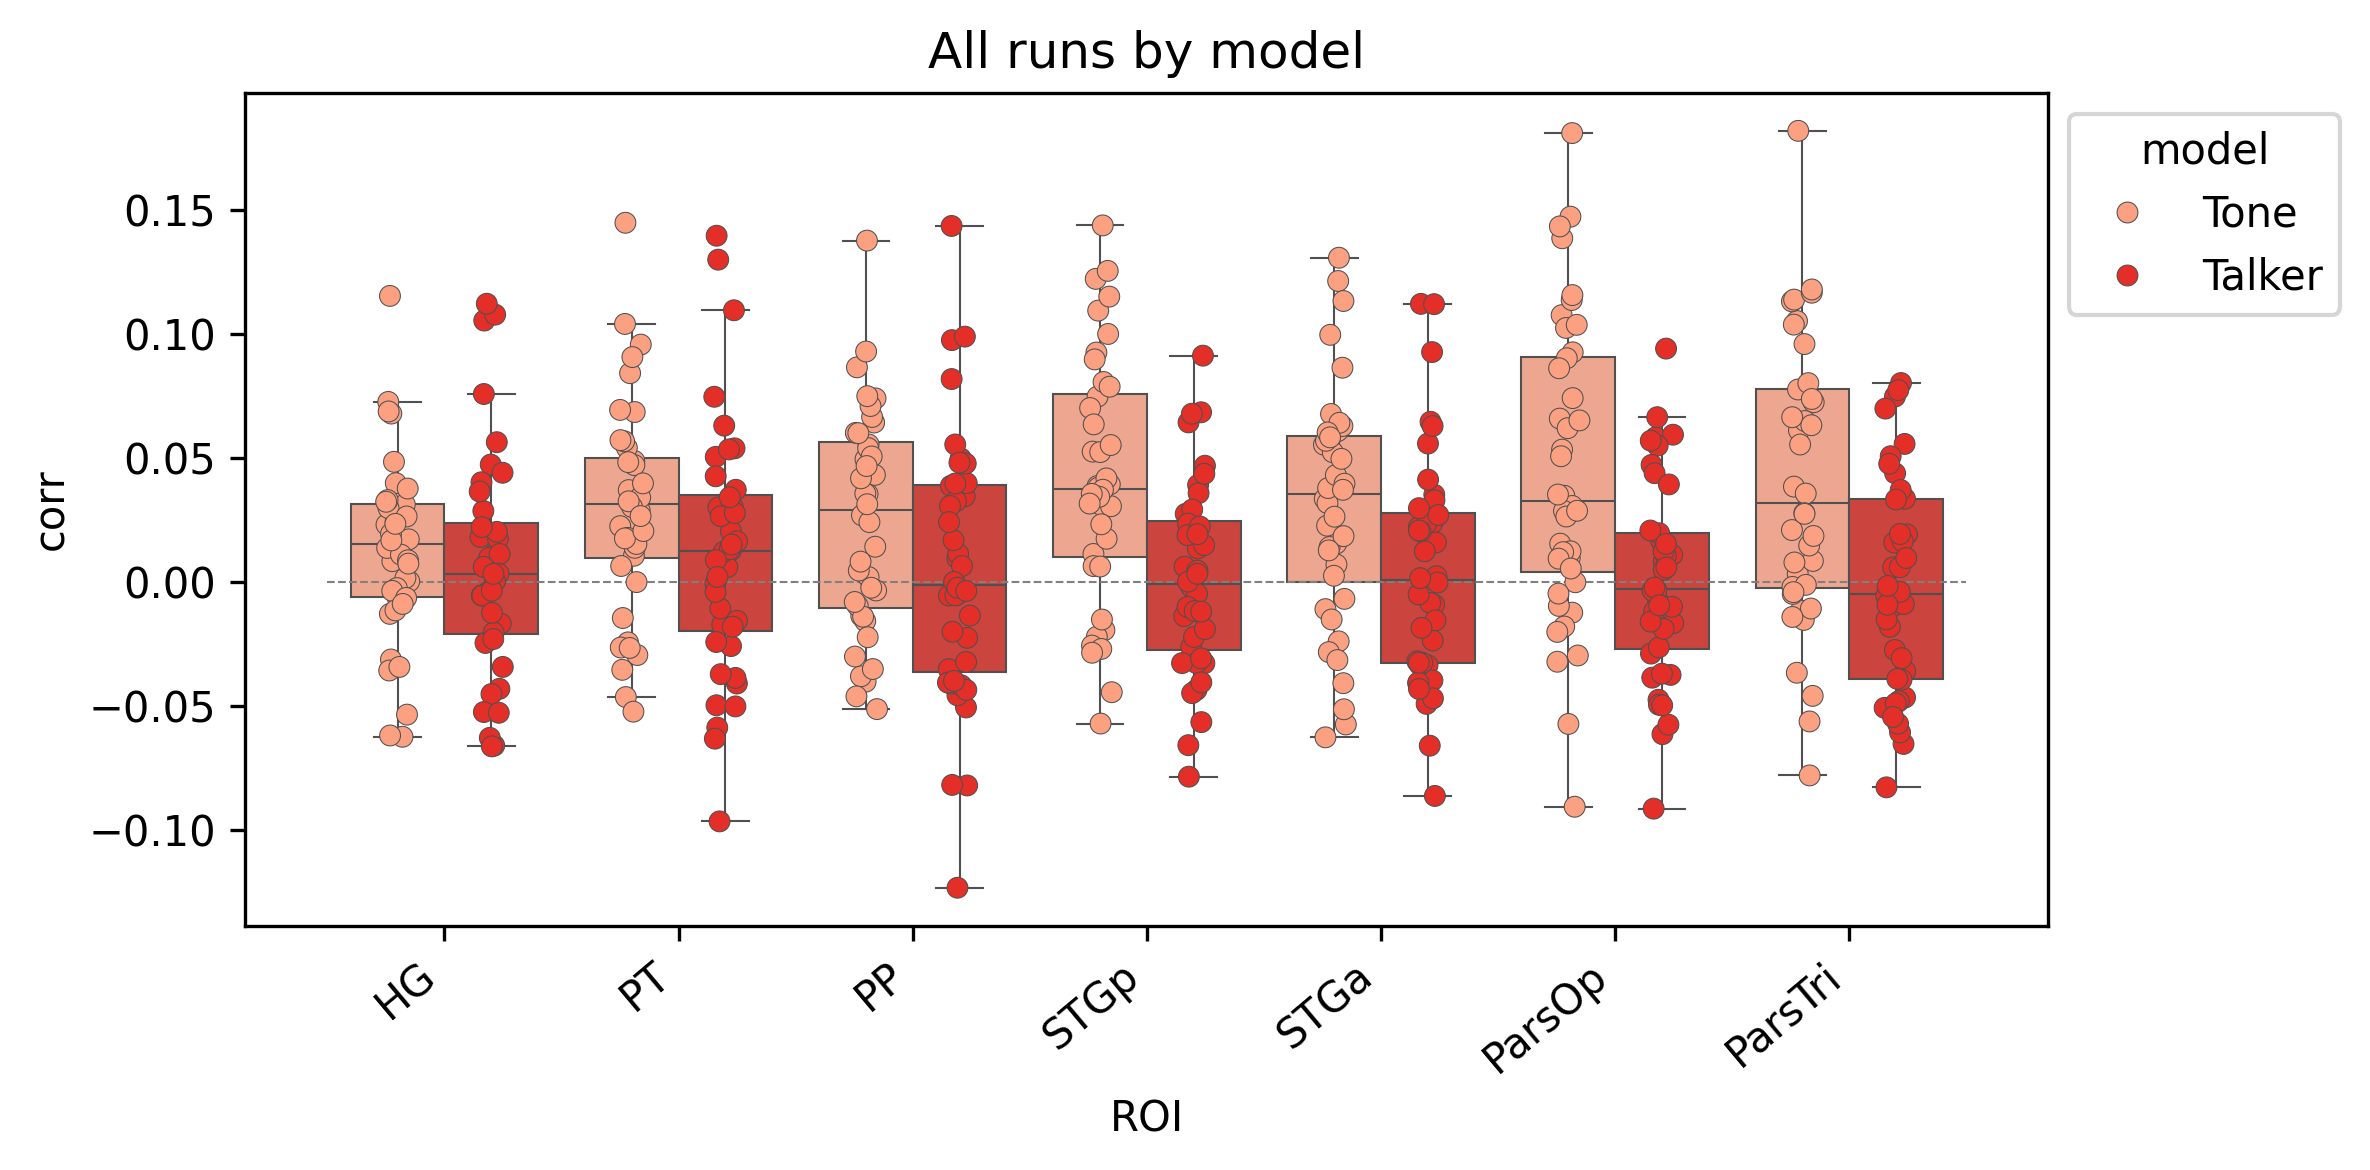

In [54]:
# combine hemispheres

fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=300, sharey=True) # sharex=True, 
#ax = ax.flatten()

group_id = 'non-Mandarin'

#for mx, group_id in enumerate(np.unique(model_long_df.participant_group)):
group_df = laterality_df.where(laterality_df.participant_group==group_id).dropna()

sns.boxplot(data=group_df, 
            x='ROI', y='corr', hue='model', 
            palette='Reds', 
            linewidth=0.5, 
            fliersize = 0,
            legend=None,
            ax=ax, 
            #order=roi_list_ordered
           )
sns.stripplot(data=group_df, 
              x='ROI', y='corr', hue='model', 
              palette='Reds', dodge=True, 
              linewidth=0.25, 
              size=5,
              ax=ax, 
              #order=roi_list_ordered,
             )
handles, labels = ax.get_legend_handles_labels()  # Get legend handles and labels

xmin, xmax = ax.get_xlim()
ax.hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='--', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');
ax.set_title(f'All runs by model');
'''
ax.legend([],[], frameon=False)

# Add legend with only strip plot handles and labels 
# (since the two overlapping plots have redundant legends)
ax.legend(handles[3:], labels[3:], 
              title='Model',
              loc='upper left', bbox_to_anchor=(1, 1))
'''
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.setp(ax[mx].get_xticklabels(), visible=False)
fig.tight_layout()


In [55]:
'''
fig, ax = plt.subplots(2,1, figsize=(6,6), dpi=300, sharey=True) # sharex=True, 
#ax = ax.flatten()

for mx, group_id in enumerate(np.unique(model_long_df.participant_group)):
    group_df = model_long_df.where(model_long_df.participant_group==group_id)

    sns.boxplot(data=group_df, 
                x='ROI', y='corr', hue='model', 
                palette='Reds', linewidth=0.5, 
                fliersize = 0,
                ax=ax[mx], 
                order=roi_list_ordered)
    sns.stripplot(data=group_df, 
                  x='ROI', y='corr', hue='model', 
                  palette='Reds', dodge=True, 
                  linewidth=0.25, 
                  size=1,
                  ax=ax[mx], 
                  order=roi_list_ordered)
    handles, labels = ax[mx].get_legend_handles_labels()  # Get legend handles and labels
    
    xmin, xmax = ax[mx].get_xlim()
    ax[mx].hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='--', linewidth=0.5)
    ax[mx].set_xticklabels(ax[mx].get_xticklabels(), rotation=40, ha='right');
    ax[mx].set_title(f'{group_id} by model – all runs');

    #sns.move_legend(ax[mx], "upper left", bbox_to_anchor=(1, 1))
    #plt.setp(ax[mx].get_xticklabels(), visible=False)
fig.tight_layout()
'''

'\nfig, ax = plt.subplots(2,1, figsize=(6,6), dpi=300, sharey=True) # sharex=True, \n#ax = ax.flatten()\n\nfor mx, group_id in enumerate(np.unique(model_long_df.participant_group)):\n    group_df = model_long_df.where(model_long_df.participant_group==group_id)\n\n    sns.boxplot(data=group_df, \n                x=\'ROI\', y=\'corr\', hue=\'model\', \n                palette=\'Reds\', linewidth=0.5, \n                fliersize = 0,\n                ax=ax[mx], \n                order=roi_list_ordered)\n    sns.stripplot(data=group_df, \n                  x=\'ROI\', y=\'corr\', hue=\'model\', \n                  palette=\'Reds\', dodge=True, \n                  linewidth=0.25, \n                  size=1,\n                  ax=ax[mx], \n                  order=roi_list_ordered)\n    handles, labels = ax[mx].get_legend_handles_labels()  # Get legend handles and labels\n    \n    xmin, xmax = ax[mx].get_xlim()\n    ax[mx].hlines(y=0, xmin=xmin, xmax=xmax, color=\'0.5\', linestyle=\'--\', lin

#### By model, all runs

/scratch/slurm-3440091/ipykernel_50316/4212526346.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[mx].set_xticklabels(ax[mx].get_xticklabels(), rotation=45, ha='right');
/scratch/slurm-3440091/ipykernel_50316/4212526346.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[mx].set_xticklabels(ax[mx].get_xticklabels(), rotation=45, ha='right');


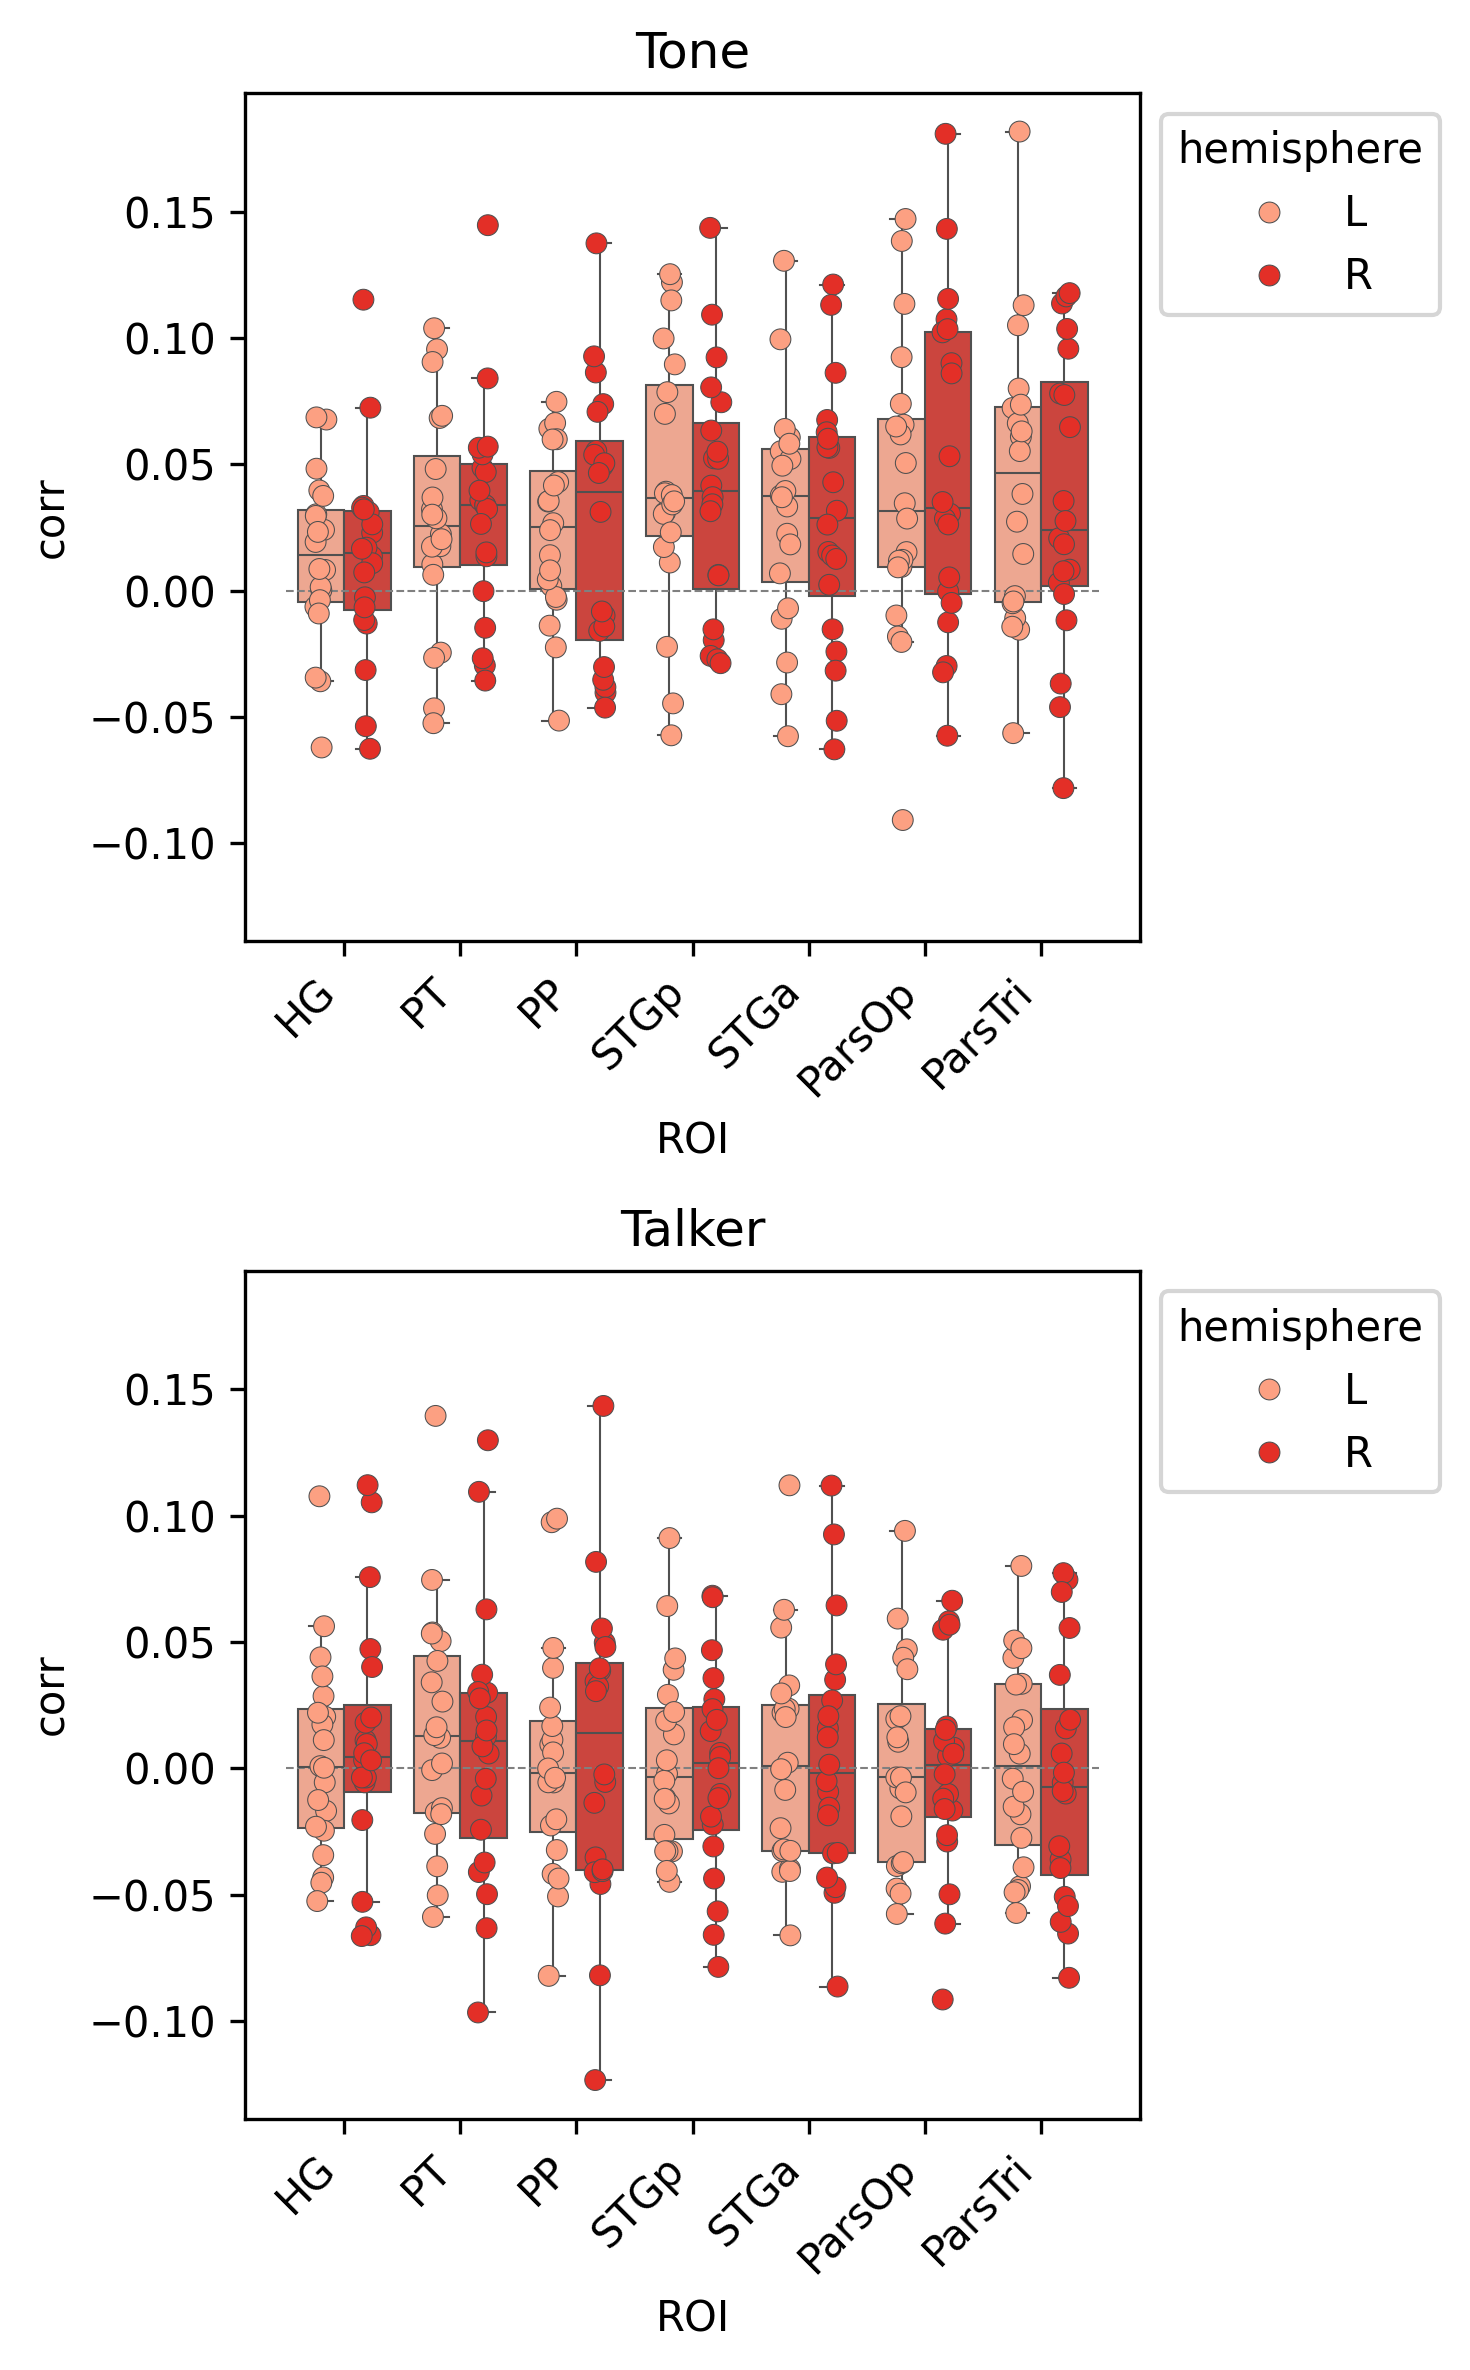

In [56]:
fig, ax = plt.subplots(2,1, figsize=(5,8), dpi=300, sharex=False, sharey=True)
#ax = ax.flatten()


for mx, model_id in enumerate(model_names):
    group_df = laterality_df.where(laterality_df.participant_group==group_id).where(laterality_df.model==model_id)

    sns.boxplot(data=group_df, 
                x='ROI', y='corr', hue='hemisphere', 
                palette='Reds', linewidth=0.5, 
                ax=ax[mx], 
                fliersize = 0,
                legend=None,
                #boxprops=dict(alpha=.3),
                #order=roi_list_ordered
                )
    sns.stripplot(data=group_df, 
                  x='ROI', y='corr', hue='hemisphere', 
                  palette='Reds', dodge=True, 
                  linewidth=0.25, 
                  size=5,
                  ax=ax[mx], 
                  #order=roi_list_ordered,
                 )
    xmin, xmax = ax[mx].get_xlim()
    ax[mx].hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='--', linewidth=0.5)
    sns.move_legend(ax[mx], "upper left", bbox_to_anchor=(1, 1))
    ax[mx].set_xticklabels(ax[mx].get_xticklabels(), rotation=45, ha='right');
    ax[mx].set_title(f'{model_id}');
    #ax[mx].legend([],[], frameon=False)
    #plt.setp(ax[mx].get_xticklabels(), visible=False)
fig.tight_layout()


/scratch/slurm-3440091/ipykernel_50316/913278971.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[mx].set_xticklabels(ax[mx].get_xticklabels(), rotation=45, ha='right');
/scratch/slurm-3440091/ipykernel_50316/913278971.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[mx].set_xticklabels(ax[mx].get_xticklabels(), rotation=45, ha='right');


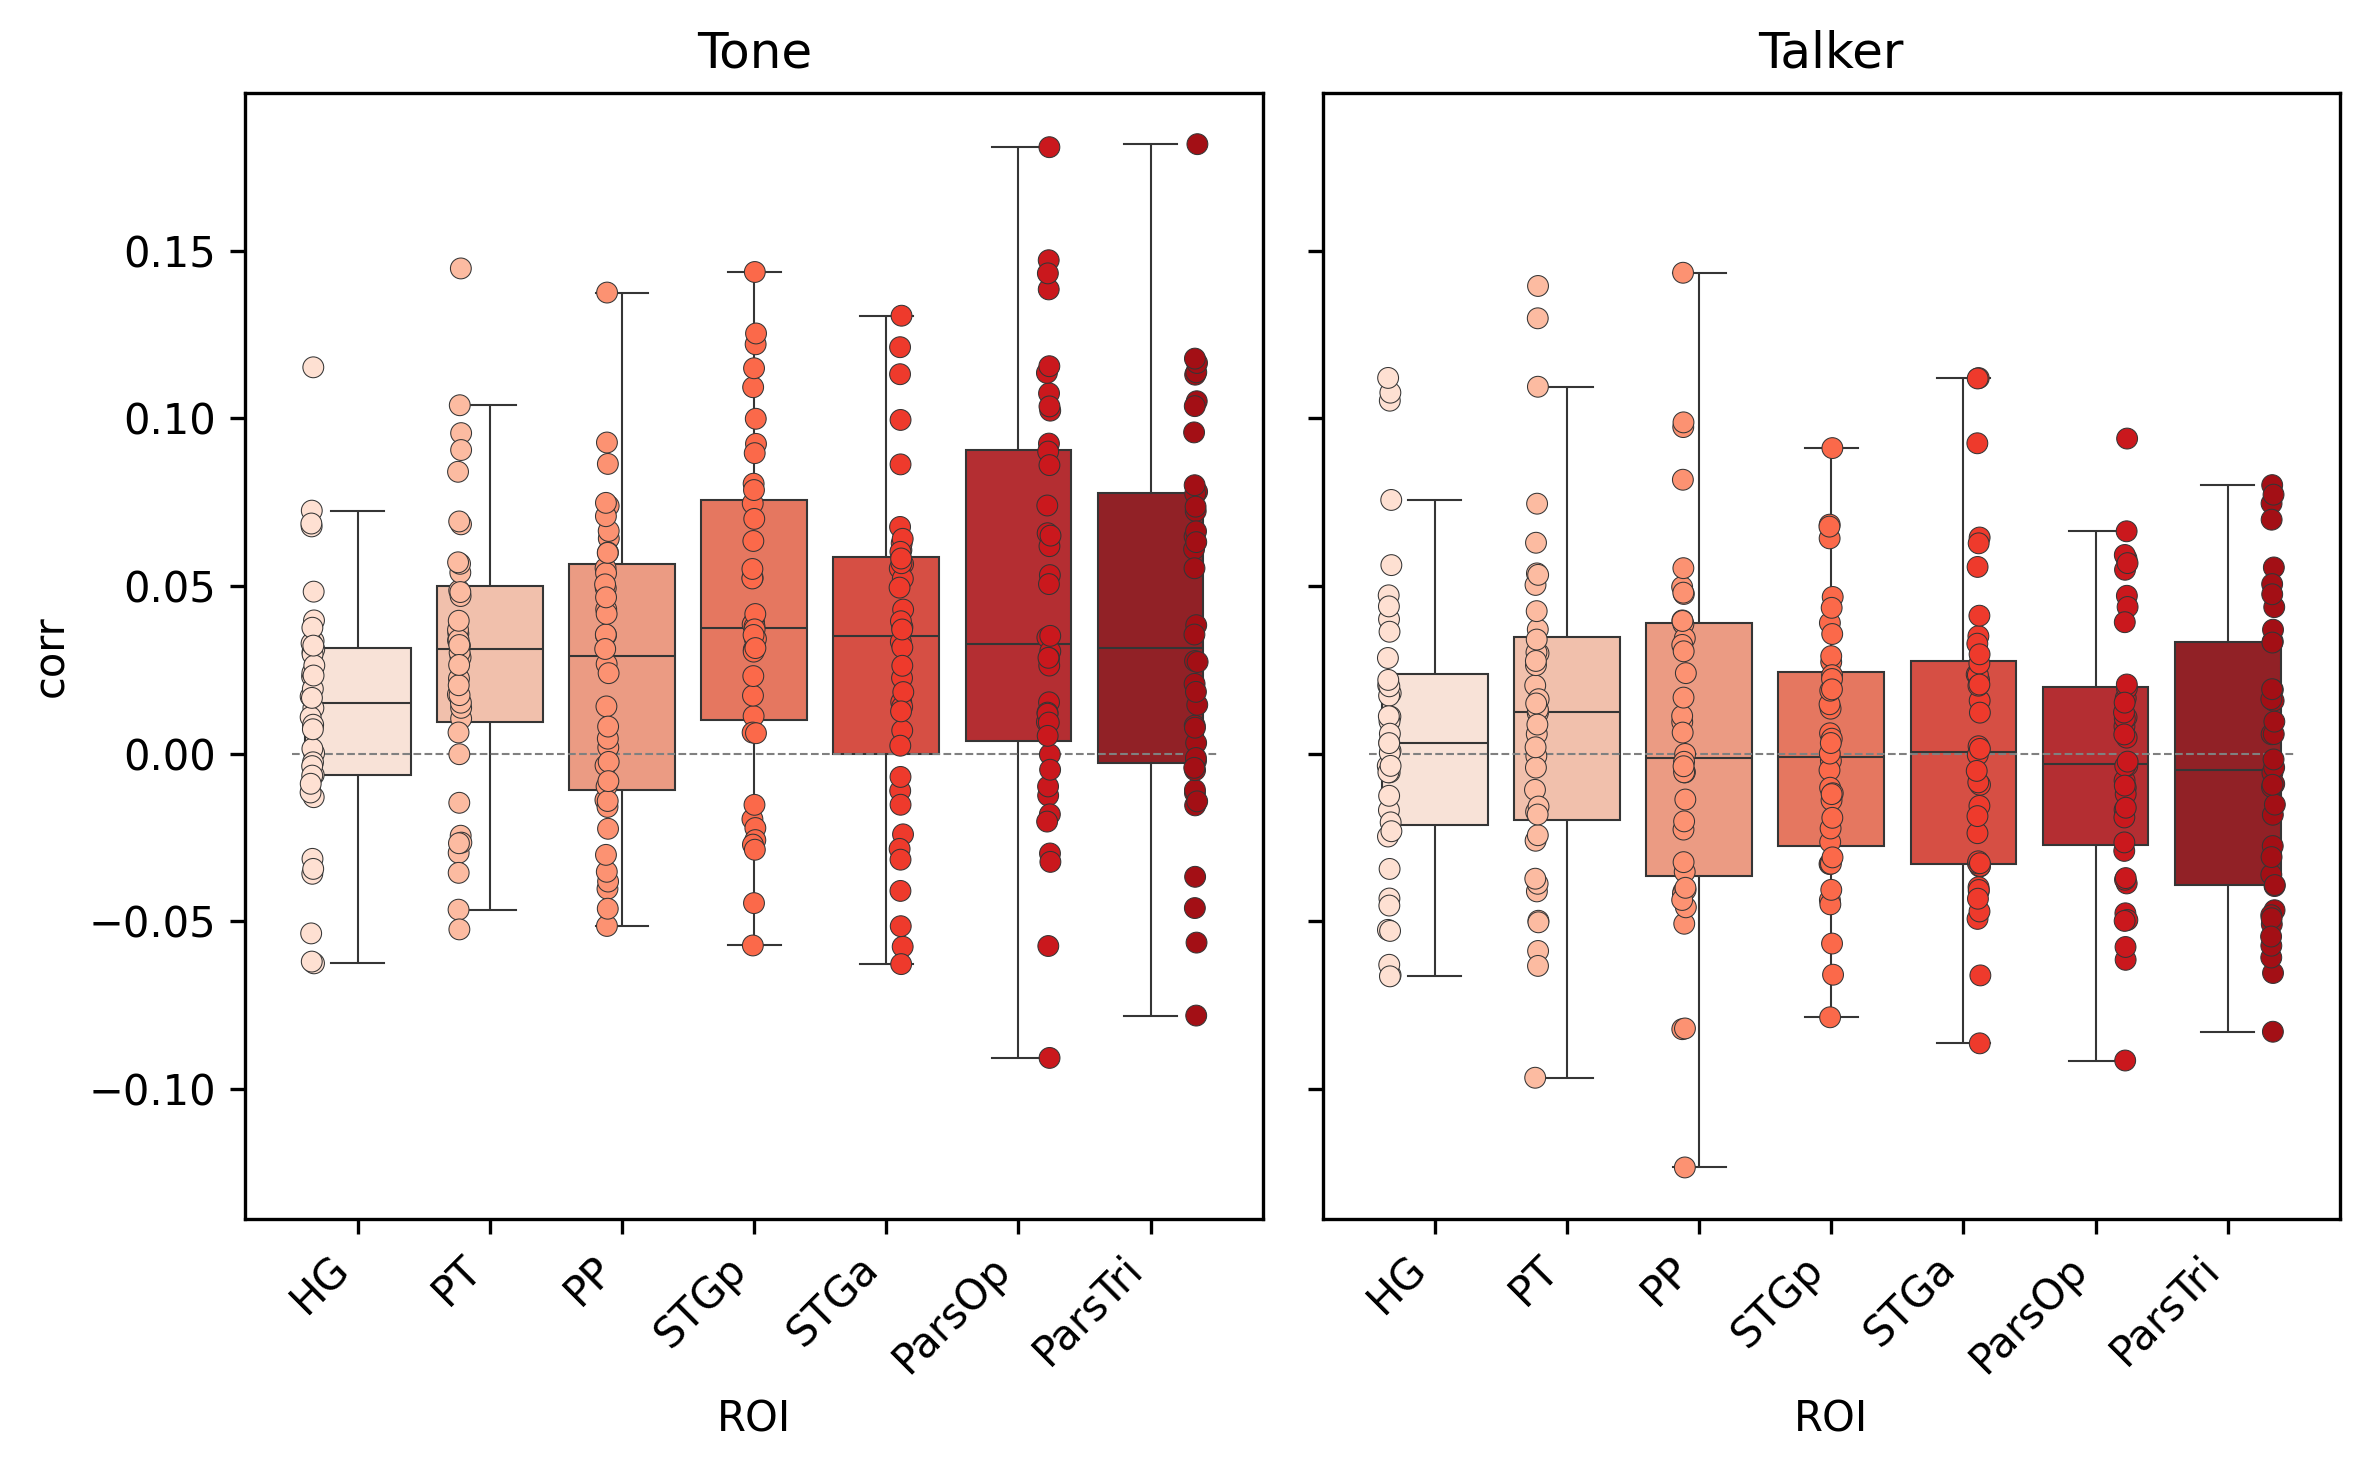

In [57]:
fig, ax = plt.subplots(1,2, figsize=(8,5), dpi=300, sharex=False, sharey=True)
#ax = ax.flatten()


for mx, model_id in enumerate(model_names):
    group_df = laterality_df.where(laterality_df.participant_group==group_id).where(laterality_df.model==model_id)

    sns.boxplot(data=group_df, 
                x='ROI', y='corr', hue='ROI', 
                palette='Reds', linewidth=0.5, 
                ax=ax[mx], 
                fliersize = 0,
                legend=None,
                #boxprops=dict(alpha=.3),
                #order=roi_list_ordered
                )
    sns.stripplot(data=group_df, 
                  x='ROI', y='corr', hue='ROI', 
                  legend=None,
                  palette='Reds', dodge=True, 
                  linewidth=0.25, 
                  size=5,
                  ax=ax[mx], 
                  #order=roi_list_ordered,
                 )
    xmin, xmax = ax[mx].get_xlim()
    ax[mx].hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='--', linewidth=0.5)
    #sns.move_legend(ax[mx], "upper left", bbox_to_anchor=(1, 1))
    ax[mx].set_xticklabels(ax[mx].get_xticklabels(), rotation=45, ha='right');
    ax[mx].set_title(f'{model_id}');
    #ax[mx].legend([],[], frameon=False)
    #plt.setp(ax[mx].get_xticklabels(), visible=False)
fig.tight_layout()


/scratch/slurm-3440091/ipykernel_50316/4192290873.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


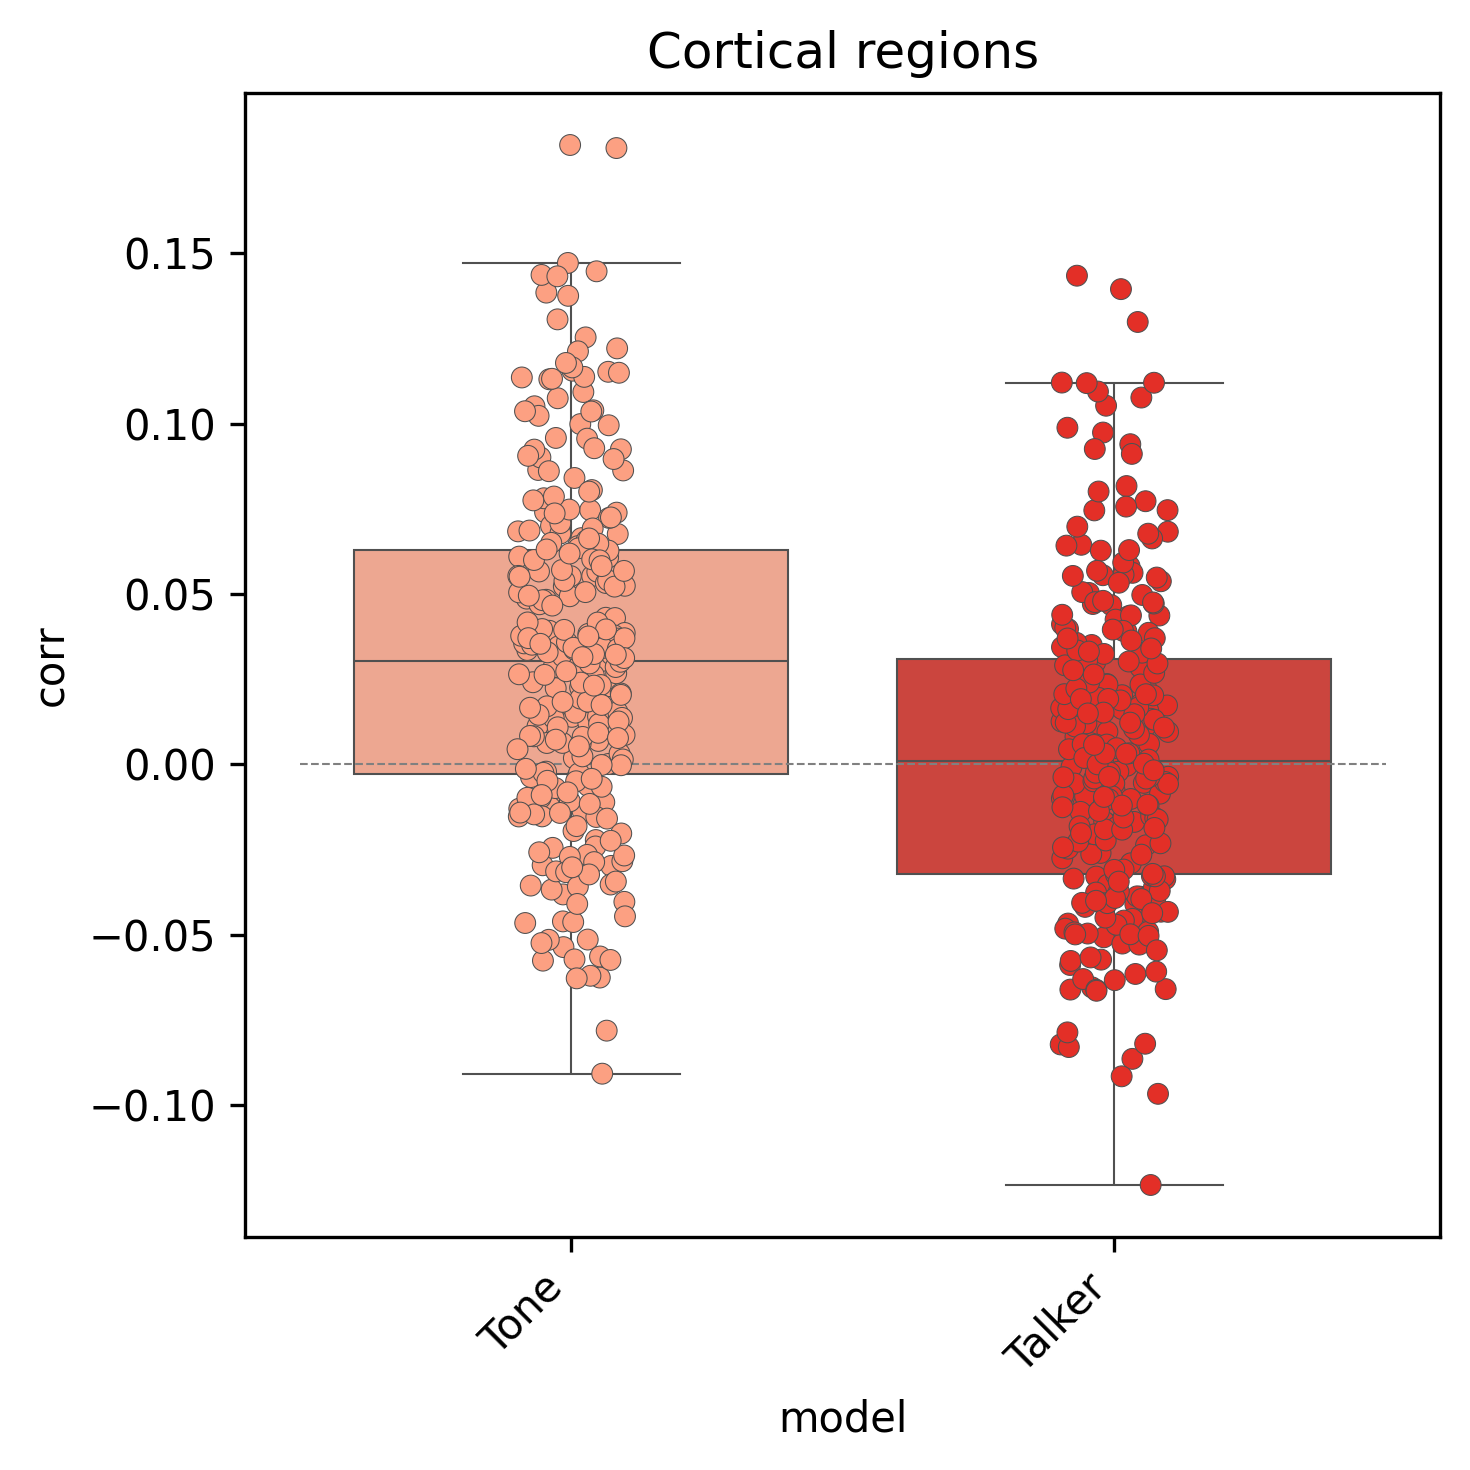

In [59]:
fig, ax = plt.subplots(1,1, figsize=(5,5), dpi=300, sharex=False, sharey=True)

group_df = laterality_df.where(laterality_df.participant_group==group_id)

sns.boxplot(data=group_df, 
            x='model', y='corr', hue='model', 
            palette='Reds', linewidth=0.5, 
            ax=ax, 
            fliersize = 0,
            legend=None,
            #boxprops=dict(alpha=.3),
            #order=roi_list_ordered
            )
sns.stripplot(data=group_df, 
              x='model', y='corr', hue='model', 
              palette='Reds', 
              #dodge=True, 
              linewidth=0.25, 
              legend=None,
              size=5,
              ax=ax, 
              #order=roi_list_ordered,
             )
xmin, xmax = ax.get_xlim()
ax.hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='--', linewidth=0.5)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title(f'Cortical regions');
#ax[mx].legend([],[], frameon=False)
#plt.setp(ax[mx].get_xticklabels(), visible=False)
fig.tight_layout()


In [ ]:
'''
fig, ax = plt.subplots(3,1, figsize=(6,8), dpi=300, sharey=True) # sharex=True, 
#ax = ax.flatten()

#for model_id in model_names:
for mx, model_id in enumerate(model_names):
    model_df = model_long_df.where(model_long_df.model==model_id)

    sns.boxplot(data=model_df, 
                x='ROI', y='corr', hue='participant_group', 
                palette='Reds', linewidth=0.5, 
                fliersize = 0,
                ax=ax[mx], 
                order=roi_list_ordered)
    sns.stripplot(data=model_df, 
                  x='ROI', y='corr', hue='participant_group', 
                  palette='Reds', dodge=True, 
                  linewidth=0.25, 
                  size=1,
                  ax=ax[mx], 
                  order=roi_list_ordered)
    handles, labels = ax[mx].get_legend_handles_labels()  # Get legend handles and labels
    
    xmin, xmax = ax[mx].get_xlim()
    ax[mx].hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='--', linewidth=0.5)
    ax[mx].set_xticklabels(ax[mx].get_xticklabels(), rotation=40, ha='right');
    ax[mx].set_title(f'{model_id} by group – all runs');
    ax[mx].legend([],[], frameon=False)
    
    # Add legend with only strip plot handles and labels 
    # (since the two overlapping plots have redundant legends)
    ax[mx].legend(handles[2:], labels[2:], 
                  title='Participant group',
                  loc='upper left', bbox_to_anchor=(1, 1))
    
    #sns.move_legend(ax[mx], "upper left", bbox_to_anchor=(1, 1))
    #plt.setp(ax[mx].get_xticklabels(), visible=False)
fig.tight_layout()
'''

In [ ]:
'''
fig, ax = plt.subplots(3,2, figsize=(8,10), dpi=300, sharex=True, sharey=True)
#ax = ax.flatten()

#for model_id in model_names:
for gx, group_id in enumerate(np.unique(group_rdms.rdm_descriptors['group'])):
    for mx, model_id in enumerate(model_names):
        group_df = model_long_df.where(model_long_df.participant_group==group_id).where(model_long_df.model==model_id)

        sns.boxplot(data=group_df, 
                    x='ROI', y='corr', hue='stage', 
                    palette='Reds', linewidth=0.5, 
                    ax=ax[mx,gx], 
                    order=roi_list_ordered)
        sns.stripplot(data=group_df, 
                      x='ROI', y='corr', hue='stage', 
                      palette='Reds', dodge=True, 
                      linewidth=0.25, 
                      size=1,
                      ax=ax[mx,gx], 
                      order=roi_list_ordered)
        xmin, xmax = ax[mx,gx].get_xlim()
        ax[mx,gx].hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='--', linewidth=0.5)
        sns.move_legend(ax[mx,gx], "upper left", bbox_to_anchor=(1, 1))
        ax[mx,gx].set_xticklabels(ax[mx,gx].get_xticklabels(), rotation=45, ha='right');
        ax[mx,gx].set_title(f'{group_id} speakers\n{model_id}');
        ax[mx,gx].legend([],[], frameon=False)
        #plt.setp(ax[mx].get_xticklabels(), visible=False)
    fig.tight_layout()
'''

#### By group, by run

/scratch/slurm-4614381/ipykernel_171167/3642082356.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


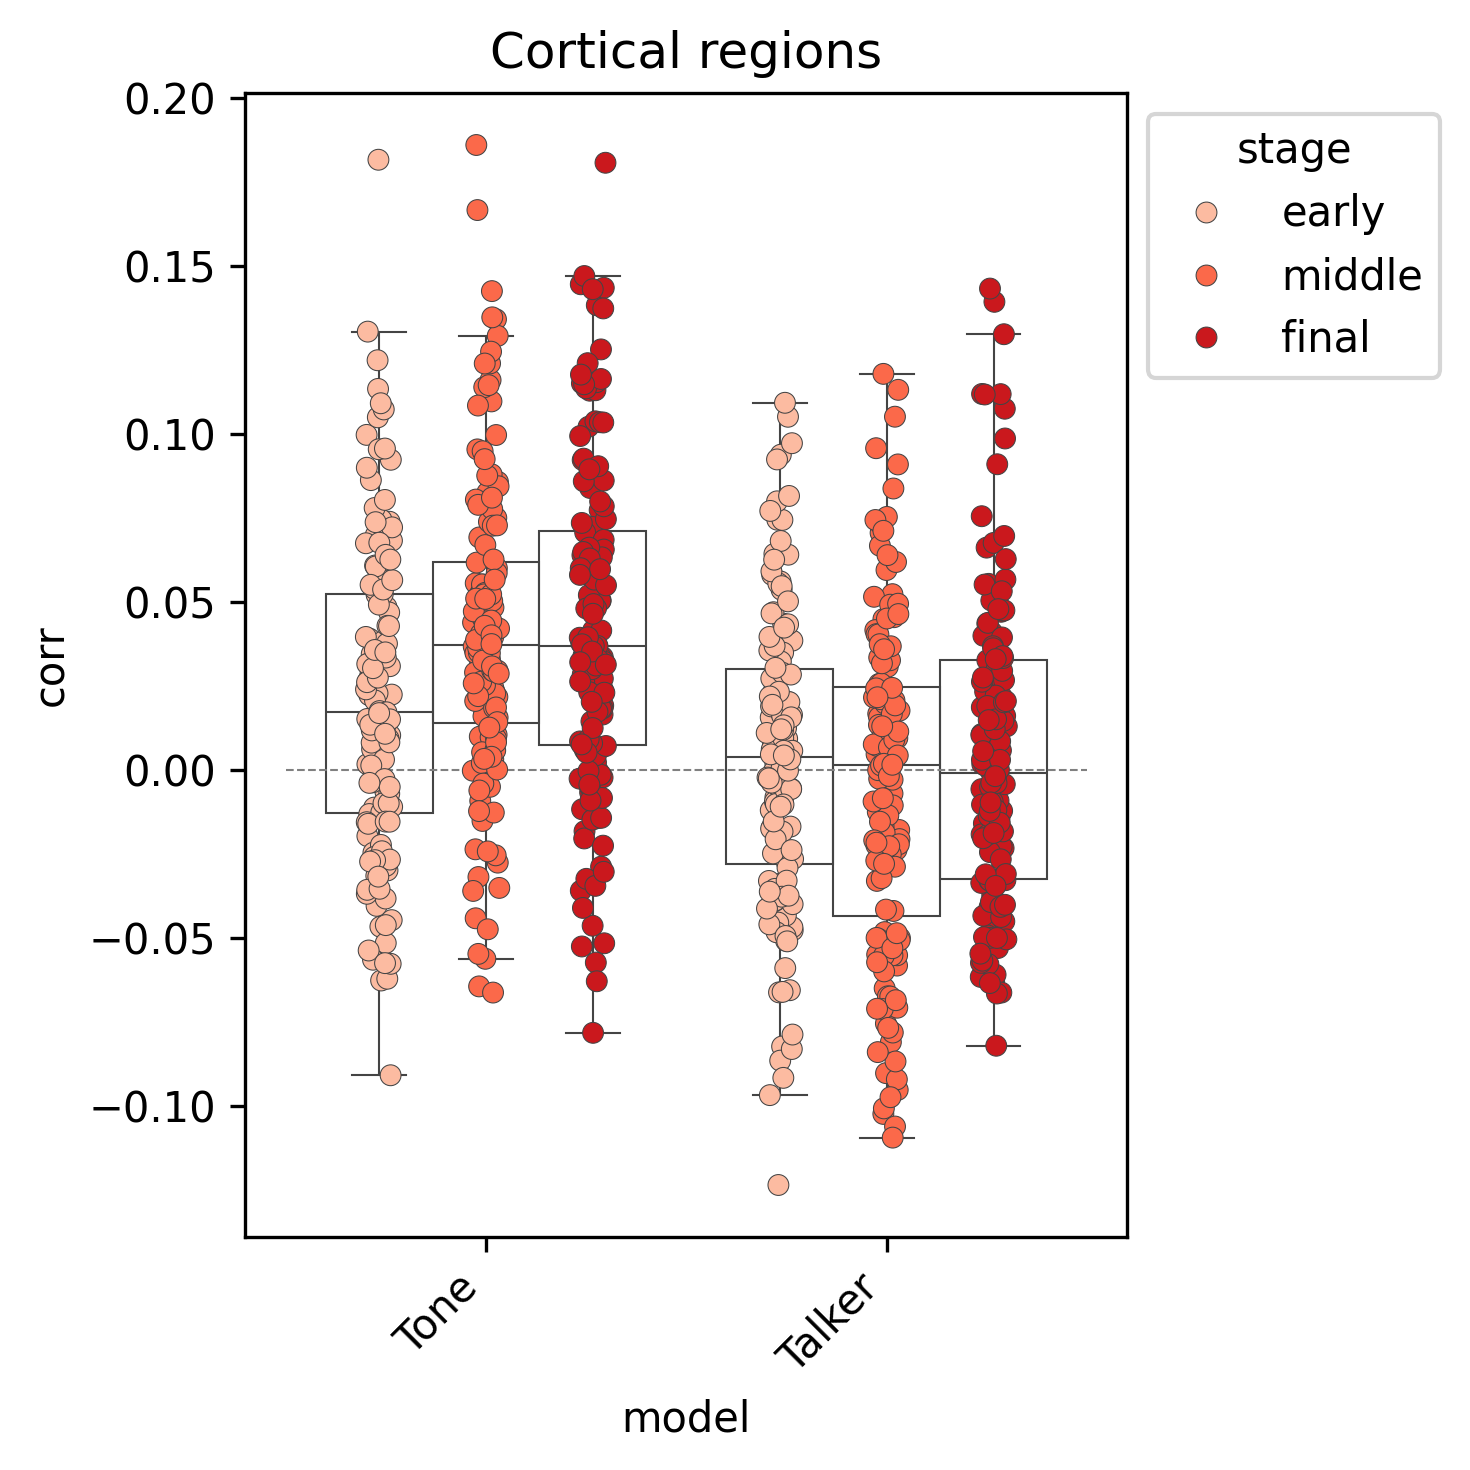

In [82]:
fig, ax = plt.subplots(1,1, figsize=(5,5), dpi=300, sharex=False, sharey=True)

group_df = laterality_df.where(laterality_df.participant_group==group_id)

sns.boxplot(data=group_df, 
            x='model', y='corr', hue='stage', 
            palette='Reds', linewidth=0.5, 
            ax=ax, 
            fliersize = 0,
            legend=None, 
            #boxprops=dict(alpha=.3),
            #order=roi_list_ordered
            )
sns.stripplot(data=group_df, 
              x='model', y='corr', hue='stage', 
              palette='Reds', dodge=True, 
              linewidth=0.25, 
              size=5,
              ax=ax, 
              #order=roi_list_ordered,
             )
xmin, xmax = ax.get_xlim()
ax.hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='--', linewidth=0.5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title(f'Cortical regions');

# Modify the boxplot to make the boxes white (or transparent)
for patch in ax.patches:
    patch.set_facecolor('none')  # or 'none' for transparent boxes

#ax.legend([],[], frameon=False)
#plt.setp(ax[mx].get_xticklabels(), visible=False)
fig.tight_layout()


/scratch/slurm-3283761/ipykernel_13953/2248329281.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[mx].set_xticklabels(ax[mx].get_xticklabels(), rotation=45, ha='right');
/scratch/slurm-3283761/ipykernel_13953/2248329281.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[mx].set_xticklabels(ax[mx].get_xticklabels(), rotation=45, ha='right');


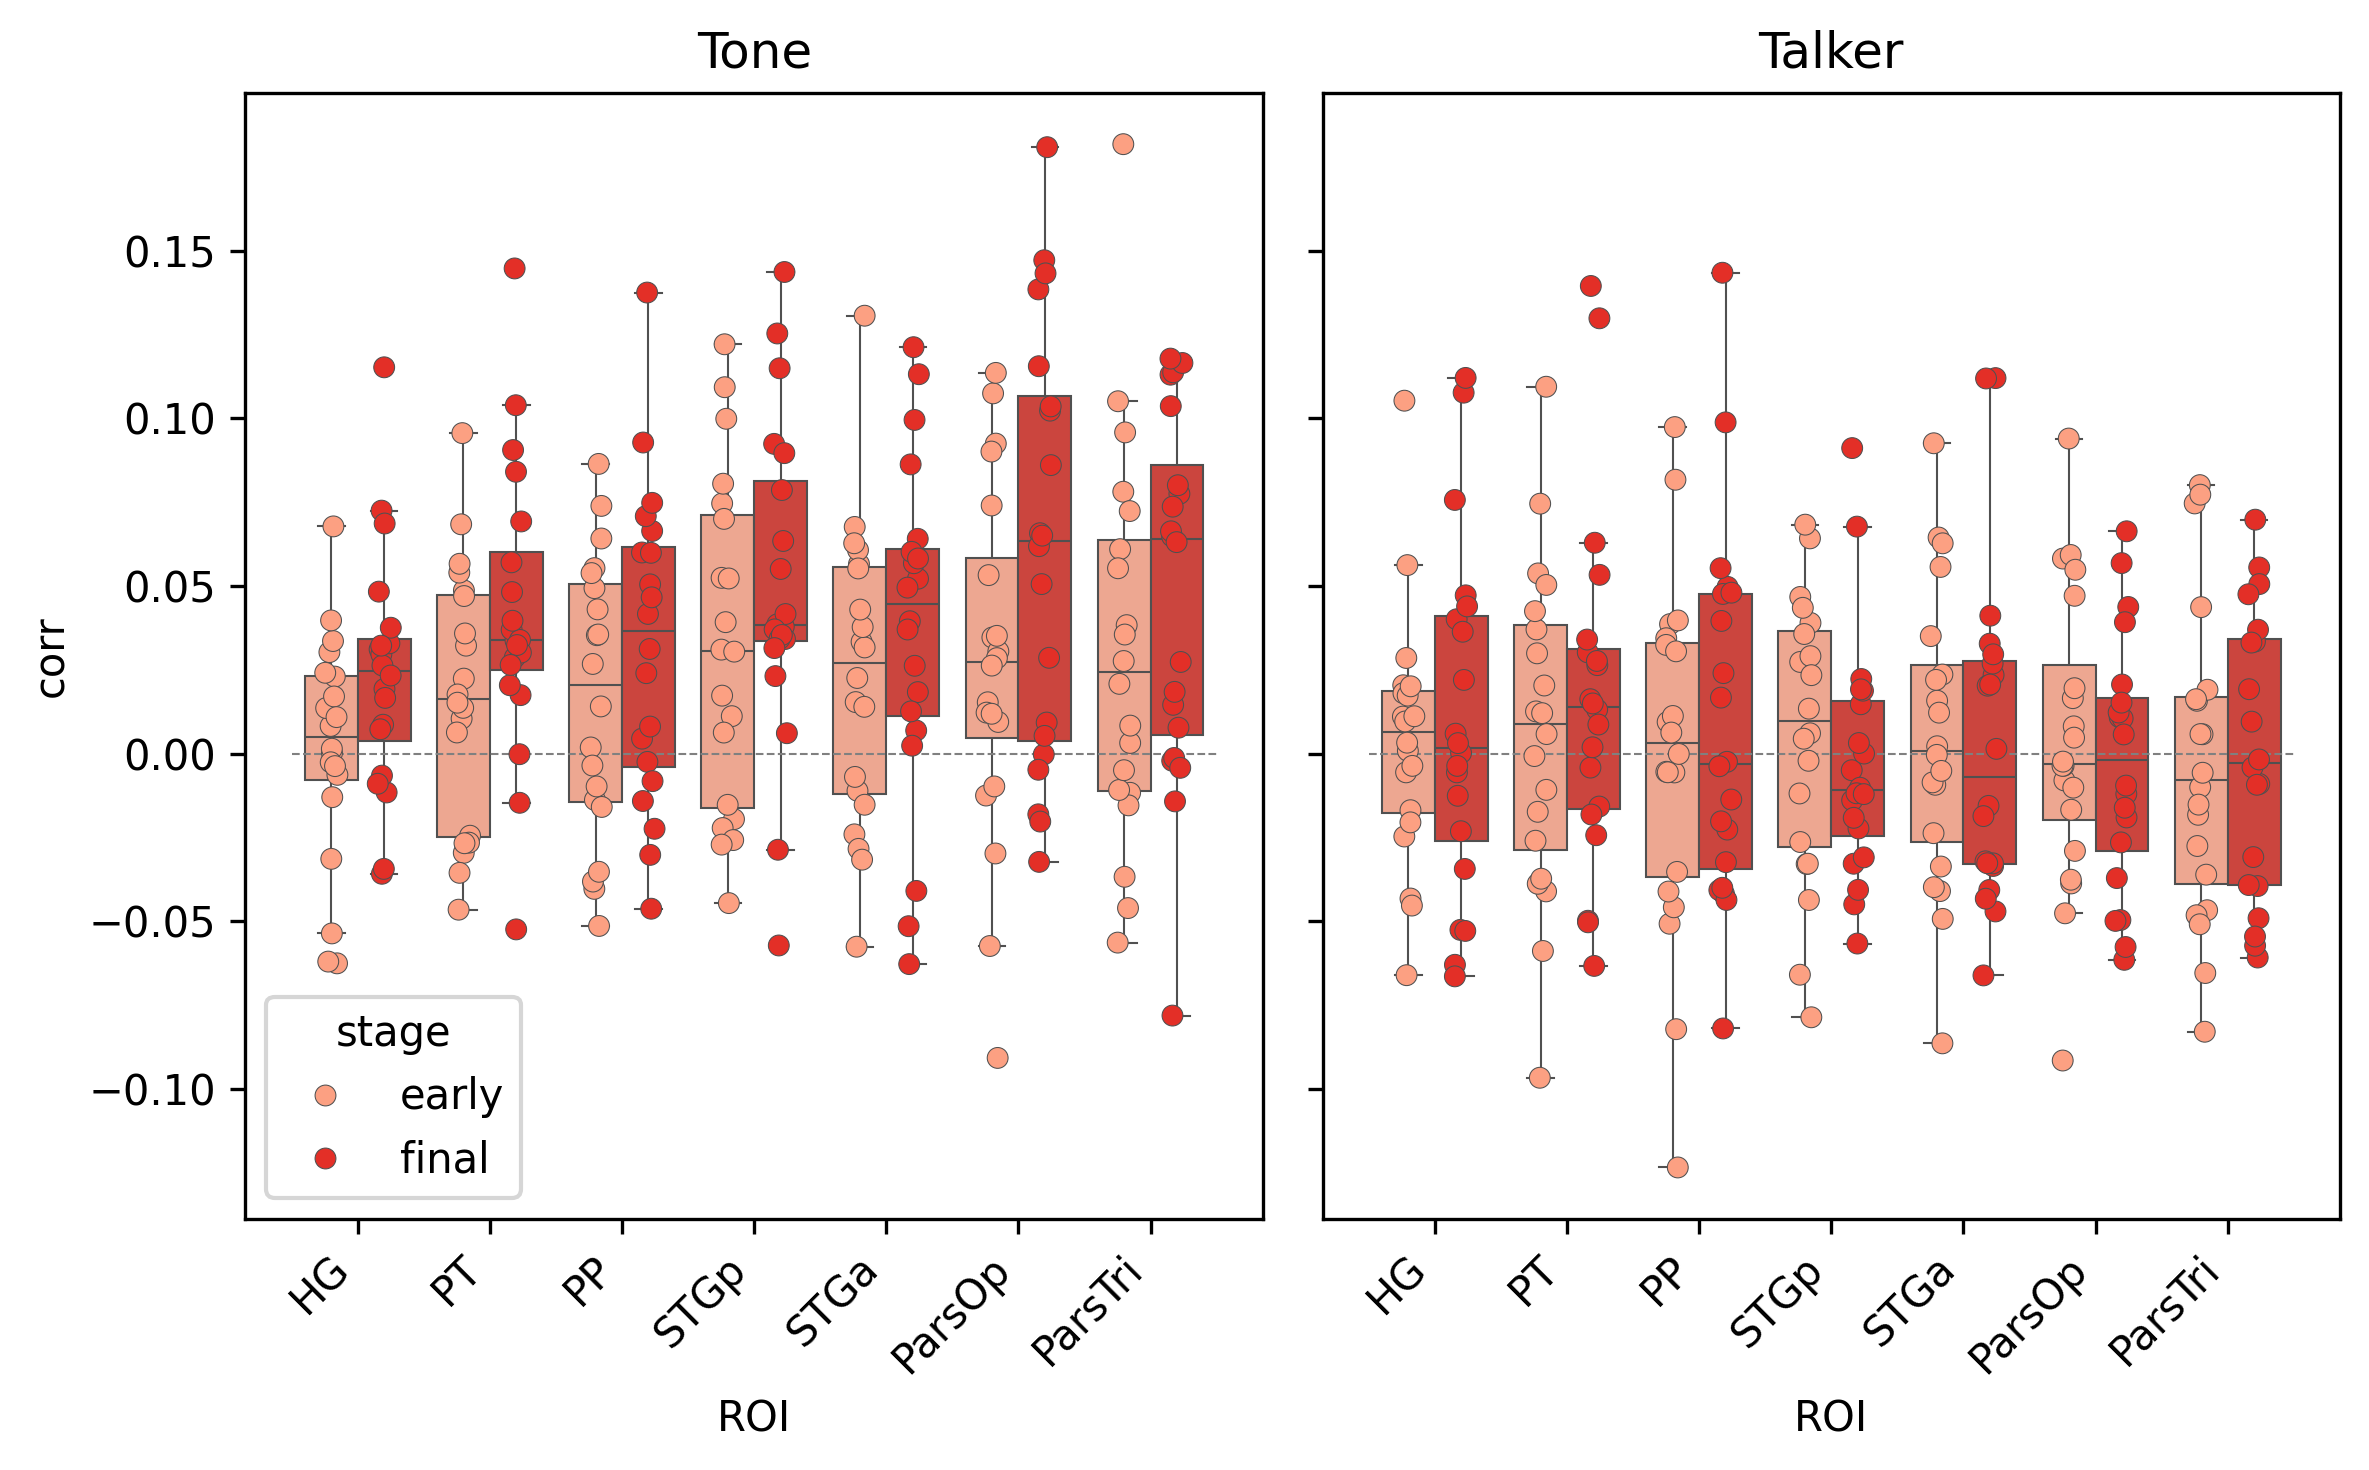

In [100]:
fig, ax = plt.subplots(1,2, figsize=(8,5), dpi=300, sharex=False, sharey=True)
#ax = ax.flatten()


for mx, model_id in enumerate(model_names):
    group_df = laterality_df.where(laterality_df.participant_group==group_id).where(laterality_df.model==model_id)

    sns.boxplot(data=group_df, 
                x='ROI', y='corr', hue='stage', 
                palette='Reds', 
                linewidth=0.5, 
                ax=ax[mx], 
                fliersize = 0,
                legend=None,
                #boxprops=dict(alpha=.3),
                #order=roi_list_ordered
                )
    sns.stripplot(data=group_df, 
                  x='ROI', y='corr', hue='stage', 
                  palette='Reds', dodge=True, 
                  linewidth=0.25, 
                  size=5,
                  ax=ax[mx], 
                  #order=roi_list_ordered,
                 )
    xmin, xmax = ax[mx].get_xlim()
    ax[mx].hlines(y=0, xmin=xmin, xmax=xmax, color='0.5', linestyle='--', linewidth=0.5)
    #sns.move_legend(ax[mx], "upper left", bbox_to_anchor=(1, 1))
    ax[mx].set_xticklabels(ax[mx].get_xticklabels(), rotation=45, ha='right');
    ax[mx].set_title(f'{model_id}');
    if mx > 0:
        ax[mx].legend([],[], frameon=False)
    #plt.setp(ax[mx].get_xticklabels(), visible=False)
fig.tight_layout()
